In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import os
from stanza.pipeline.external import spacy
from transformers import AutoTokenizer, AutoModel
import torch
import metrics
from analysis import open_questions_full_analysis, TAT_questions_full_analysis
import data_loading
import text_processing_utils
from data_loading import load_all_transcriptions
from text_processing_utils import extract_valid_answers, extract_content_words, clean_text, extract_content_words_without_PROPN

In [4]:
data_base_dir = r"C:\Users\elira\ShmilaJustSolveIt Dropbox\Eliran Shmila\PC\Documents\NLP\Final Project\data_from_beer_yaacov_2nd"
control_dir = os.path.join(data_base_dir, 'control', 'male')
patients_dir = os.path.join(data_base_dir, 'patients')

# Load all files from control and patients directories

control_transcriptions = load_all_transcriptions(control_dir)
patient_transcriptions = load_all_transcriptions(patients_dir)

print(f'Loaded {len(control_transcriptions)} control transcriptions.')
print(f'Loaded {len(patient_transcriptions)} patient transcriptions.')

Loaded 25 control transcriptions.
Loaded 19 patient transcriptions.


In [5]:
# Extract valid answers
control_valid_answers = extract_valid_answers(control_transcriptions)
patient_valid_answers = extract_valid_answers(patient_transcriptions)

**Content Words - coherence is calculated by the vanilla method:**

In [44]:
# control_valid_answers_content_words = 
def get_content_words_answers(groups_list_of_answers):
    res = []
    for answers_list in groups_list_of_answers:
        if answers_list:
            res_curr_answers = []
            for (answer, idx) in answers_list:
                cleaned_answer = clean_text(answer)
                content_words_answer = extract_content_words(cleaned_answer)
                if len(content_words_answer.split()) > 50:
                    res_curr_answers.append((content_words_answer, idx))
            if res_curr_answers:
                res.append(res_curr_answers)
    return res

In [45]:
def get_content_words_answers_without_PROPN(groups_list_of_answers):
    res = []
    for answers_list in groups_list_of_answers:
        if answers_list:
            res_curr_answers = []
            for (answer, idx) in answers_list:
                cleaned_answer = clean_text(answer)
                content_words_answer = extract_content_words_without_PROPN(cleaned_answer)
                if len(content_words_answer.split()) > 50:
                    res_curr_answers.append((content_words_answer, idx))
            if res_curr_answers:
                res.append(res_curr_answers)
    return res

In [46]:
control_valid_answers_content_words = get_content_words_answers(control_valid_answers)
patient_valid_answers_content_words = get_content_words_answers(patient_valid_answers)

2024-08-07 22:24:21 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-08-07 22:24:43 INFO: Loading these models for language: he (Hebrew):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

2024-08-07 22:24:43 INFO: Using device: cuda
2024-08-07 22:24:43 INFO: Loading: tokenize
C:\Users\elira\PycharmProjects\NLP_Final_Project\venv\PycharmProjects\lib\site-packages\stanza\models\tokenization\trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See h

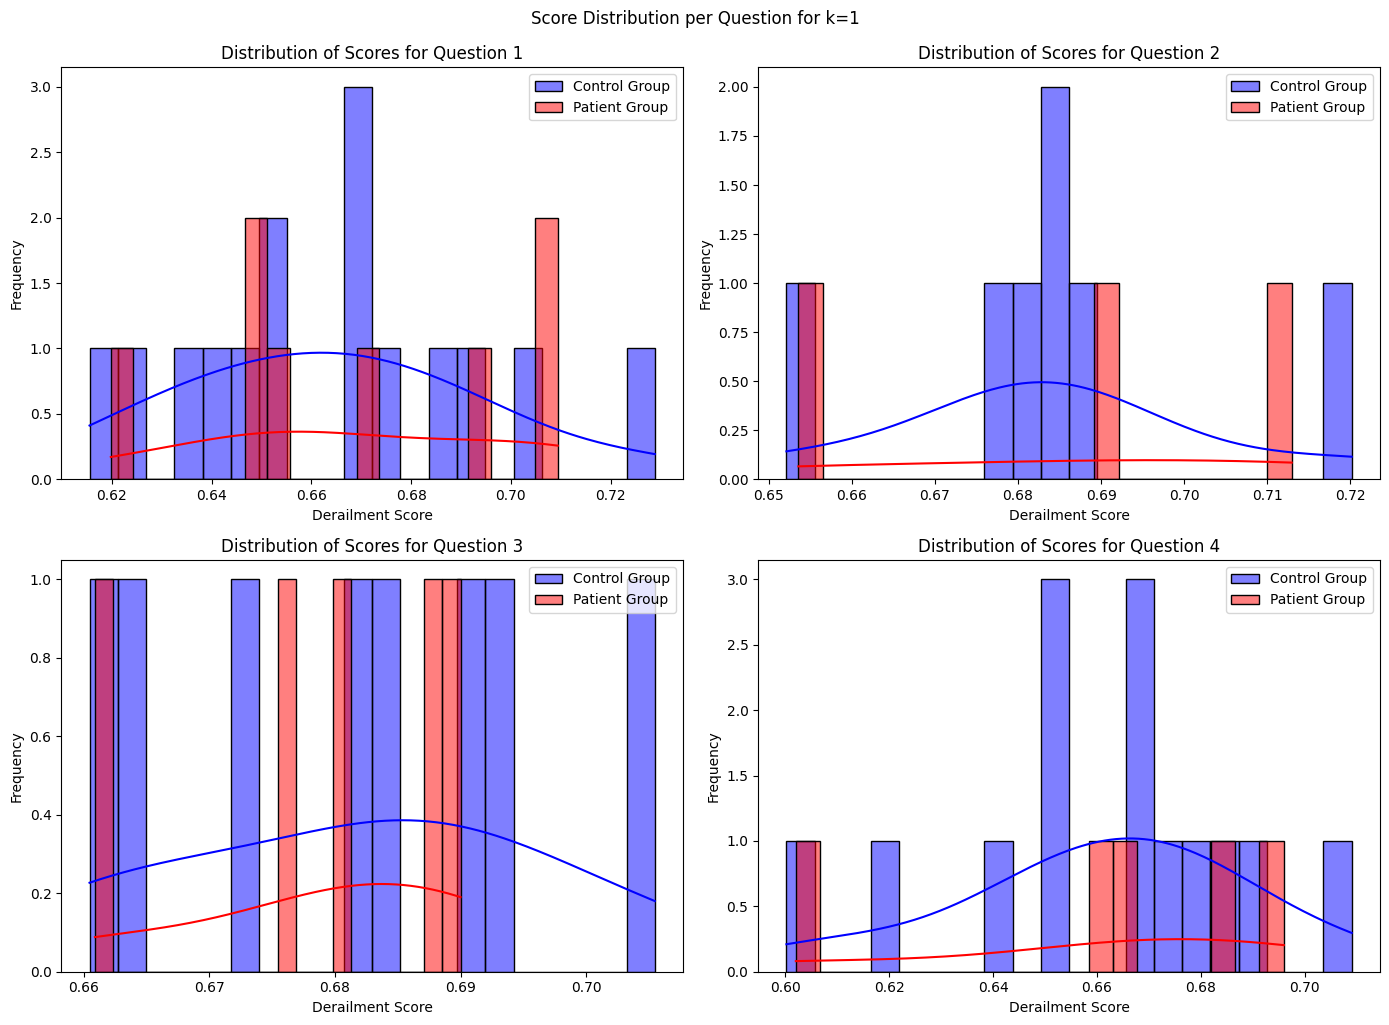

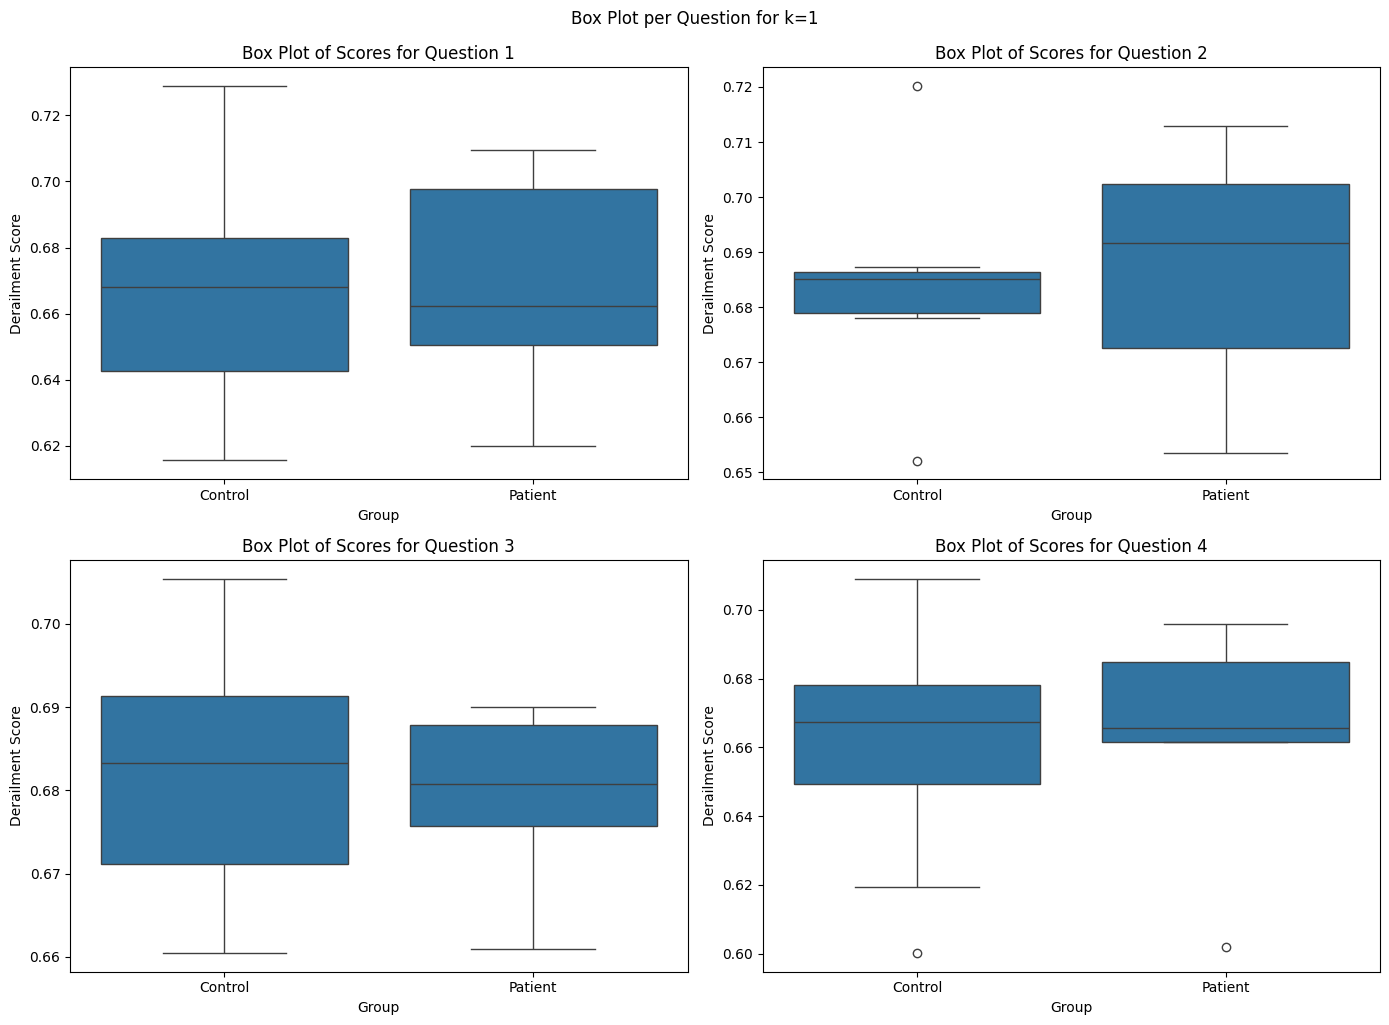

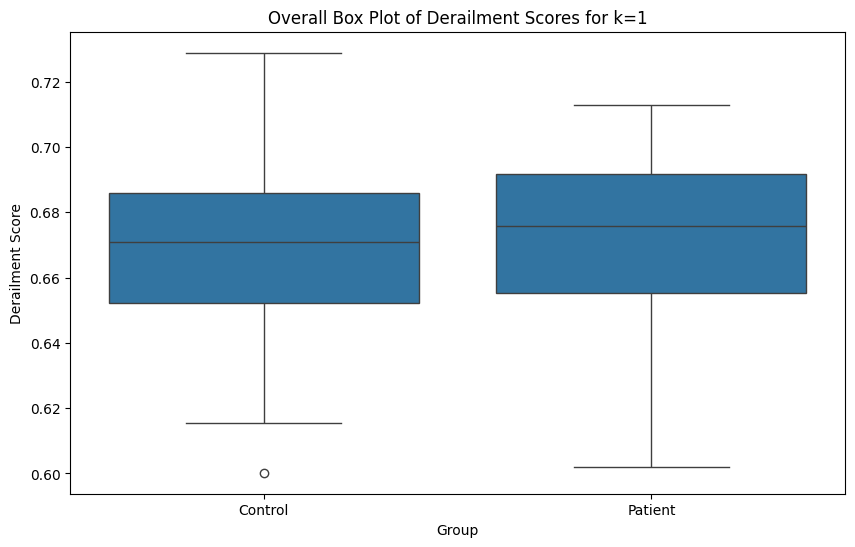

T-Test Results per Question for k=1:
Question 1: t-statistic = -0.3782703760986499, p-value = 0.6454866974750133, control mean = 0.6642917990684509, patient mean = 0.6693991422653198
Question 2: t-statistic = -0.13150697778021406, p-value = 0.5506893057477776, control mean = 0.6839971542358398, patient mean = 0.6860764622688293
Question 3: t-statistic = 0.33052159768655615, p-value = 0.37360785350075554, control mean = 0.6817143559455872, patient mean = 0.6790593862533569
Question 4: t-statistic = -0.09786004626260457, p-value = 0.5384060050889945, control mean = 0.6604822278022766, patient mean = 0.6620358228683472

Overall T-Test Results for k=1: t-statistic = -0.4035062442238391, p-value = 0.6560289304604832, control mean = 0.6693822741508484, patient mean = 0.6723284721374512

Welch's Test Results per Question for k=1:
Question 1: t-statistic = -0.37387480469820655, p-value = 0.6429398676038101
Question 2: t-statistic = -0.10980884498761212, p-value = 0.5400147984874147
Question 3:

In [51]:
full_analysis(control_valid_answers_content_words, patient_valid_answers_content_words, tokenizer, embedding_model, k=1, sliding_window=False)

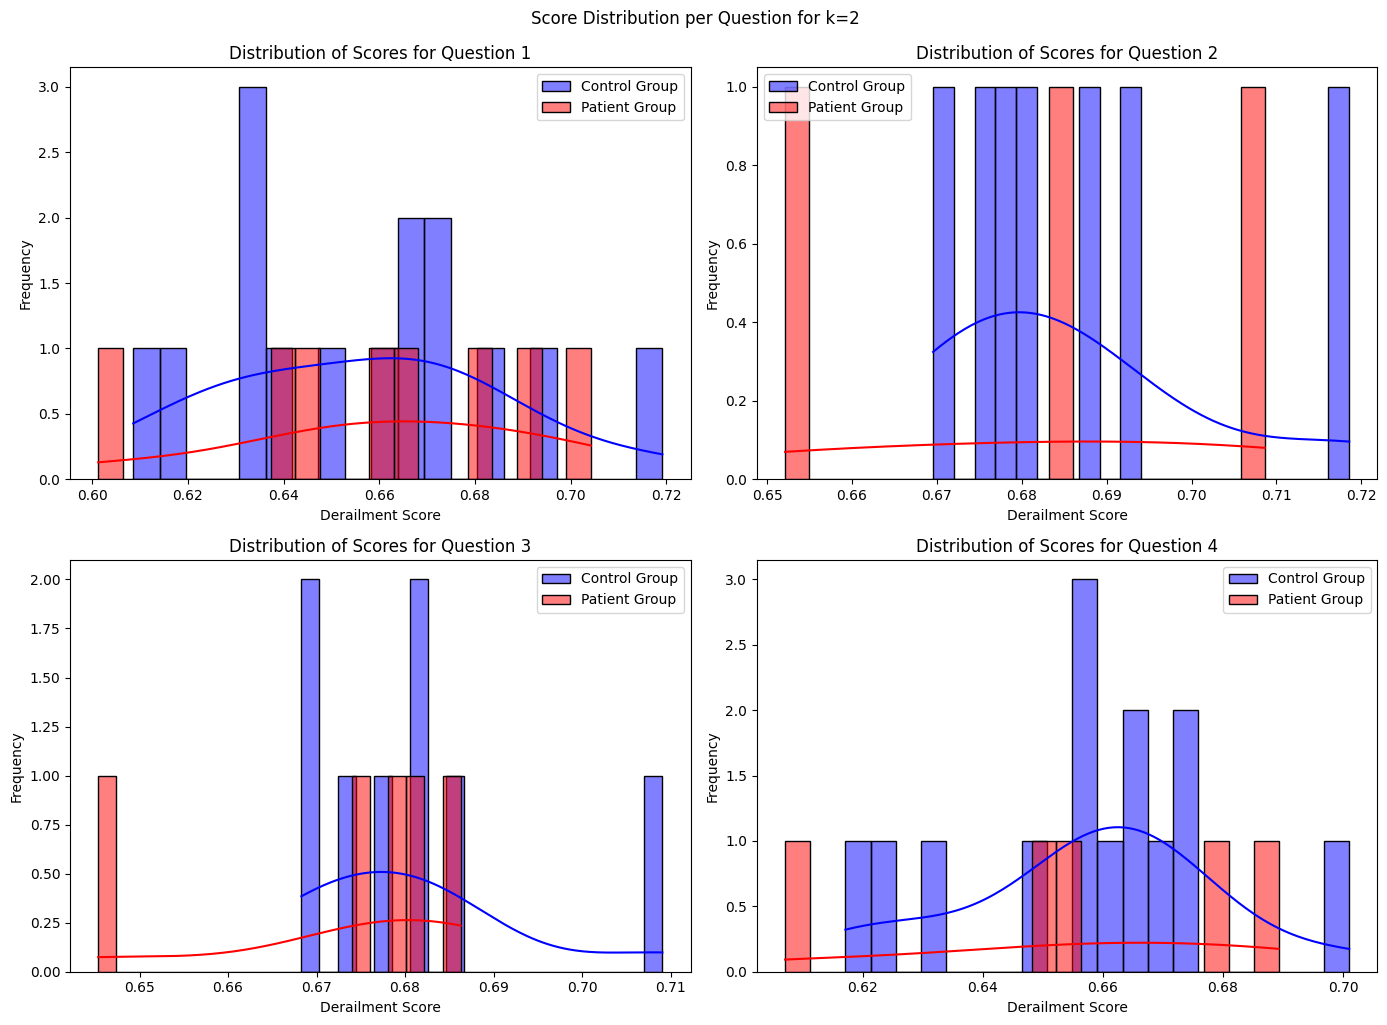

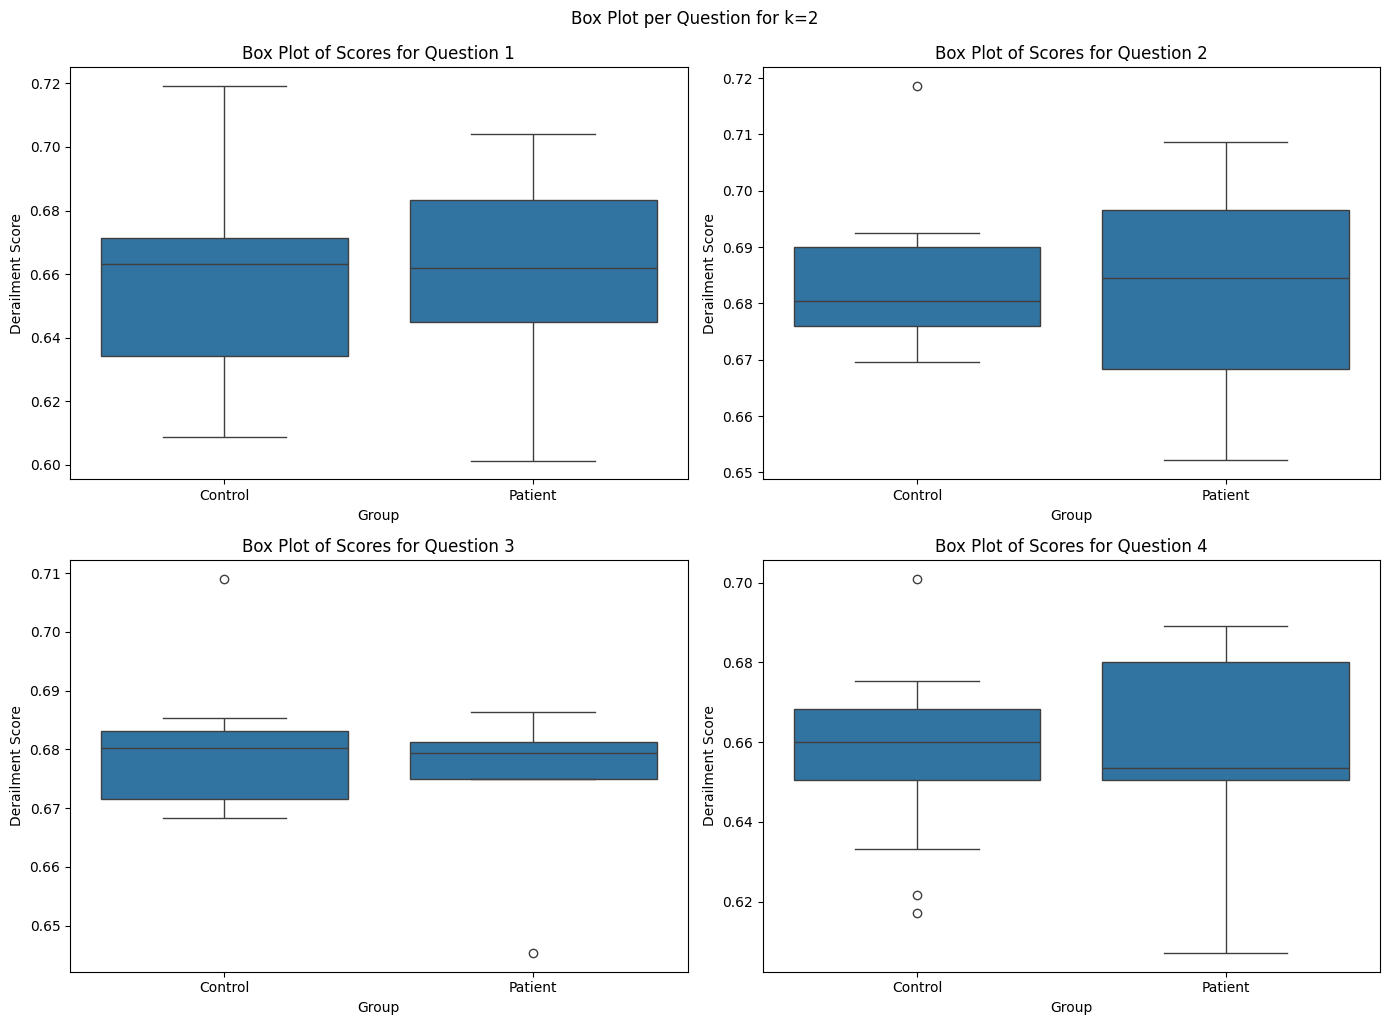

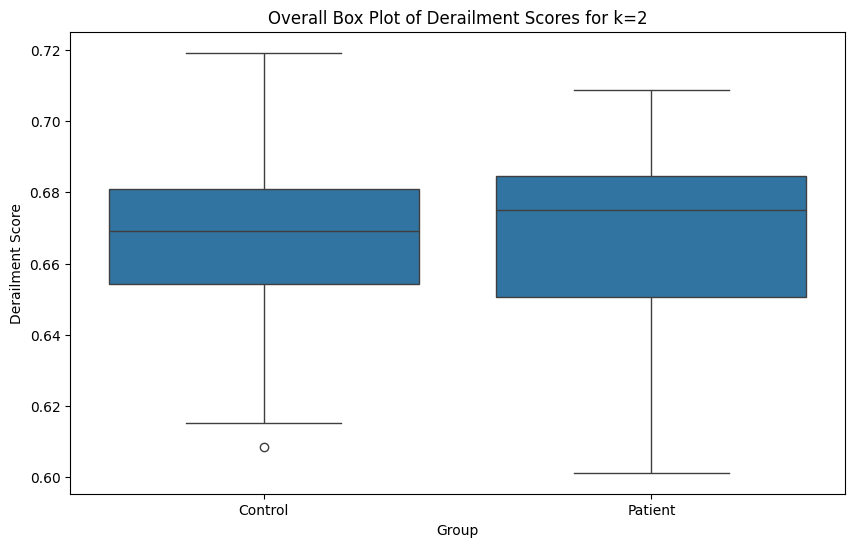

T-Test Results per Question for k=2:
Question 1: t-statistic = -0.32972312751915994, p-value = 0.6275622498159219, control mean = 0.6563875079154968, patient mean = 0.6608468294143677
Question 2: t-statistic = 0.294058636245135, p-value = 0.3880991144356073, control mean = 0.6858187317848206, patient mean = 0.6817496418952942
Question 3: t-statistic = 0.911564519959745, p-value = 0.19077040871541678, control mean = 0.6808850169181824, patient mean = 0.6734525561332703
Question 4: t-statistic = 0.08911673962275092, p-value = 0.4650153039389321, control mean = 0.6572474241256714, patient mean = 0.6560980677604675

Overall T-Test Results for k=2: t-statistic = 0.013281881809366814, p-value = 0.4947224374745043, control mean = 0.6657974720001221, patient mean = 0.6657037138938904

Welch's Test Results per Question for k=2:
Question 1: t-statistic = -0.3219715387402197, p-value = 0.6237945104376529
Question 2: t-statistic = 0.23251172782337423, p-value = 0.4166209351661693
Question 3: t-sta

In [52]:
full_analysis(control_valid_answers_content_words, patient_valid_answers_content_words, tokenizer, embedding_model, k=2, sliding_window=False)

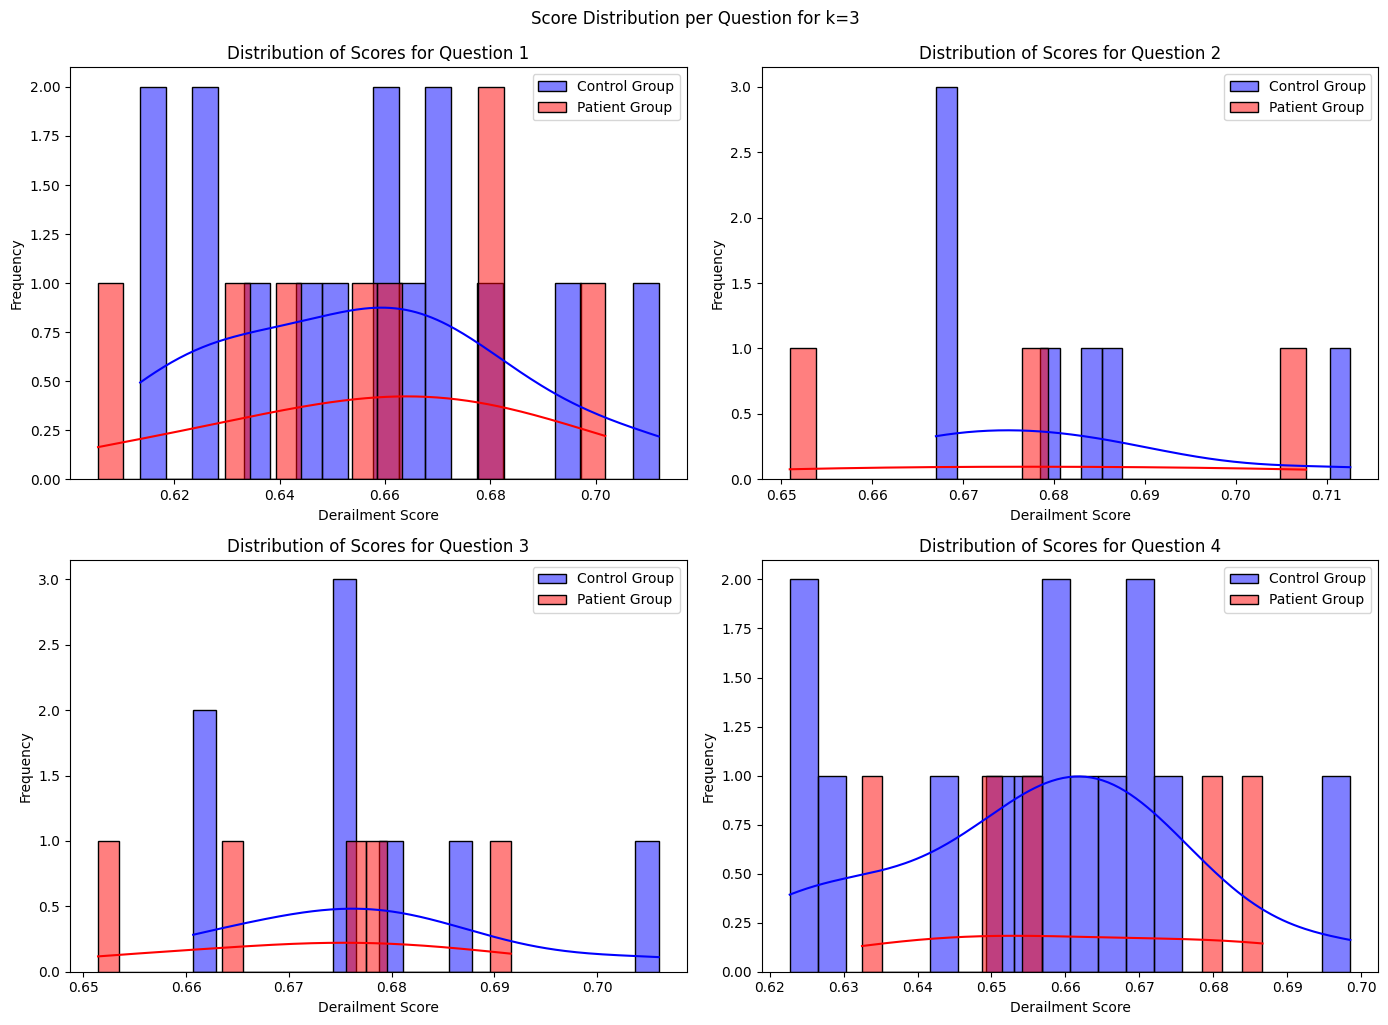

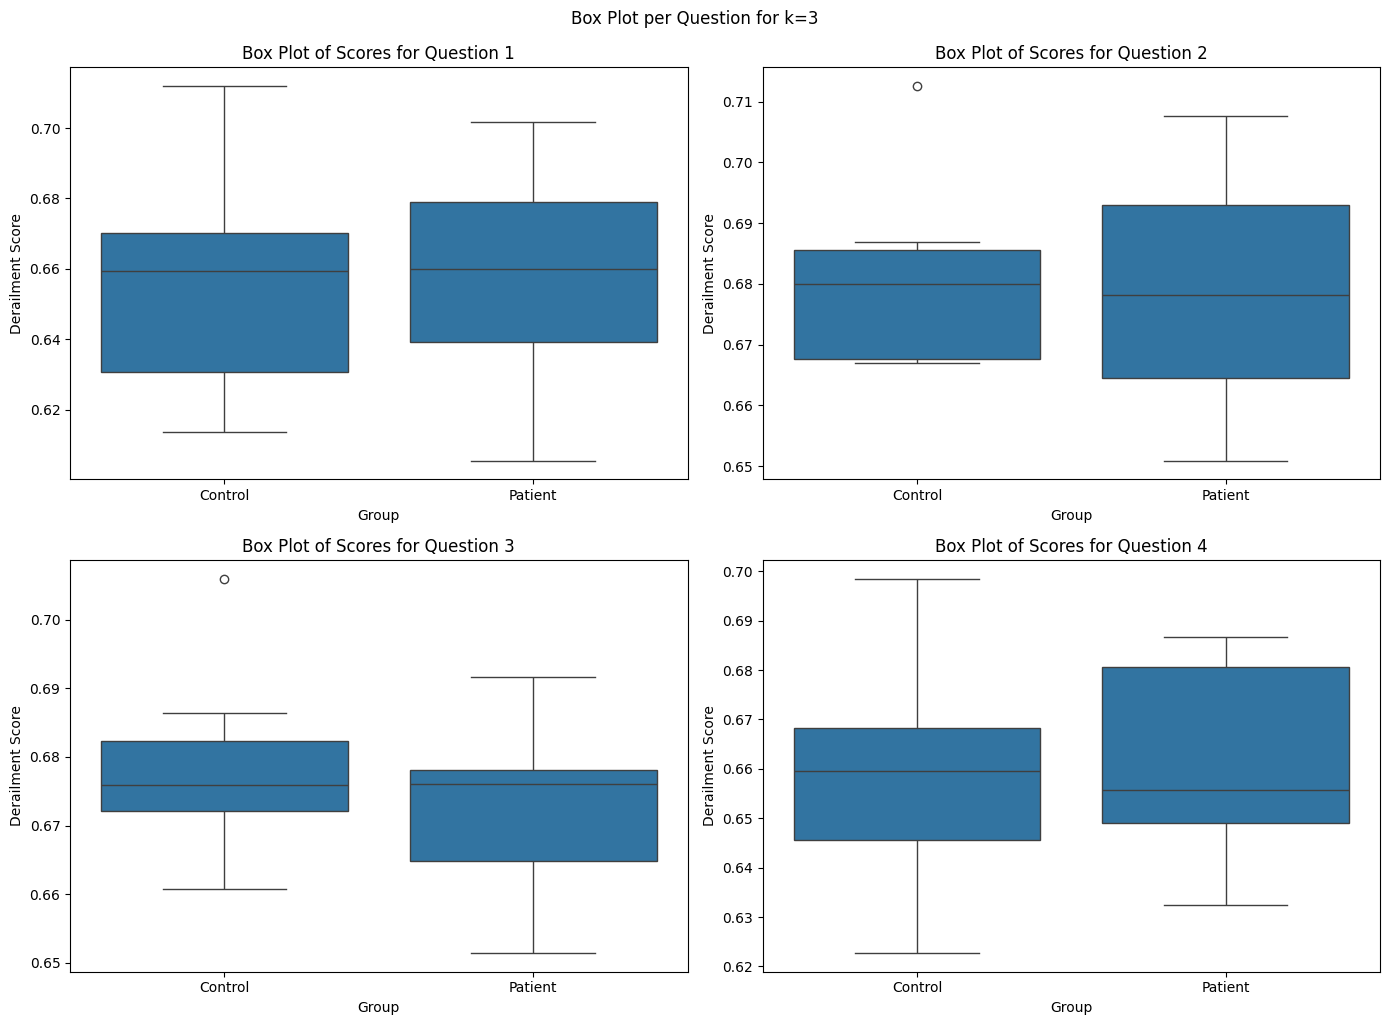

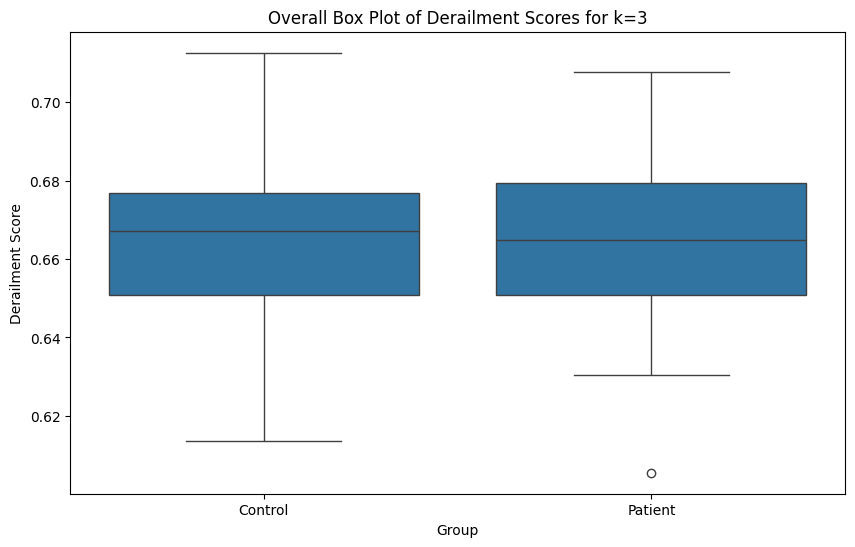

T-Test Results per Question for k=3:
Question 1: t-statistic = -0.16630587698972912, p-value = 0.5652464749145727, control mean = 0.655109167098999, patient mean = 0.6572314500808716
Question 2: t-statistic = 0.1348983244423177, p-value = 0.4480122736623269, control mean = 0.6808319091796875, patient mean = 0.6789674758911133
Question 3: t-statistic = 0.6649699768321721, p-value = 0.25988388014665215, control mean = 0.6779561042785645, patient mean = 0.6724286079406738
Question 4: t-statistic = -0.42718597354097126, p-value = 0.6626973056337953, control mean = 0.6562045812606812, patient mean = 0.6609076261520386

Overall T-Test Results for k=3: t-statistic = -0.1729344468347247, p-value = 0.568371320116859, control mean = 0.6637039184570312, patient mean = 0.6648301482200623

Welch's Test Results per Question for k=3:
Question 1: t-statistic = -0.16215556135801762, p-value = 0.563201179008371
Question 2: t-statistic = 0.106448611415292, p-value = 0.4614629445145759
Question 3: t-stati

In [53]:
full_analysis(control_valid_answers_content_words, patient_valid_answers_content_words, tokenizer, embedding_model, k=3, sliding_window=False)

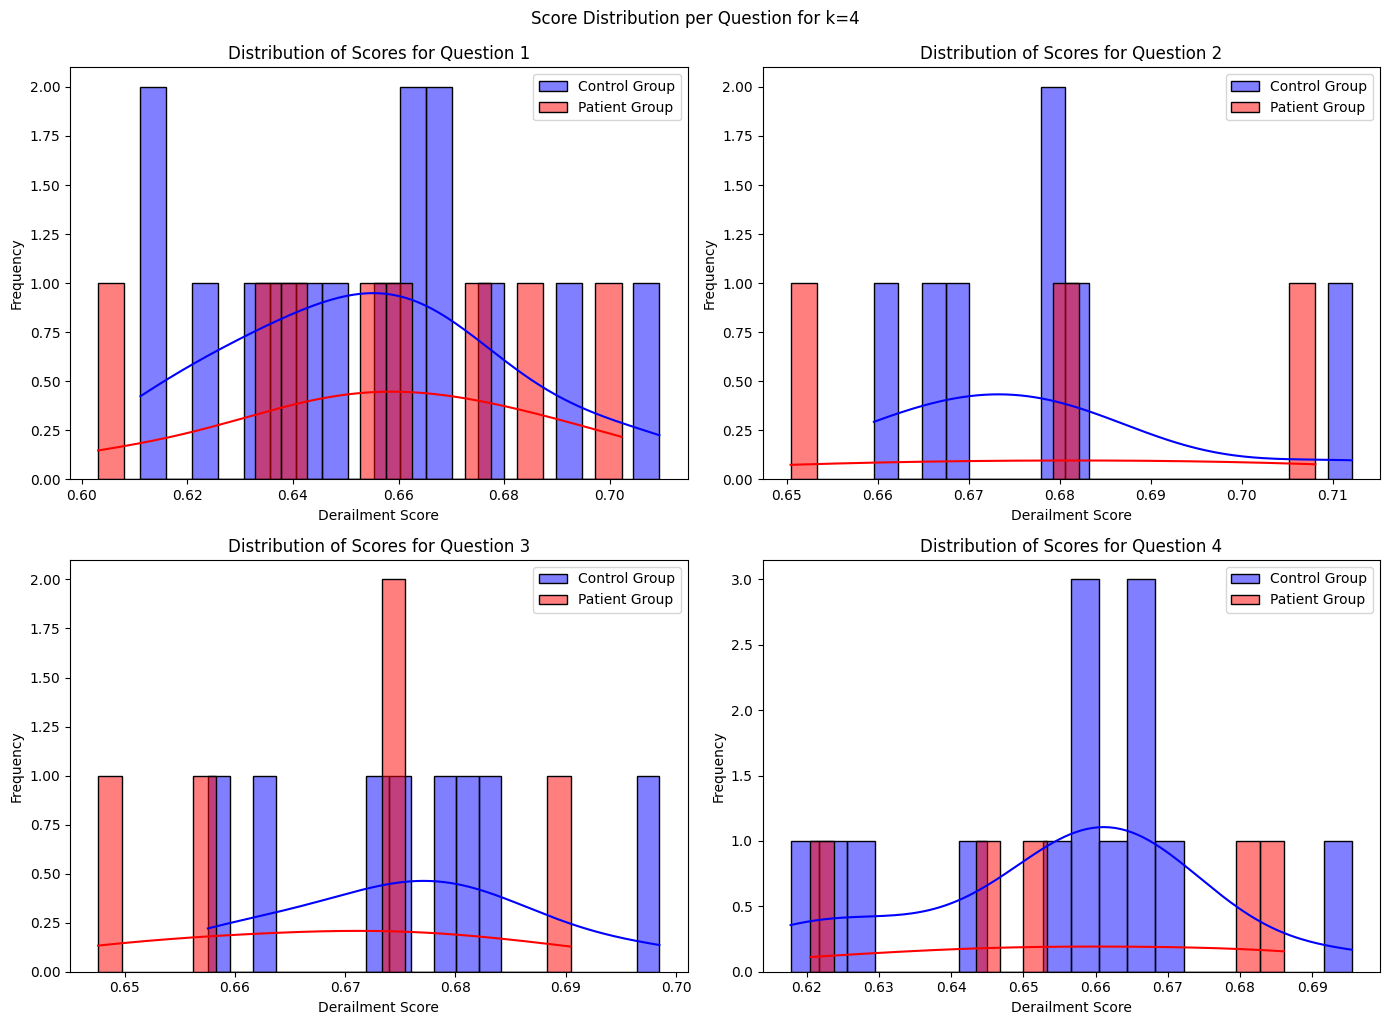

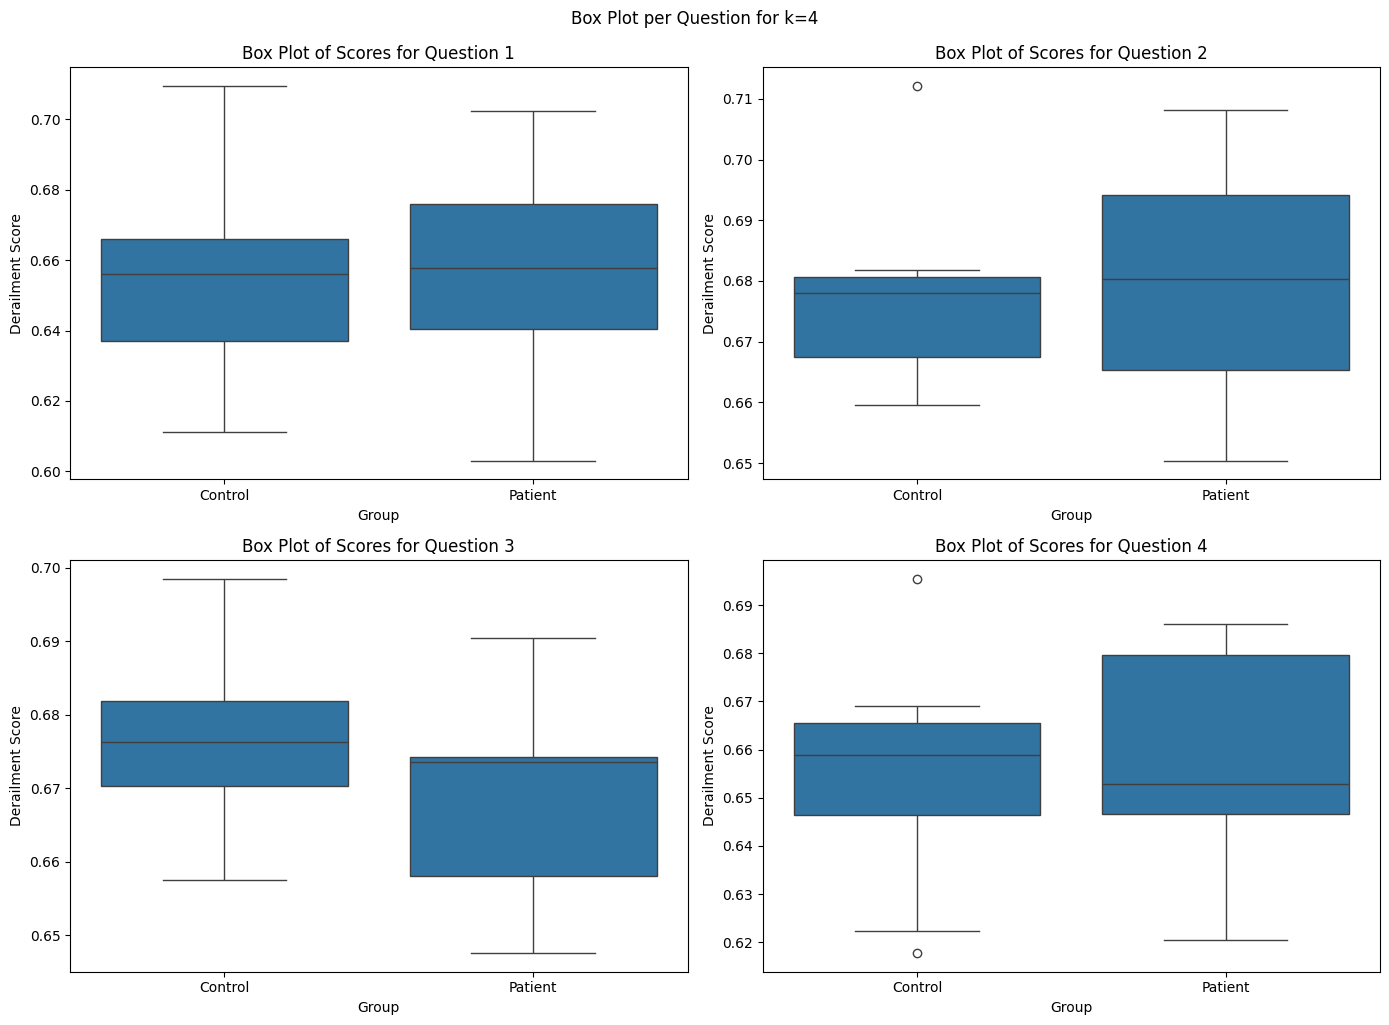

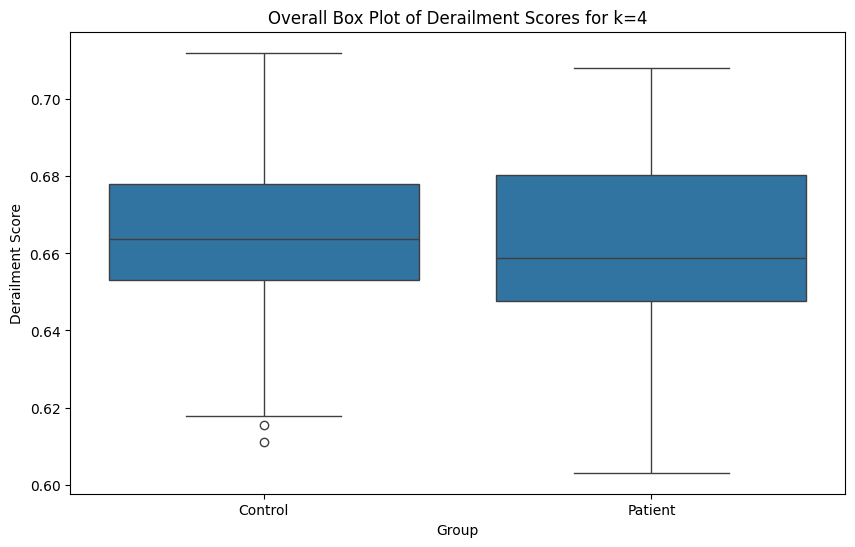

T-Test Results per Question for k=4:
Question 1: t-statistic = -0.226116580214013, p-value = 0.5883514787291286, control mean = 0.6540254950523376, patient mean = 0.6568599939346313
Question 2: t-statistic = -0.1144530941017726, p-value = 0.5441504855323648, control mean = 0.6779888868331909, patient mean = 0.6796210408210754
Question 3: t-statistic = 0.8916903287938669, p-value = 0.1958234434334939, control mean = 0.6760150194168091, patient mean = 0.6687728762626648
Question 4: t-statistic = -0.2159546440961889, p-value = 0.5842034784362239, control mean = 0.654619038105011, patient mean = 0.6571313142776489

Overall T-Test Results for k=4: t-statistic = -0.15186145185441619, p-value = 0.5601092562632919, control mean = 0.6620248556137085, patient mean = 0.6630126237869263

Welch's Test Results per Question for k=4:
Question 1: t-statistic = -0.21805289094484934, p-value = 0.5846171537268225
Question 2: t-statistic = -0.09138449768676969, p-value = 0.5331512019832343
Question 3: t-st

In [54]:
full_analysis(control_valid_answers_content_words, patient_valid_answers_content_words, tokenizer, embedding_model, k=4, sliding_window=False)

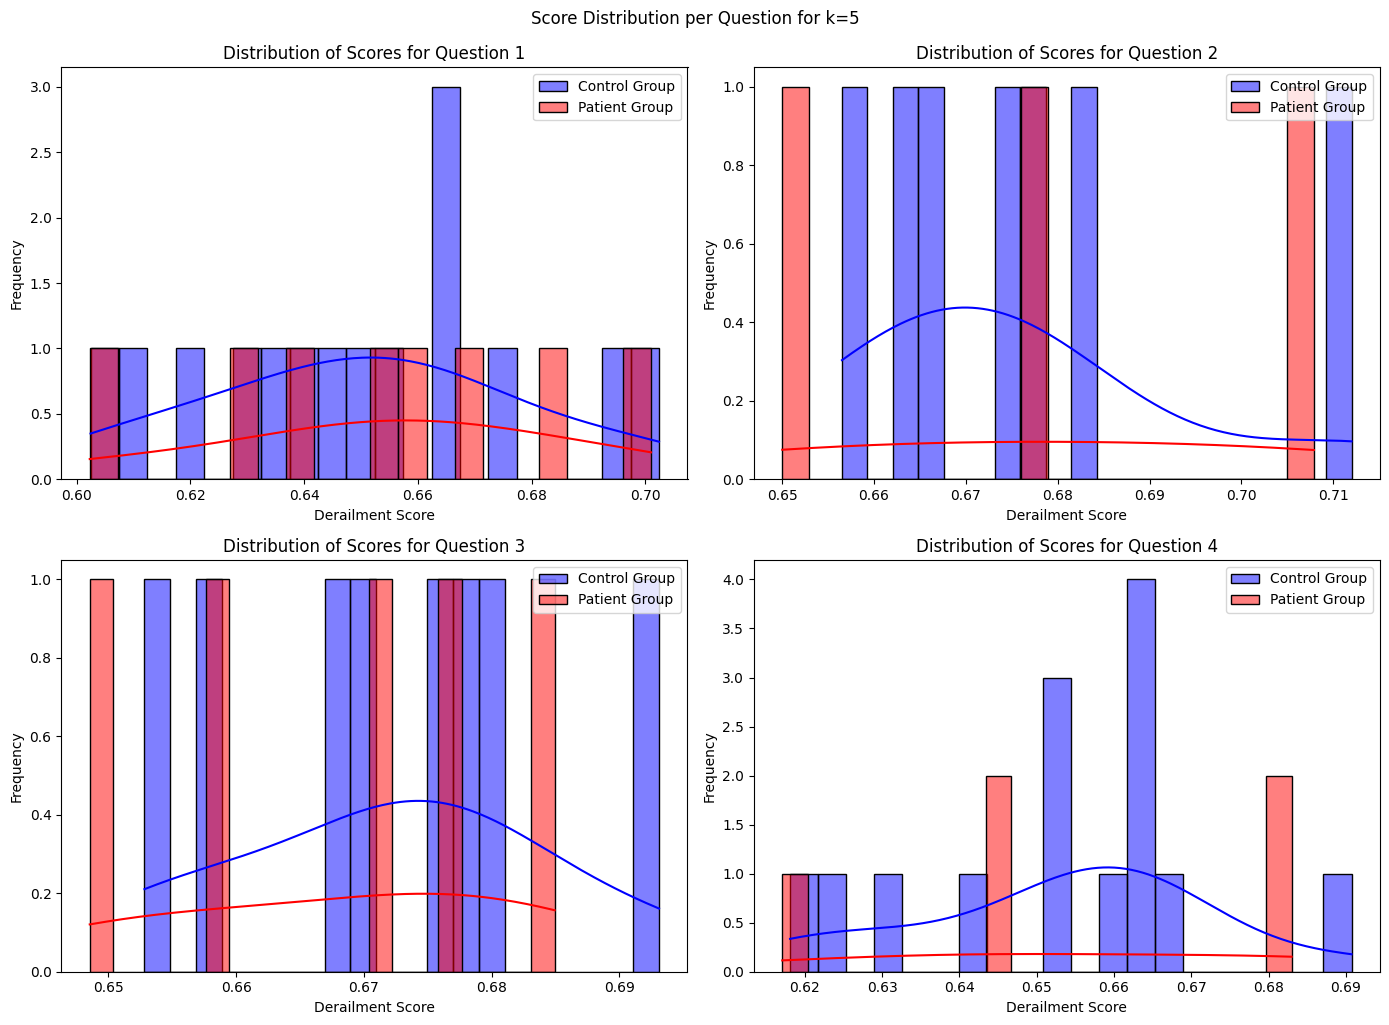

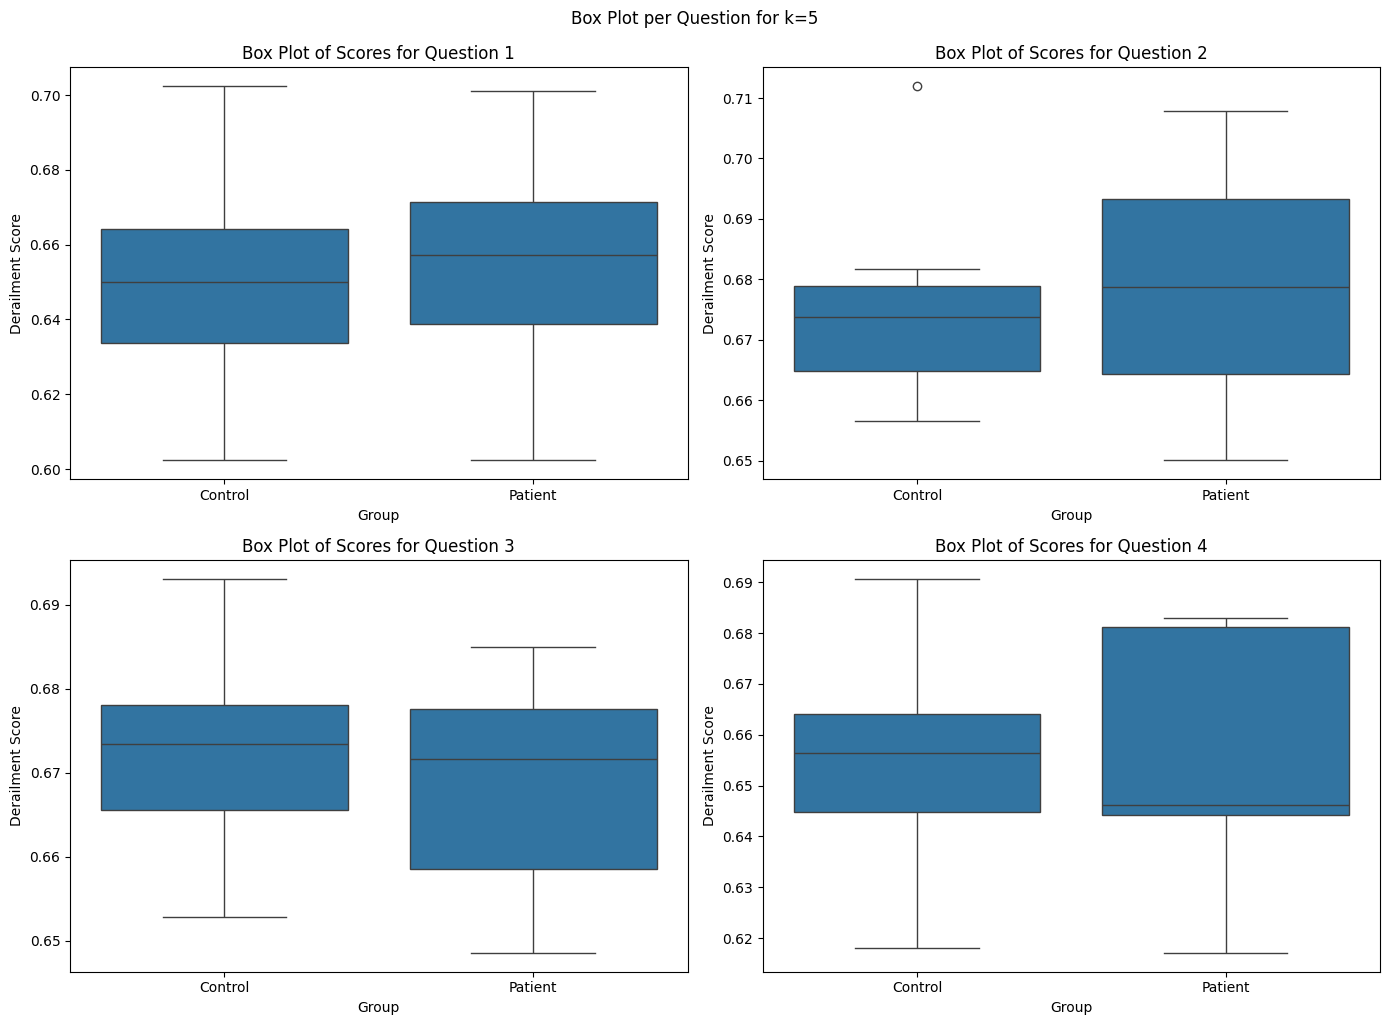

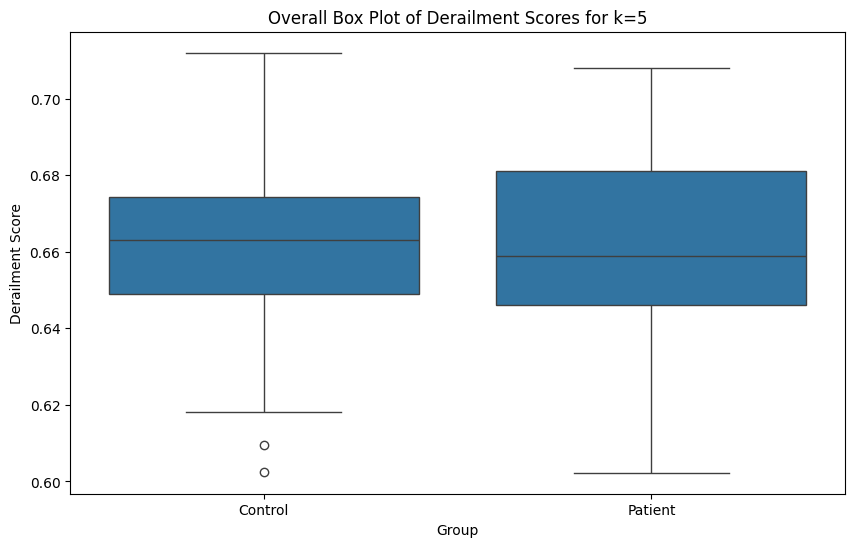

T-Test Results per Question for k=5:
Question 1: t-statistic = -0.3449444474295596, p-value = 0.6332164801430513, control mean = 0.6505613923072815, patient mean = 0.6549652814865112
Question 2: t-statistic = -0.21699965853981448, p-value = 0.5831797998759263, control mean = 0.6756611466407776, patient mean = 0.6788539886474609
Question 3: t-statistic = 0.48494159989803776, p-value = 0.318615411910884, control mean = 0.6720006465911865, patient mean = 0.6682421565055847
Question 4: t-statistic = -0.10984768492026609, p-value = 0.5430917530618279, control mean = 0.6530826687812805, patient mean = 0.6543227434158325

Overall T-Test Results for k=5: t-statistic = -0.32680701952515623, p-value = 0.6275514164311841, control mean = 0.659254789352417, patient mean = 0.6613861322402954

Welch's Test Results per Question for k=5:
Question 1: t-statistic = -0.3365631053533096, p-value = 0.6291811439908503
Question 2: t-statistic = -0.1768833762745727, p-value = 0.5639903104905768
Question 3: t-s

In [55]:
full_analysis(control_valid_answers_content_words, patient_valid_answers_content_words, tokenizer, embedding_model, k=5, sliding_window=False)

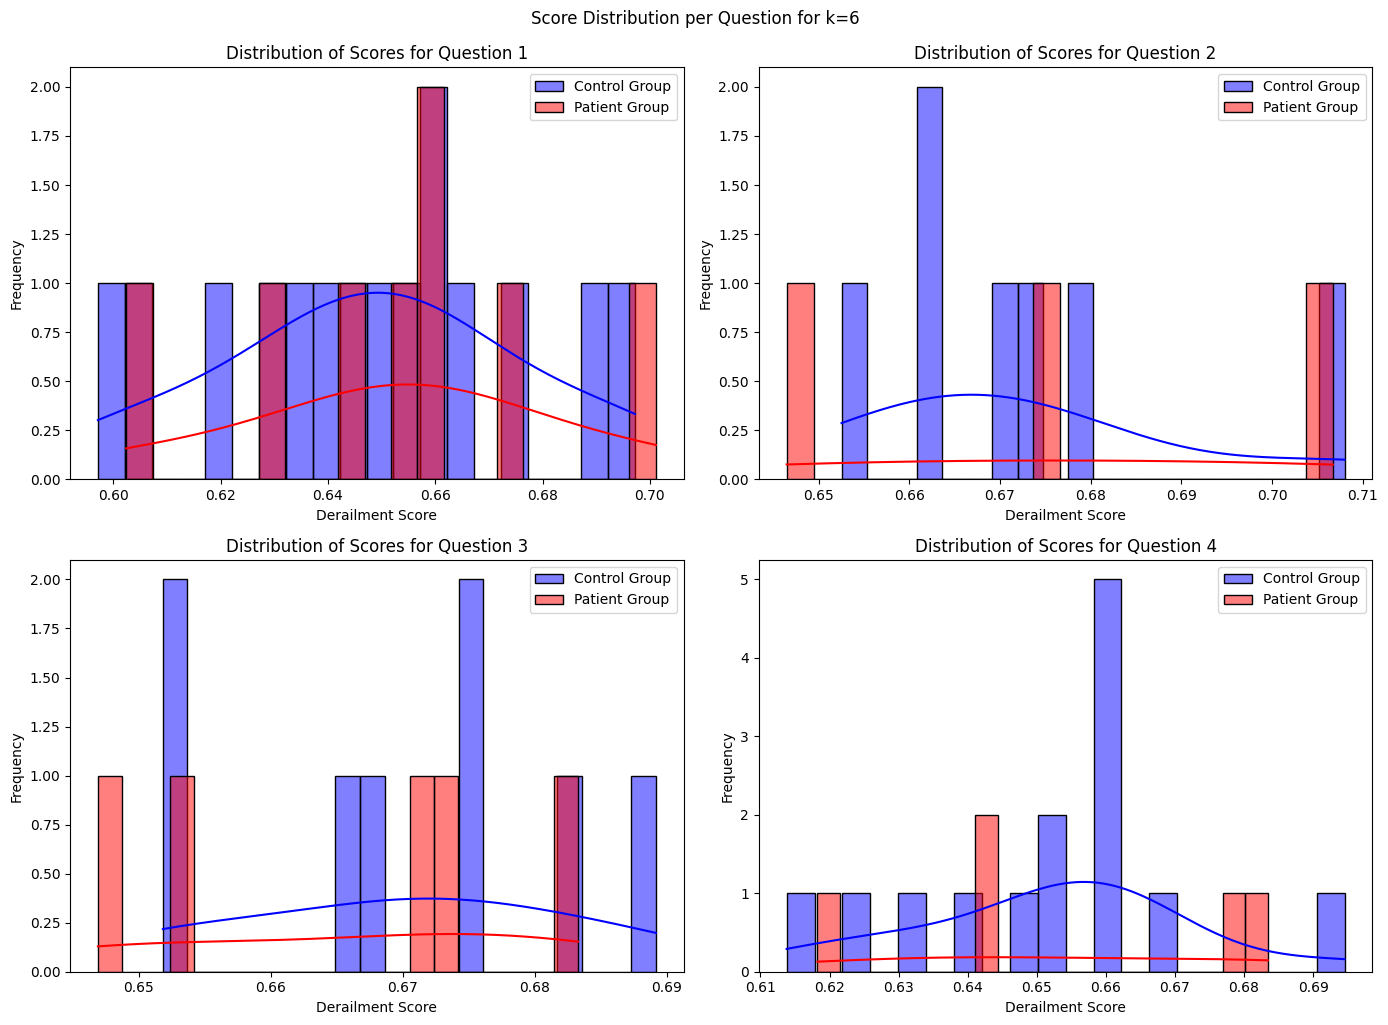

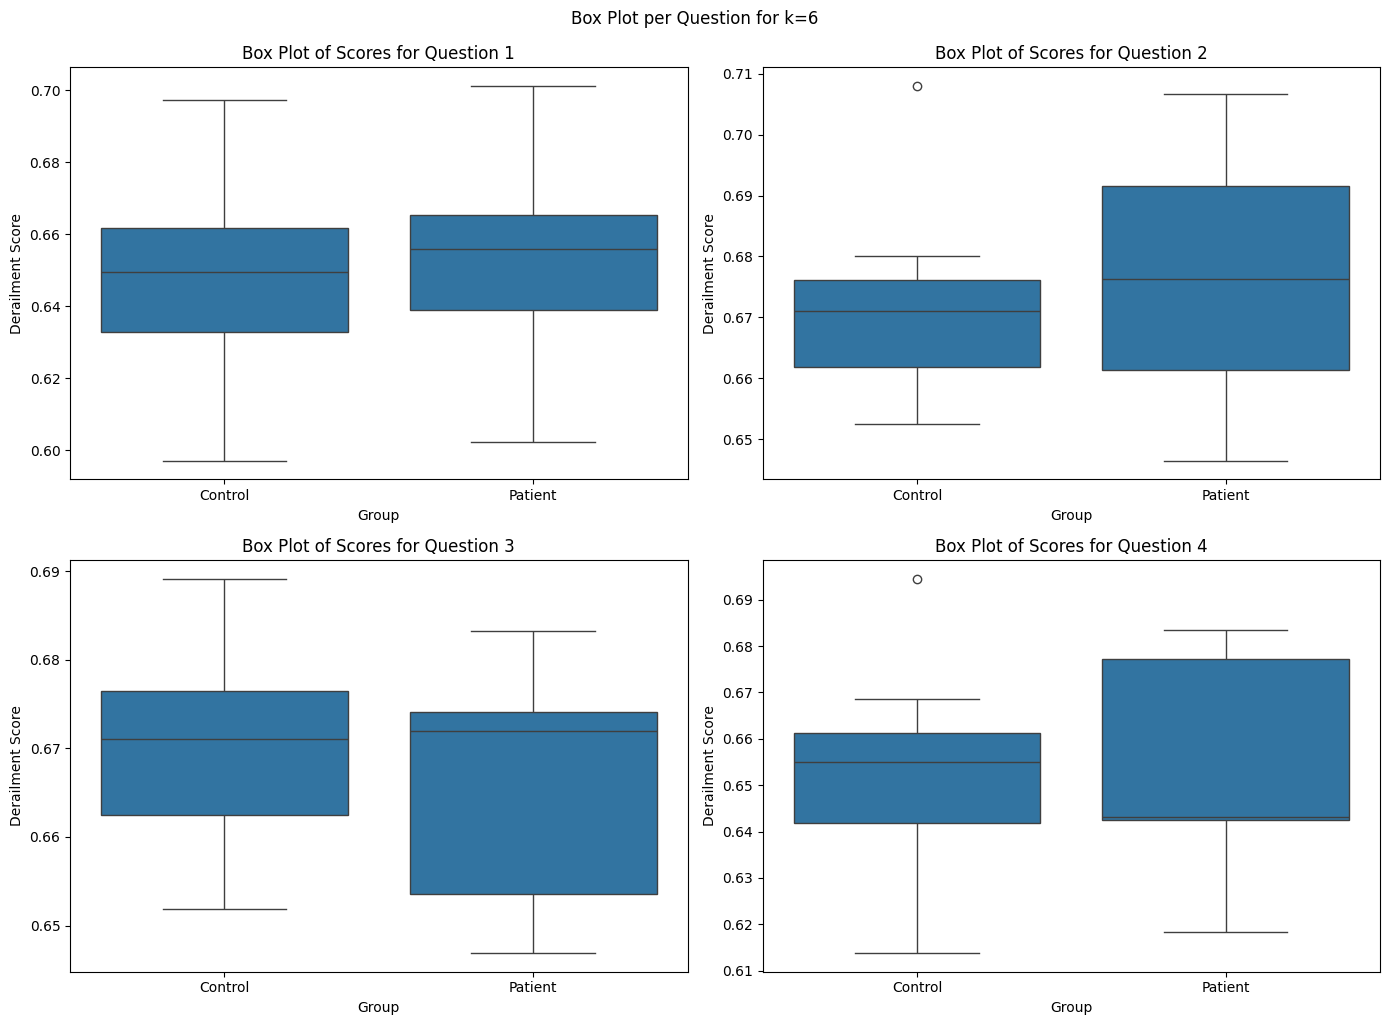

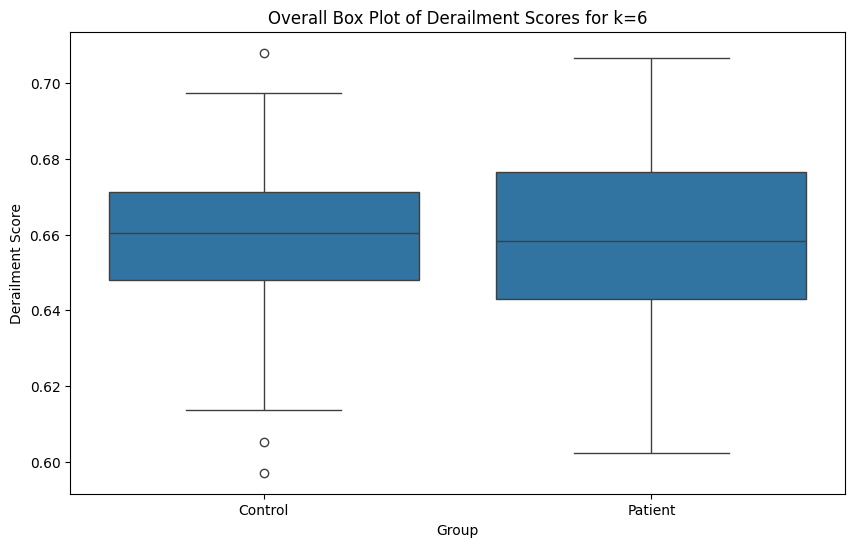

T-Test Results per Question for k=6:
Question 1: t-statistic = -0.37338813555866207, p-value = 0.6436988266607718, control mean = 0.6484131217002869, patient mean = 0.6531473994255066
Question 2: t-statistic = -0.26539489726277304, p-value = 0.6012920195599398, control mean = 0.6725334525108337, patient mean = 0.6765029430389404
Question 3: t-statistic = 0.49966620731421696, p-value = 0.31357687484633034, control mean = 0.6699116230010986, patient mean = 0.6659618020057678
Question 4: t-statistic = -0.08603524745379283, p-value = 0.5337782026693643, control mean = 0.6518798470497131, patient mean = 0.6528648138046265

Overall T-Test Results for k=6: t-statistic = -0.3394219381878393, p-value = 0.6322895999815438, control mean = 0.6572622656822205, patient mean = 0.6594676375389099

Welch's Test Results per Question for k=6:
Question 1: t-statistic = -0.36870114582997787, p-value = 0.6410489962284176
Question 2: t-statistic = -0.21258090981325042, p-value = 0.5765024666336631
Question 3

In [56]:
full_analysis(control_valid_answers_content_words, patient_valid_answers_content_words, tokenizer, embedding_model, k=6, sliding_window=False)

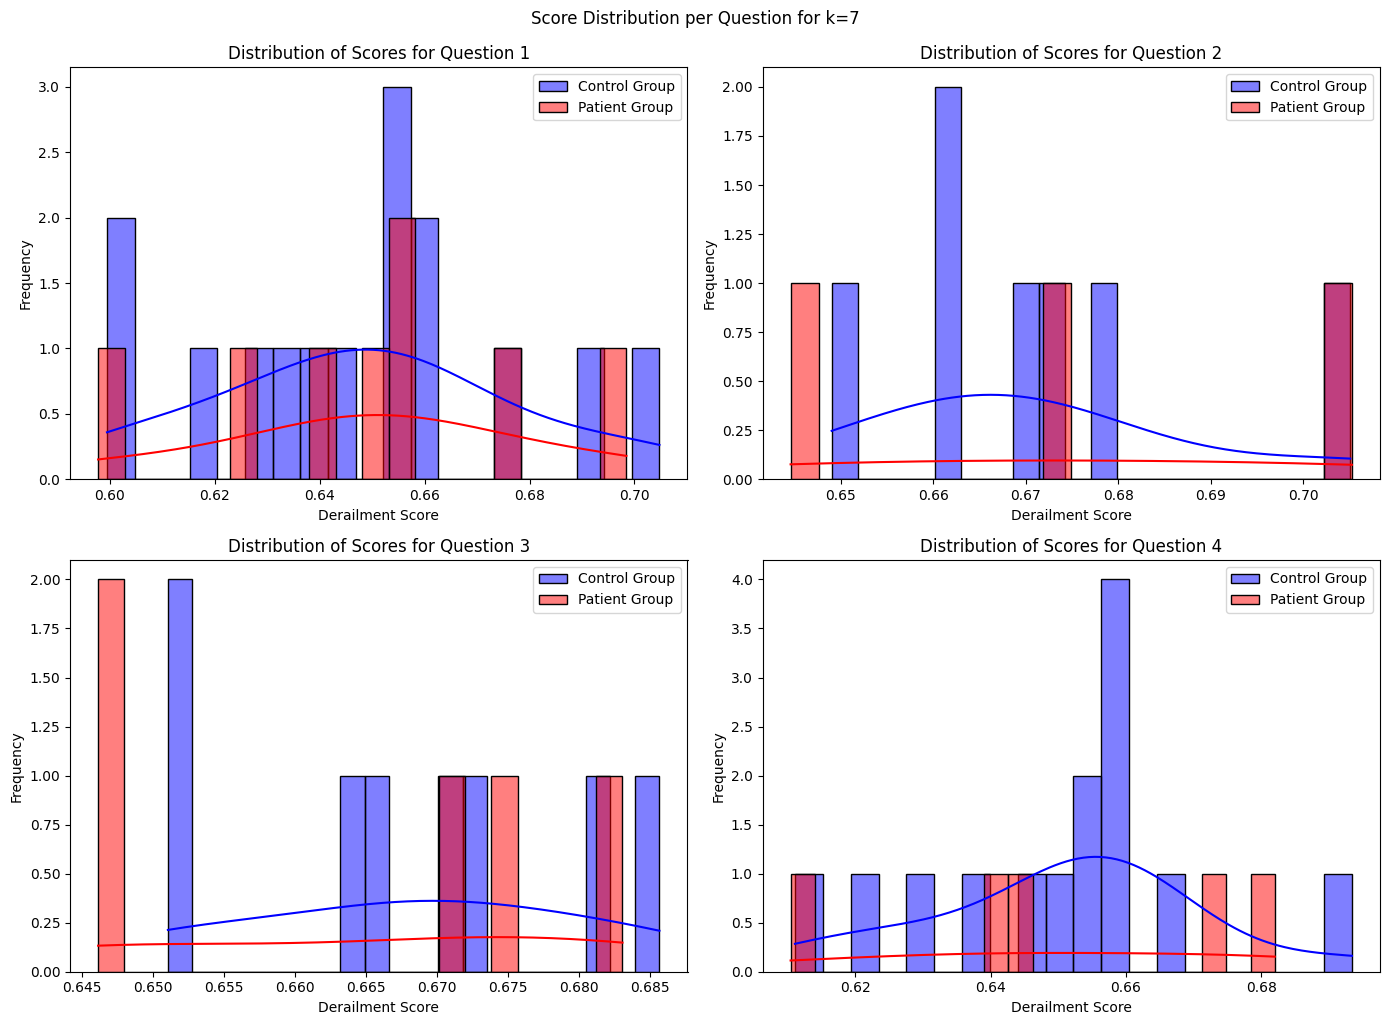

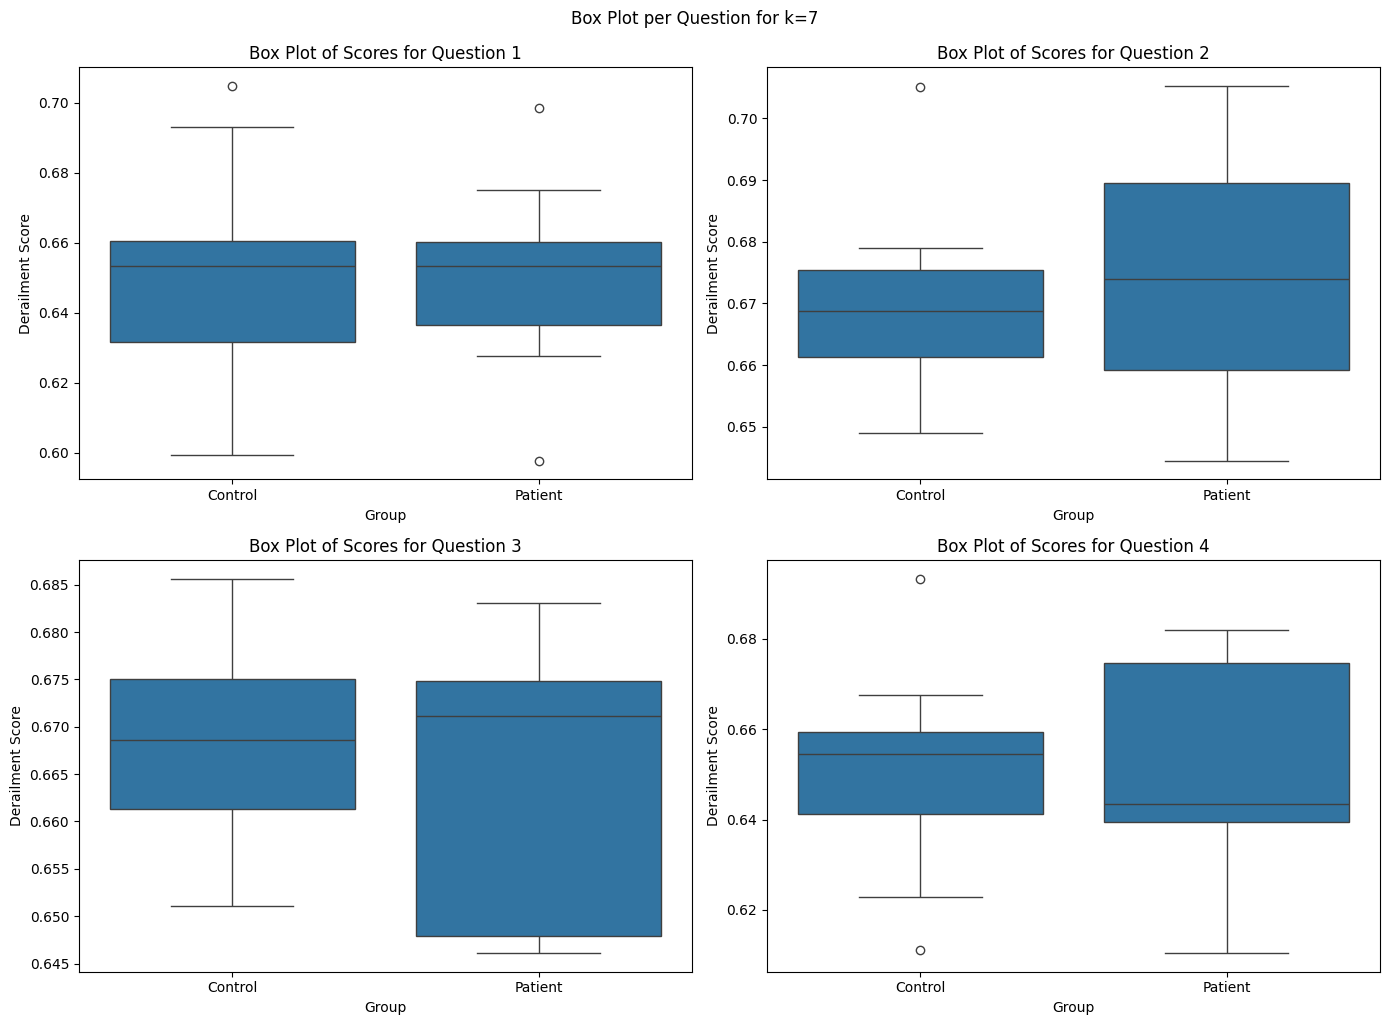

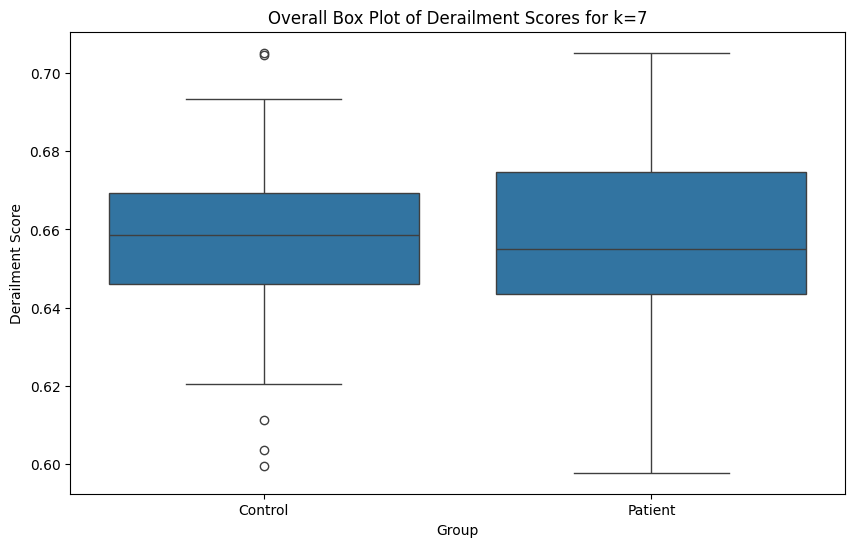

T-Test Results per Question for k=7:
Question 1: t-statistic = -0.12801419886528959, p-value = 0.5503221322703424, control mean = 0.6483524441719055, patient mean = 0.6500191688537598
Question 2: t-statistic = -0.24537991262478345, p-value = 0.5938300708088879, control mean = 0.6709074378013611, patient mean = 0.6745712757110596
Question 3: t-statistic = 0.43579674278697117, p-value = 0.33570645047465336, control mean = 0.6680970191955566, patient mean = 0.6645901799201965
Question 4: t-statistic = 0.0362122318052764, p-value = 0.4857674783391259, control mean = 0.6504839658737183, patient mean = 0.6500548124313354

Overall T-Test Results for k=7: t-statistic = -0.1202681490803875, p-value = 0.5476732654204519, control mean = 0.6562089323997498, patient mean = 0.6570044159889221

Welch's Test Results per Question for k=7:
Question 1: t-statistic = -0.12706841076414235, p-value = 0.5496605020910541
Question 2: t-statistic = -0.19520969642218242, p-value = 0.5703064975675375
Question 3: 

In [57]:
full_analysis(control_valid_answers_content_words, patient_valid_answers_content_words, tokenizer, embedding_model, k=7, sliding_window=False)

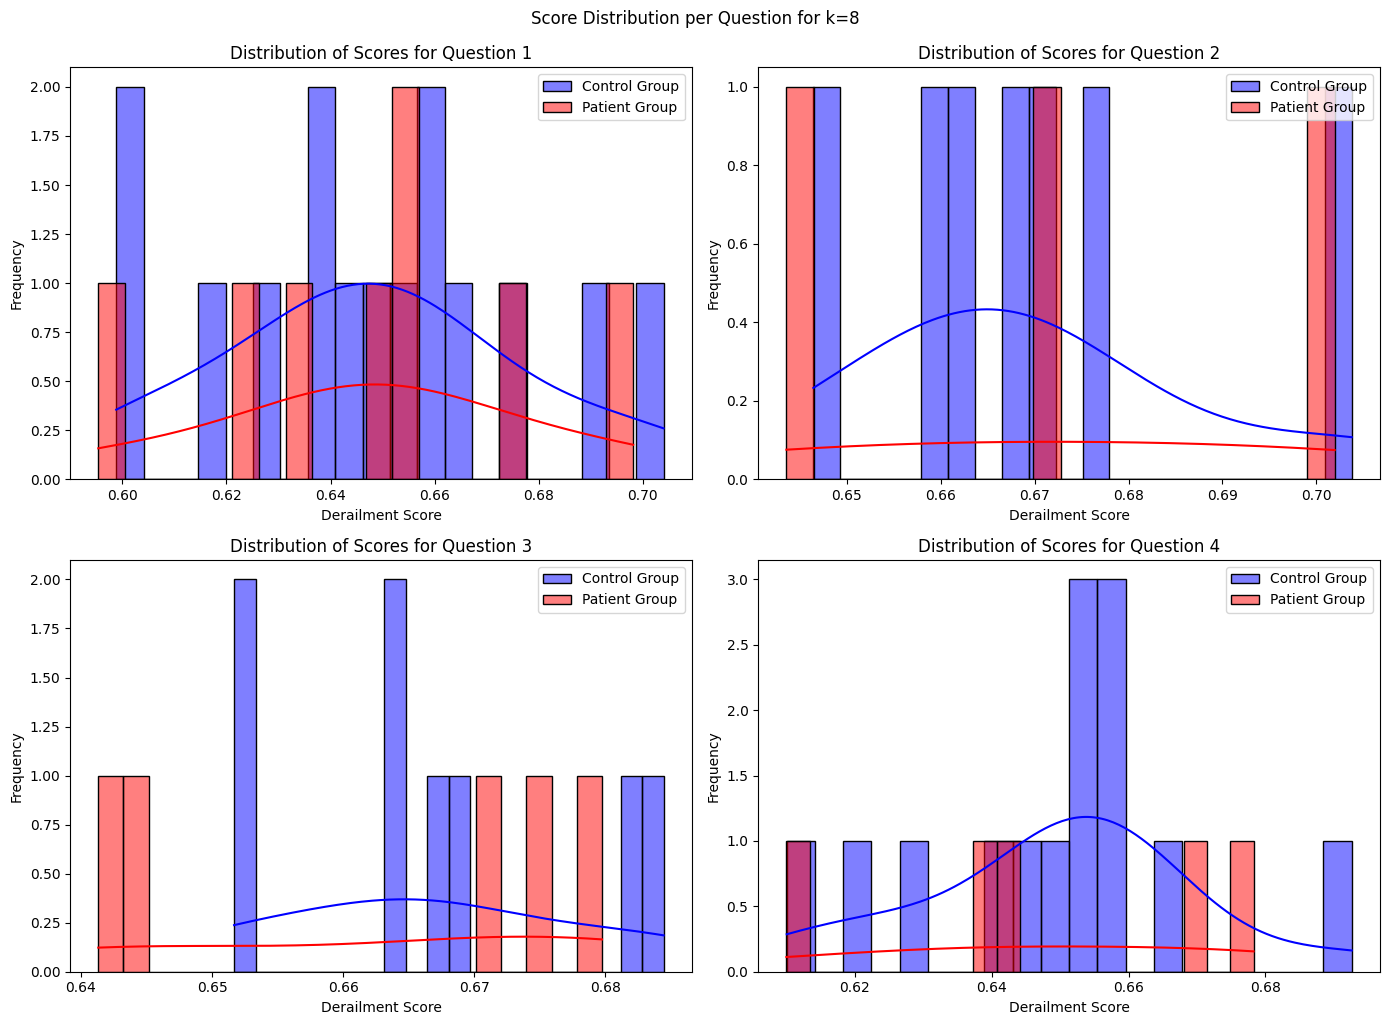

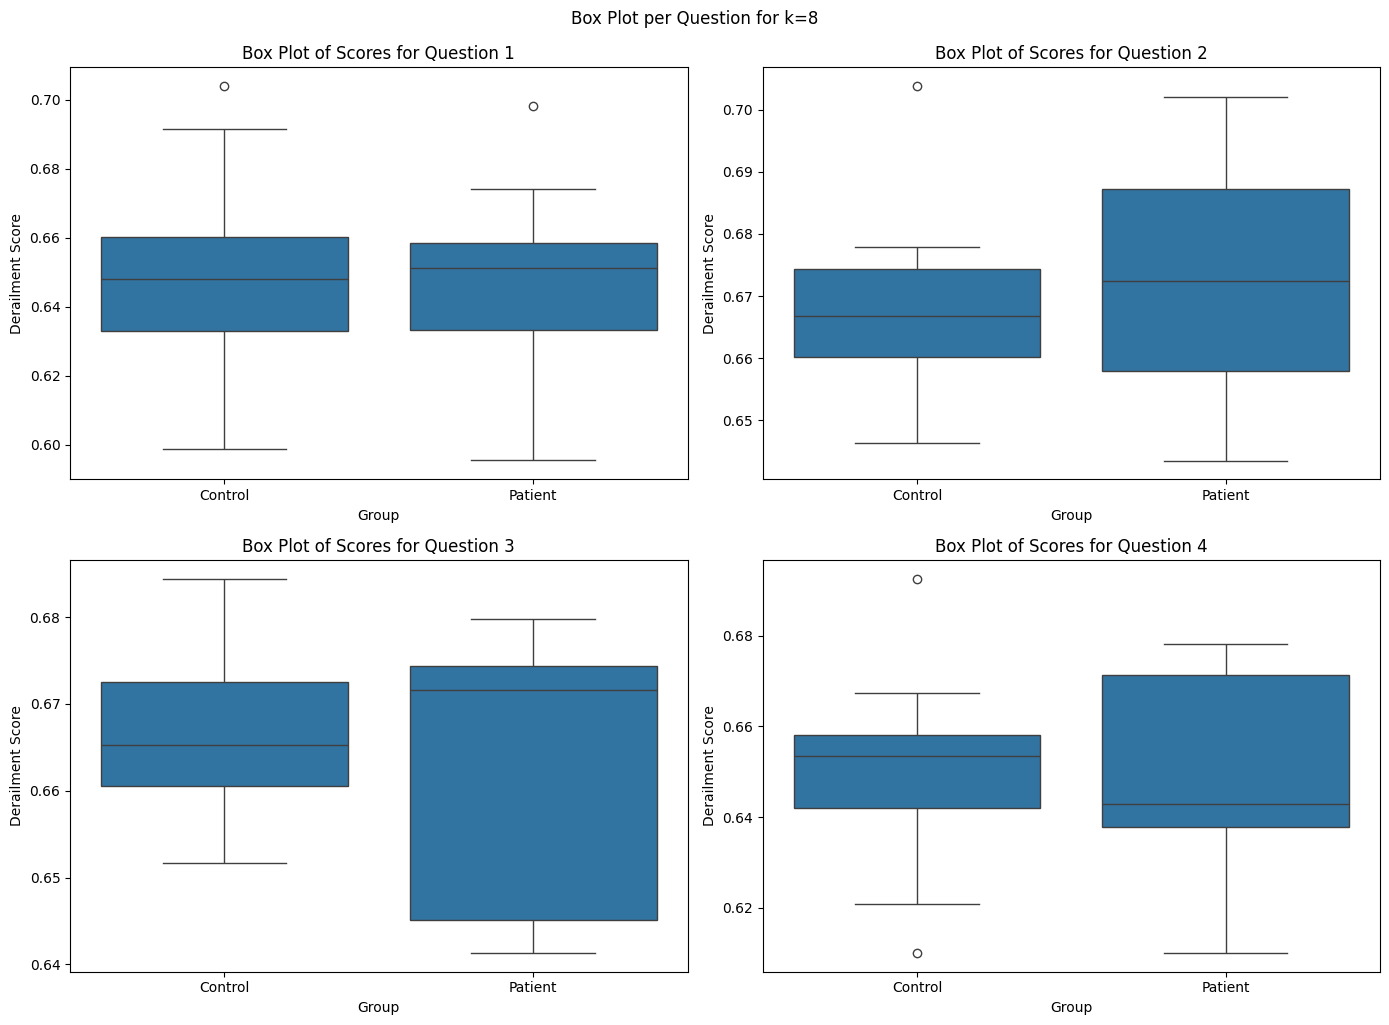

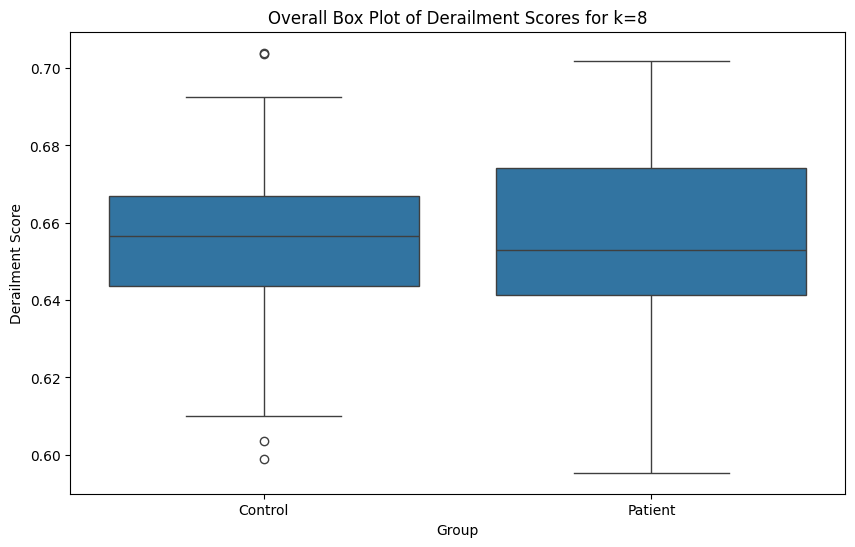

T-Test Results per Question for k=8:
Question 1: t-statistic = -0.026298650875871854, p-value = 0.5103662784410994, control mean = 0.6476381421089172, patient mean = 0.6479817628860474
Question 2: t-statistic = -0.21692382559849258, p-value = 0.5831512394074754, control mean = 0.6694229245185852, patient mean = 0.6726267337799072
Question 3: t-statistic = 0.5116330443581261, p-value = 0.30951098113198255, control mean = 0.6666322946548462, patient mean = 0.6624420285224915
Question 4: t-statistic = 0.11201390429786572, p-value = 0.4560621870584298, control mean = 0.6493828892707825, patient mean = 0.6480778455734253

Overall T-Test Results for k=8: t-statistic = 0.02192990319239411, p-value = 0.49128659099075994, control mean = 0.655112624168396, patient mean = 0.6549683213233948

Welch's Test Results per Question for k=8:
Question 1: t-statistic = -0.025819257172093196, p-value = 0.5101129300997133
Question 2: t-statistic = -0.17613296892482888, p-value = 0.5636926503234109
Question 3

In [58]:
full_analysis(control_valid_answers_content_words, patient_valid_answers_content_words, tokenizer, embedding_model, k=8, sliding_window=False)

**Content Words - sliding window:**

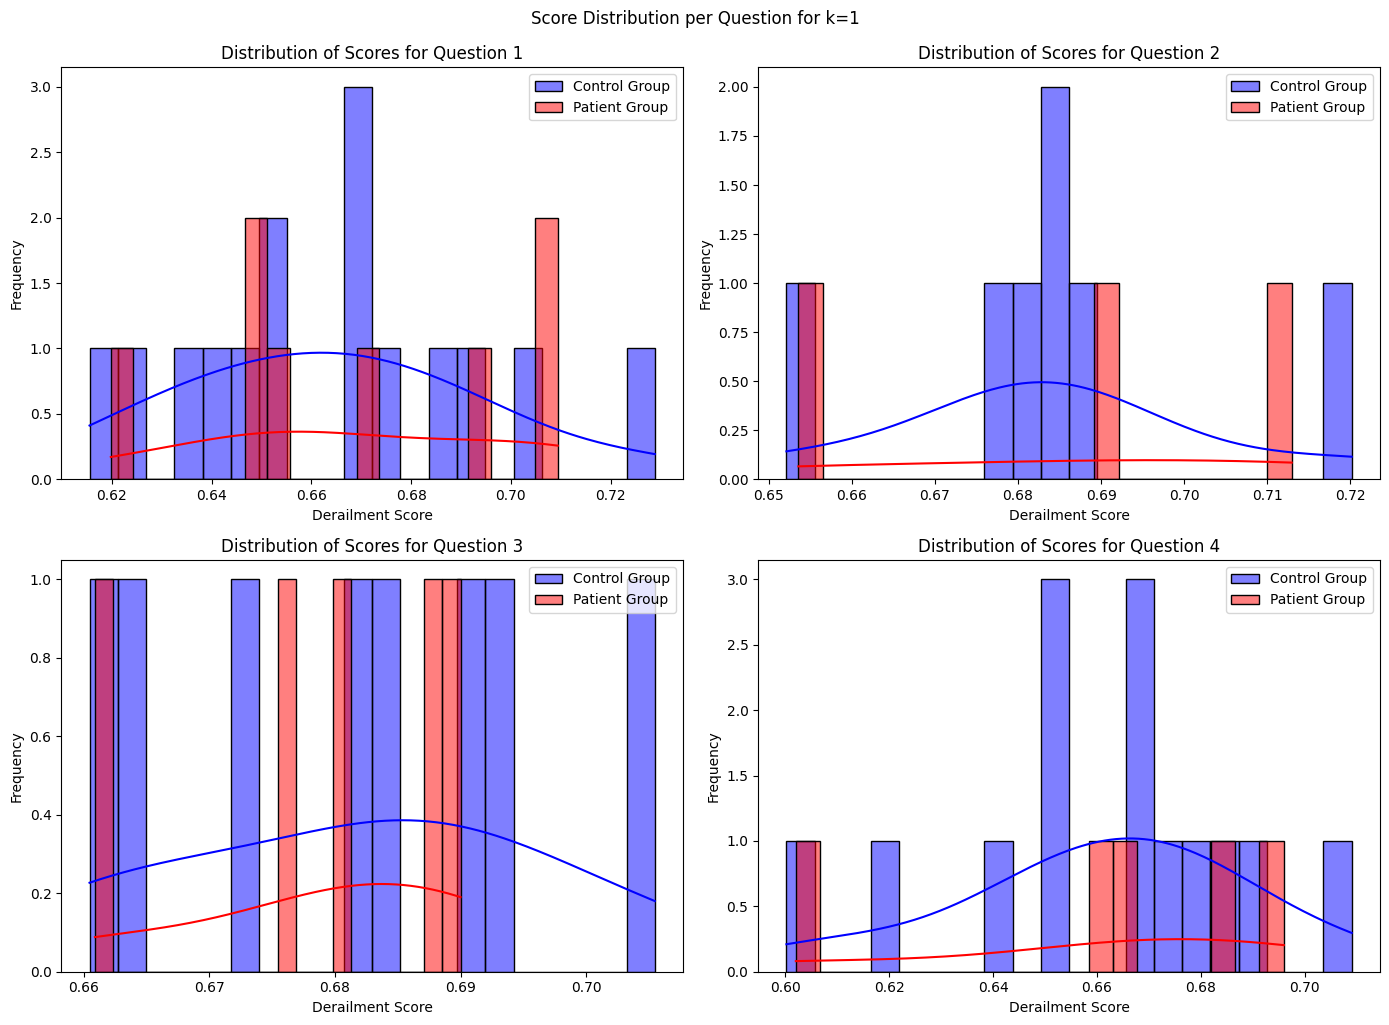

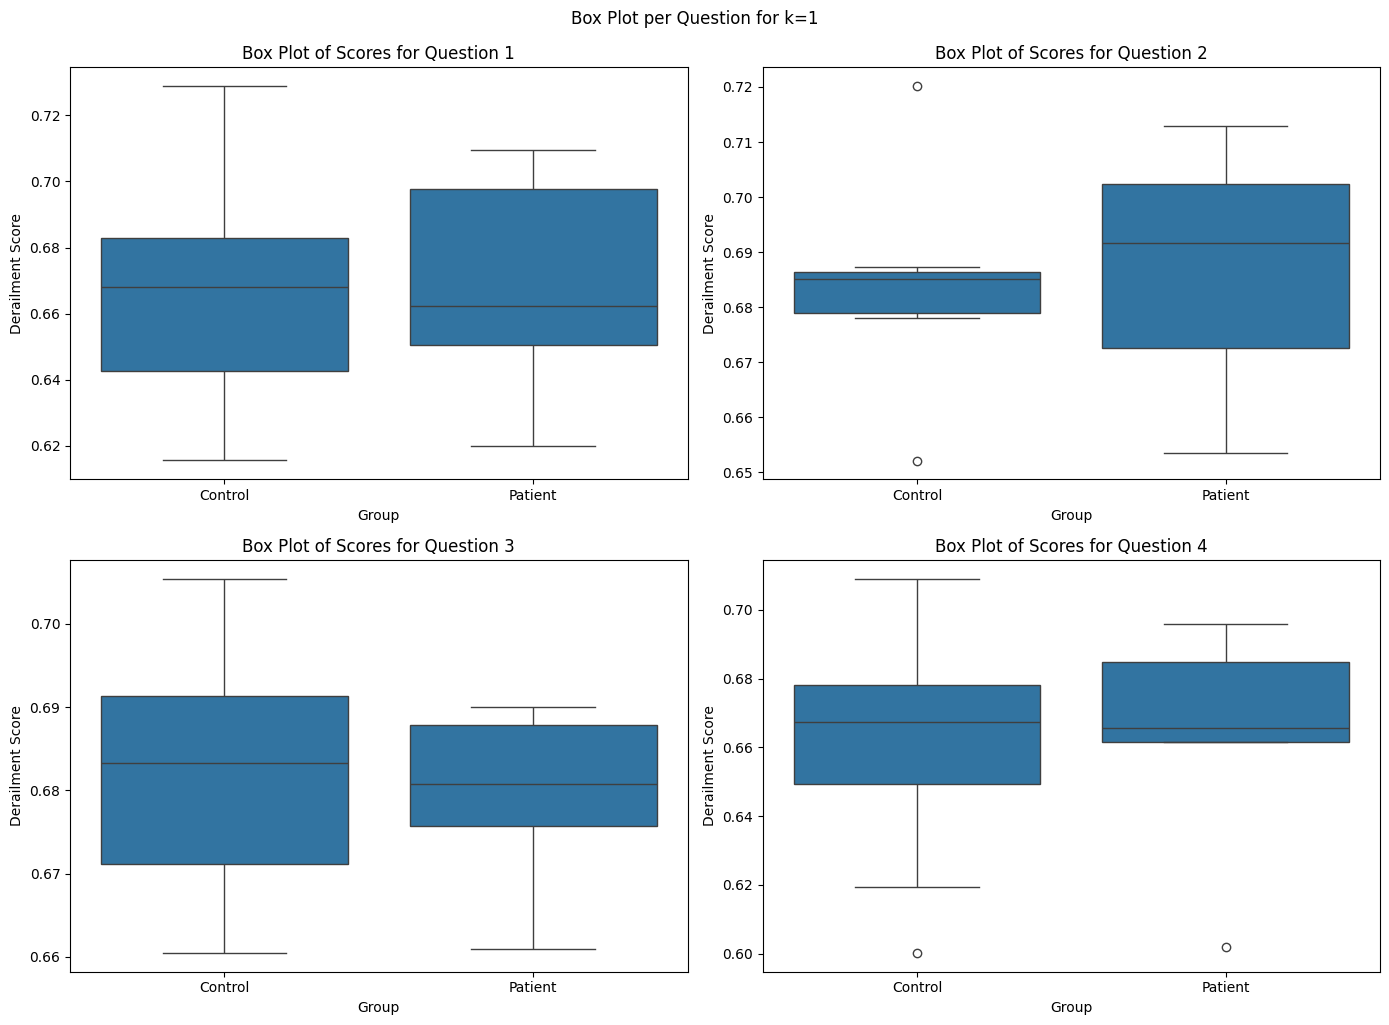

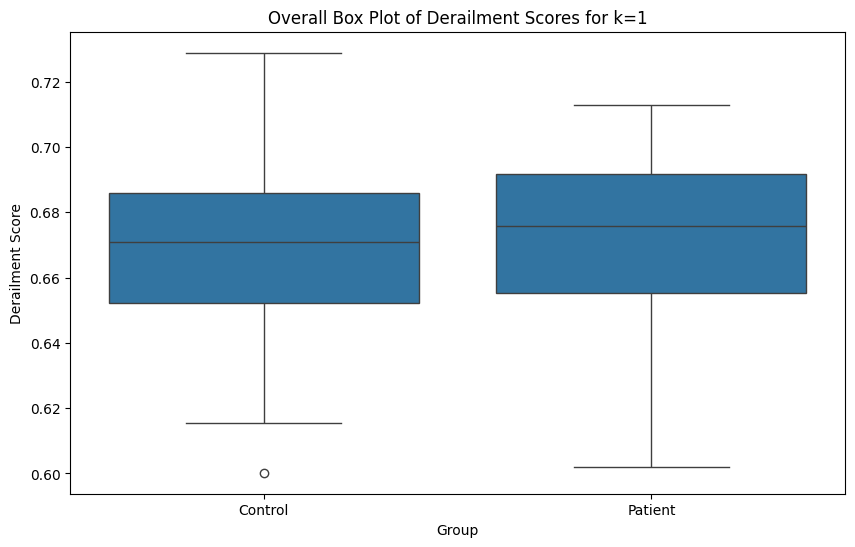

T-Test Results per Question for k=1:
Question 1: t-statistic = -0.3782703760986499, p-value = 0.6454866974750133, control mean = 0.6642917990684509, patient mean = 0.6693991422653198
Question 2: t-statistic = -0.13150697778021406, p-value = 0.5506893057477776, control mean = 0.6839971542358398, patient mean = 0.6860764622688293
Question 3: t-statistic = 0.33052159768655615, p-value = 0.37360785350075554, control mean = 0.6817143559455872, patient mean = 0.6790593862533569
Question 4: t-statistic = -0.09786004626260457, p-value = 0.5384060050889945, control mean = 0.6604822278022766, patient mean = 0.6620358228683472

Overall T-Test Results for k=1: t-statistic = -0.4035062442238391, p-value = 0.6560289304604832, control mean = 0.6693822741508484, patient mean = 0.6723284721374512

Welch's Test Results per Question for k=1:
Question 1: t-statistic = -0.37387480469820655, p-value = 0.6429398676038101
Question 2: t-statistic = -0.10980884498761212, p-value = 0.5400147984874147
Question 3:

In [59]:
full_analysis(control_valid_answers_content_words, patient_valid_answers_content_words, tokenizer, embedding_model, k=1, sliding_window=True)

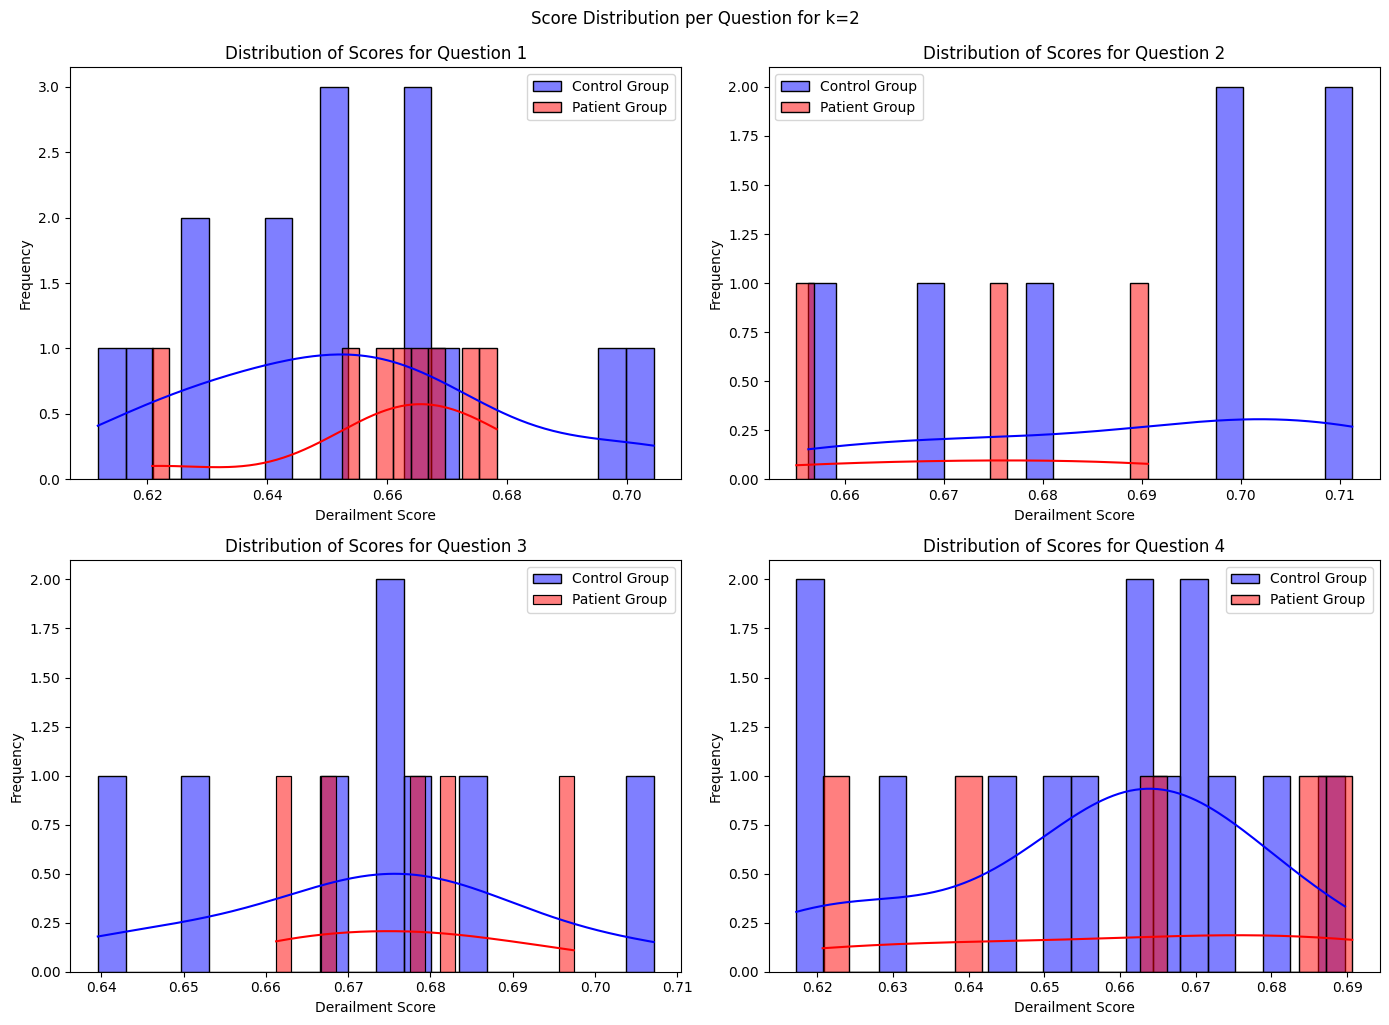

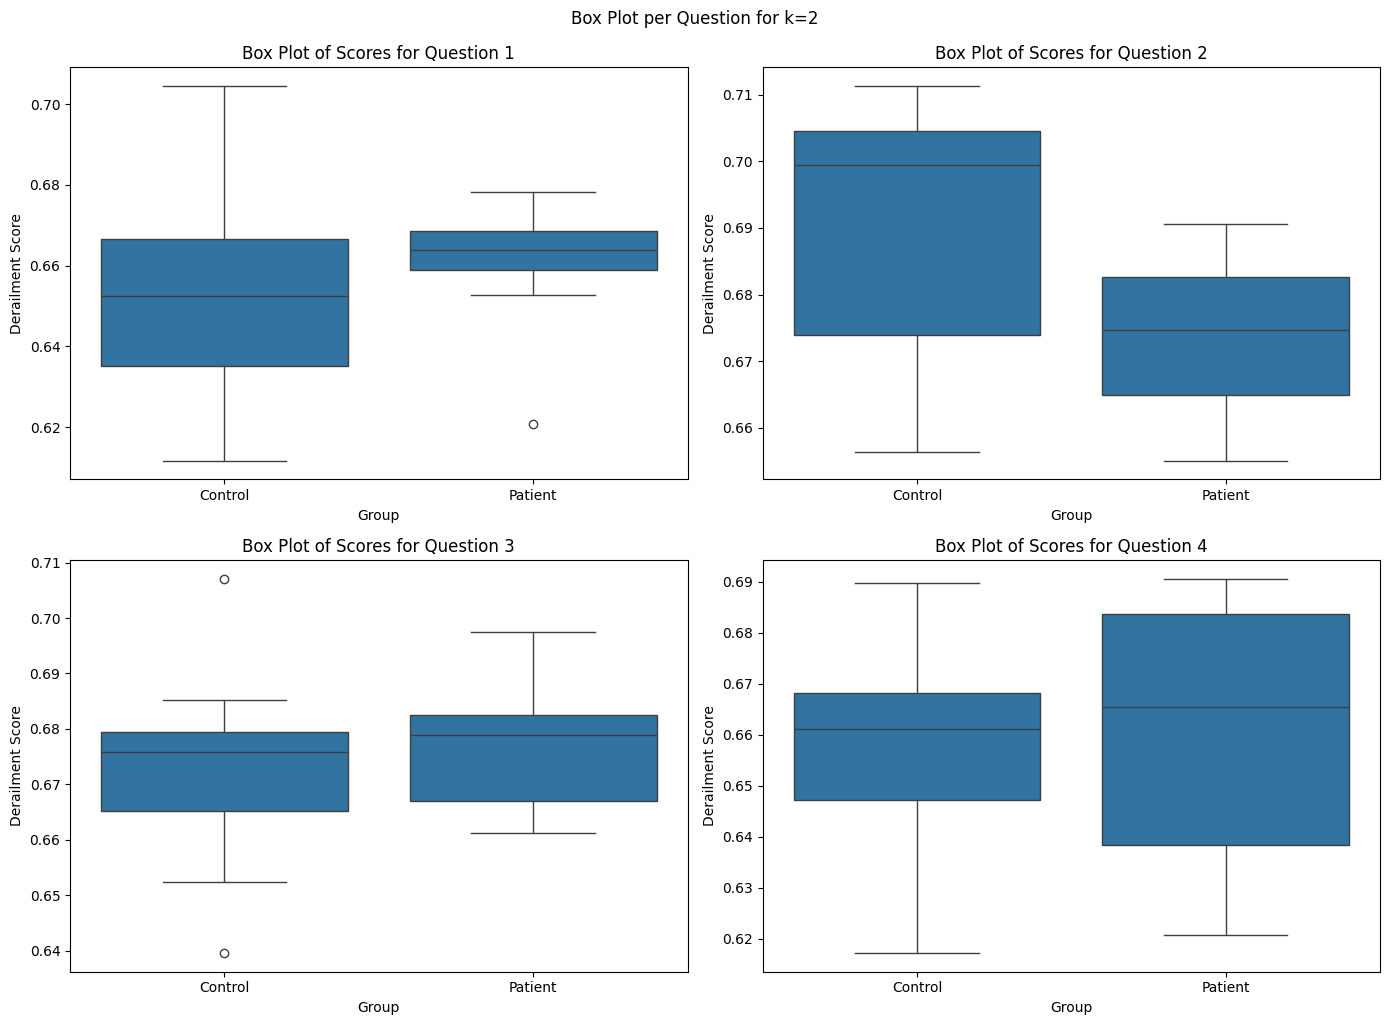

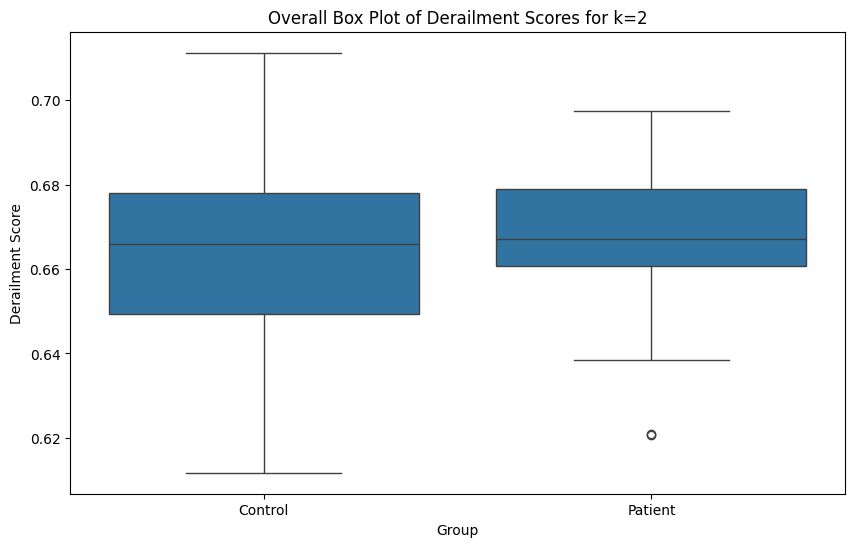

T-Test Results per Question for k=2:
Question 1: t-statistic = -0.6780513444722647, p-value = 0.7474287948439295, control mean = 0.6530159115791321, patient mean = 0.6600836515426636
Question 2: t-statistic = 1.1062740078796285, p-value = 0.15038098774168945, control mean = 0.6891314387321472, patient mean = 0.6734623312950134
Question 3: t-statistic = -0.43186949324359347, p-value = 0.662910194504142, control mean = 0.6728938817977905, patient mean = 0.677409291267395
Question 4: t-statistic = -0.2858721687973798, p-value = 0.6107848982315864, control mean = 0.656283974647522, patient mean = 0.6597961783409119

Overall T-Test Results for k=2: t-statistic = -0.40790147399882215, p-value = 0.6576355260719733, control mean = 0.6634155511856079, patient mean = 0.6660515666007996

Welch's Test Results per Question for k=2:
Question 1: t-statistic = -0.7661998529371069, p-value = 0.7736759628900369
Question 2: t-statistic = 1.1994083638670379, p-value = 0.14398214585105254
Question 3: t-sta

In [60]:
full_analysis(control_valid_answers_content_words, patient_valid_answers_content_words, tokenizer, embedding_model, k=2, sliding_window=True)

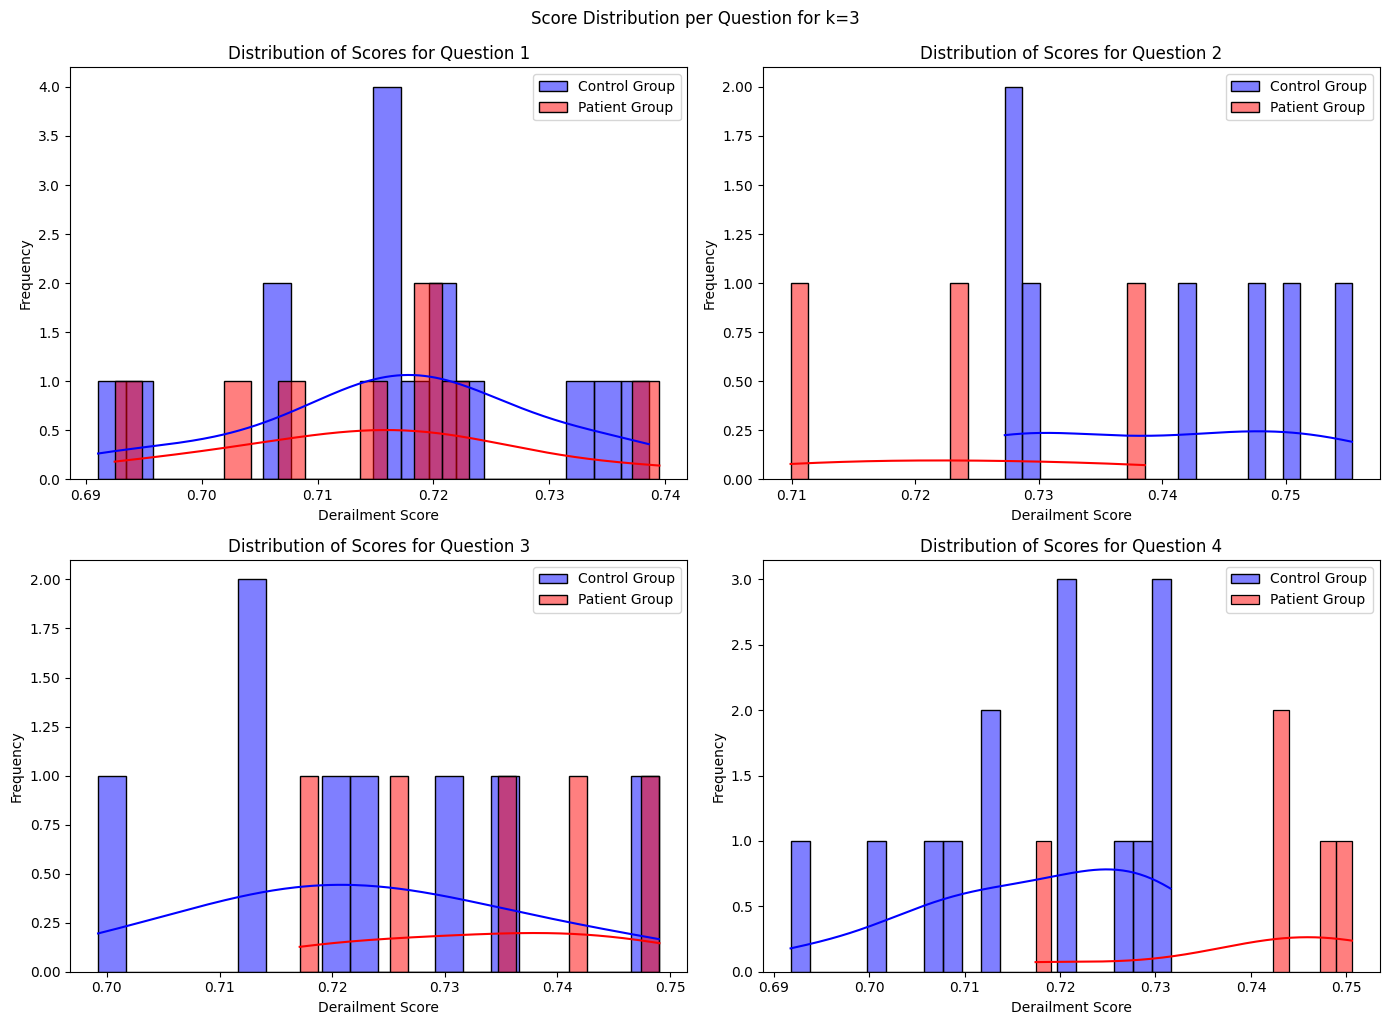

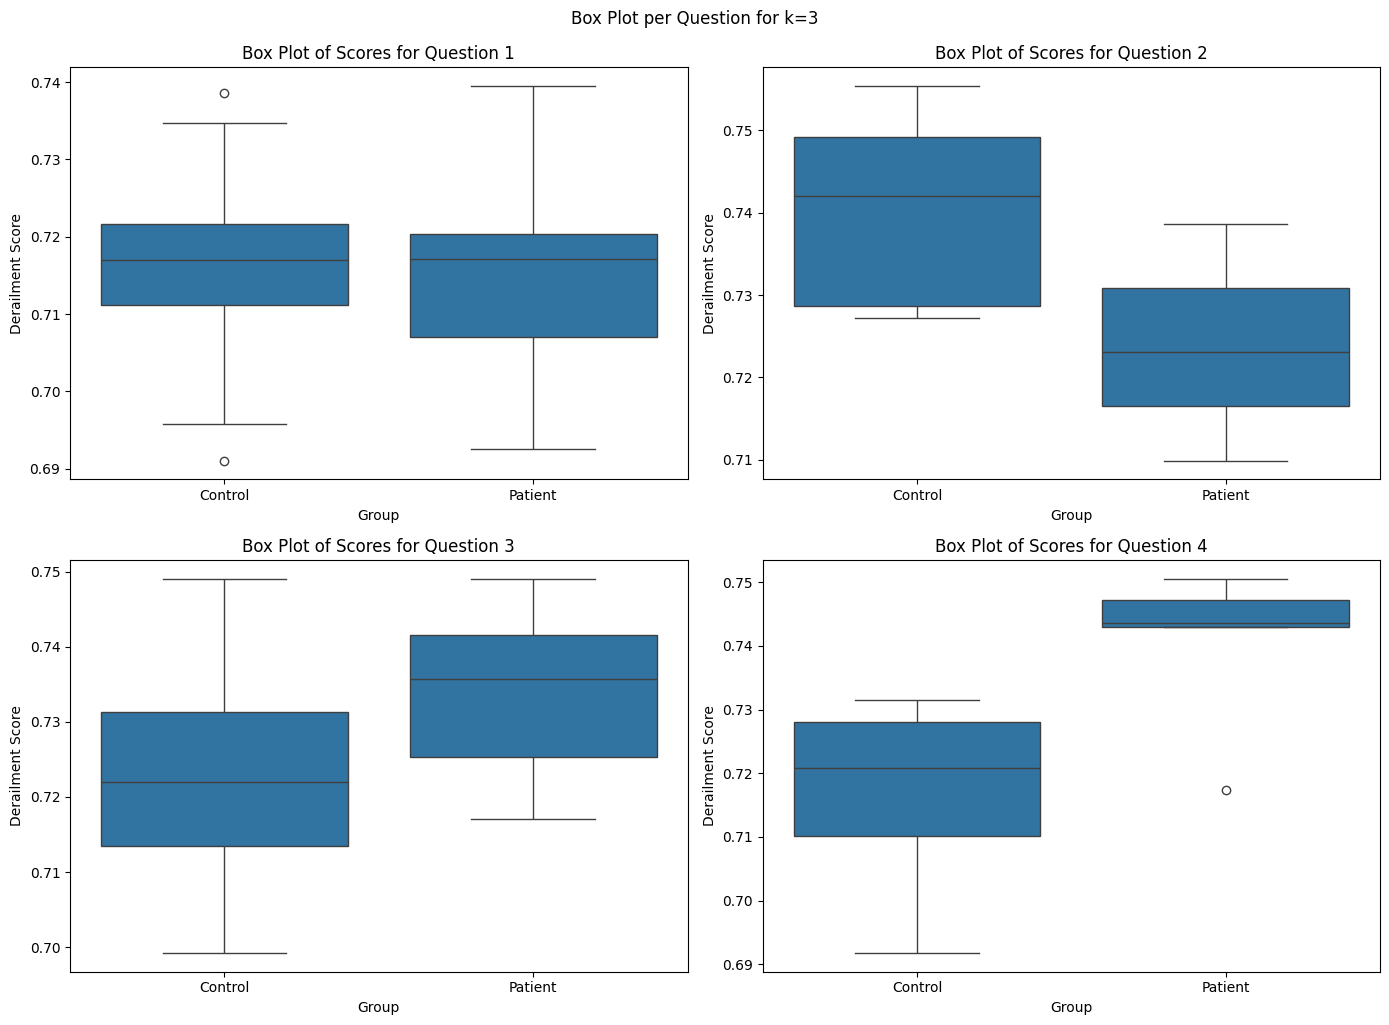

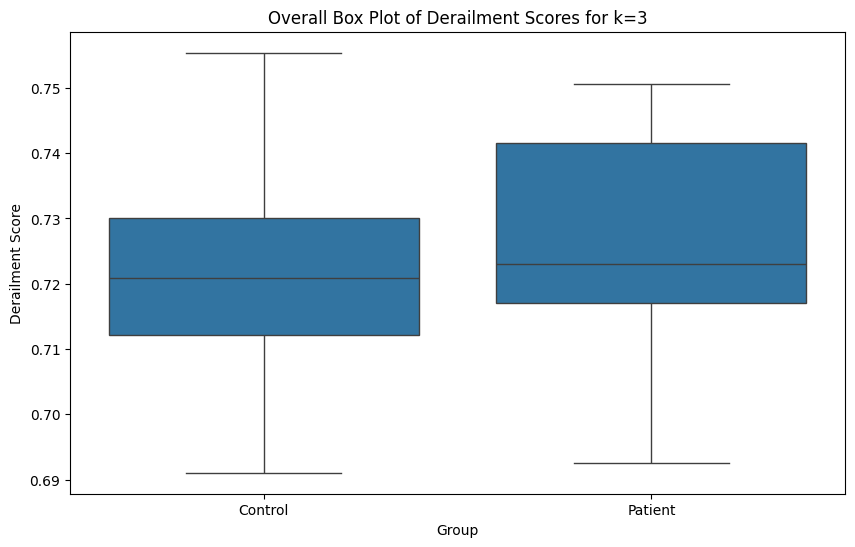

T-Test Results per Question for k=3:
Question 1: t-statistic = 0.3069329971176316, p-value = 0.3809586111236497, control mean = 0.7167969346046448, patient mean = 0.7149984836578369
Question 2: t-statistic = 1.875740319217134, p-value = 0.04877120703268865, control mean = 0.7400297522544861, patient mean = 0.7238559722900391
Question 3: t-statistic = -1.292367268870588, p-value = 0.8886406781192941, control mean = 0.723030686378479, patient mean = 0.7337522506713867
Question 4: t-statistic = -3.5346149568044534, p-value = 0.9987271977258974, control mean = 0.7174146771430969, patient mean = 0.7403625249862671

Overall T-Test Results for k=3: t-statistic = -1.1977732394469478, p-value = 0.8822538347851581, control mean = 0.72182297706604, patient mean = 0.7267680168151855

Welch's Test Results per Question for k=3:
Question 1: t-statistic = 0.3013473594491794, p-value = 0.38383928043838084
Question 2: t-statistic = 1.7178566325177889, p-value = 0.08879054649667621
Question 3: t-statisti

In [61]:
full_analysis(control_valid_answers_content_words, patient_valid_answers_content_words, tokenizer, embedding_model, k=3, sliding_window=True)

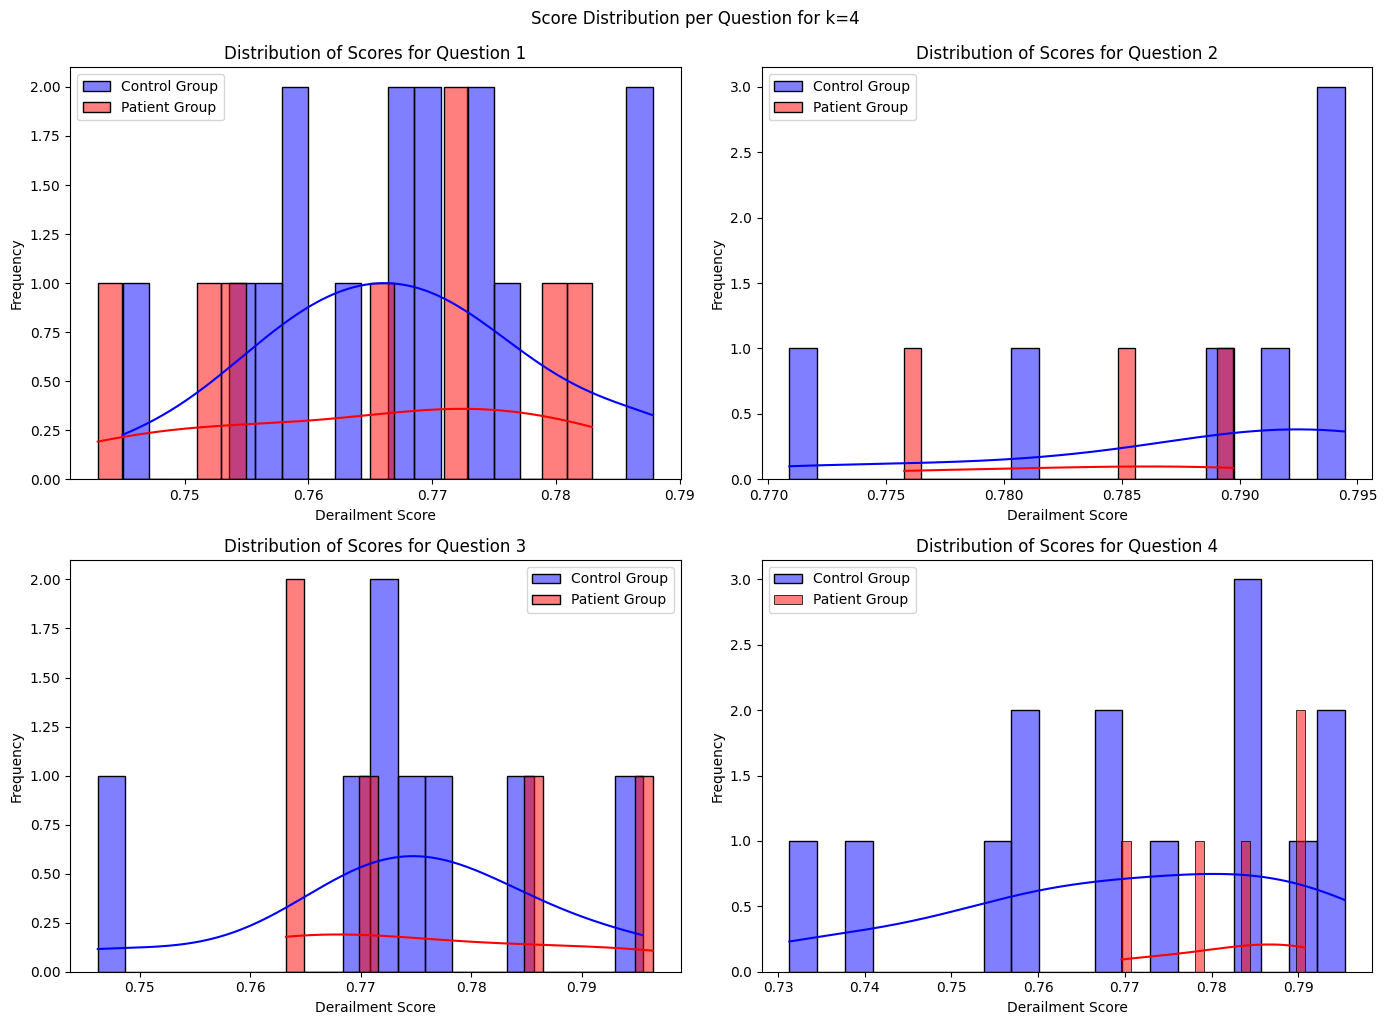

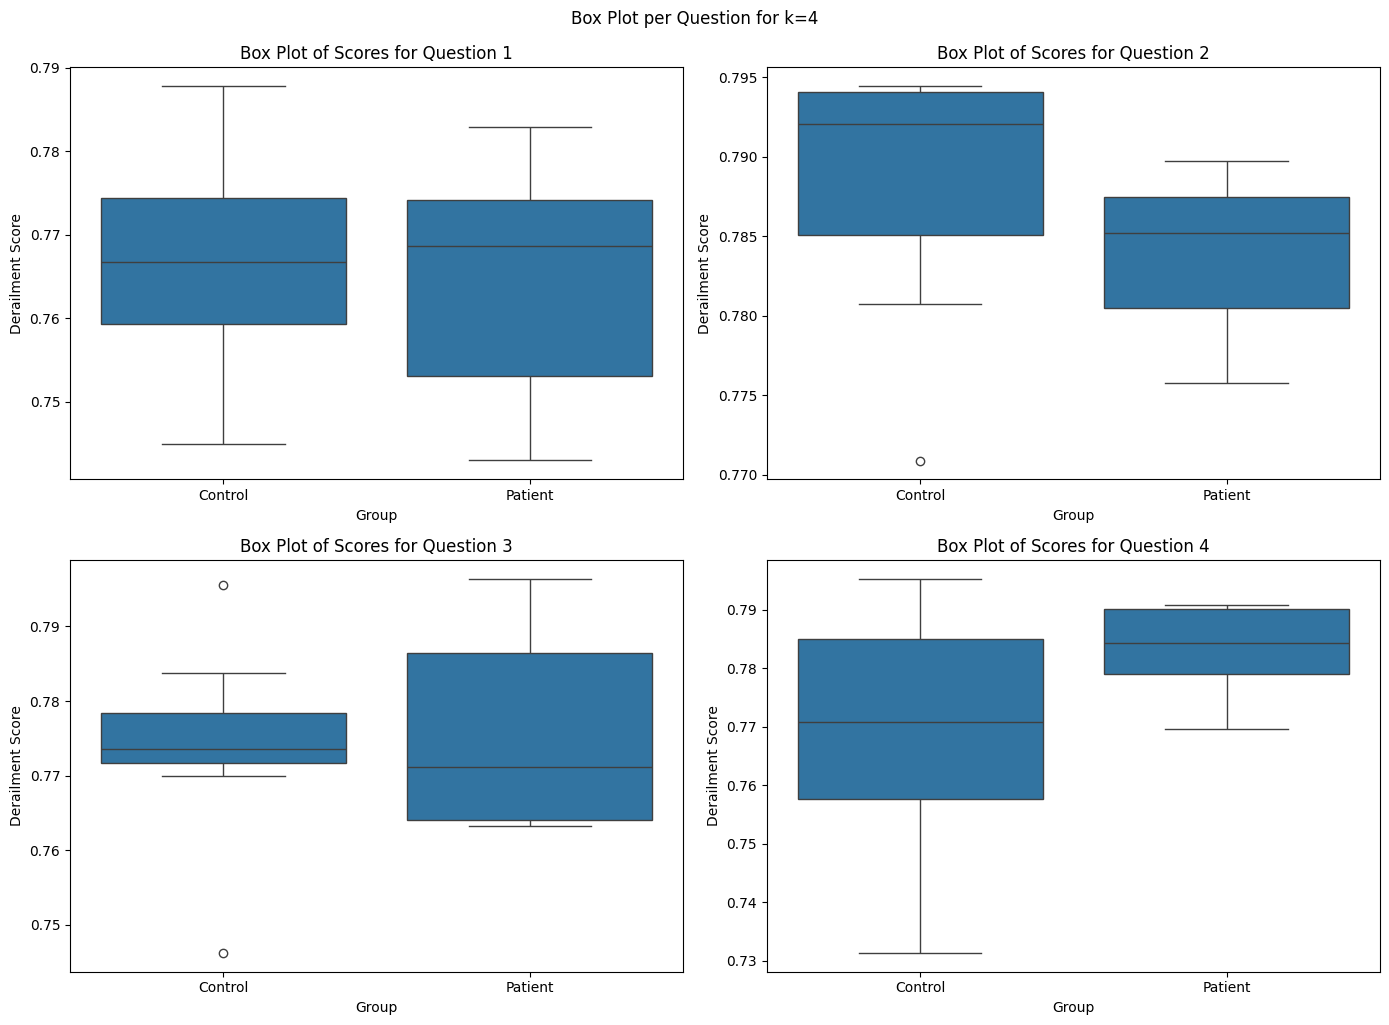

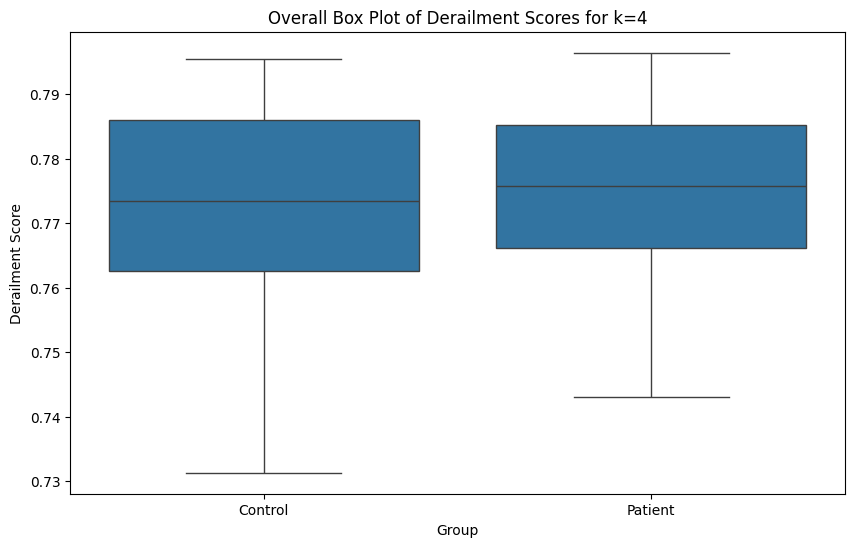

T-Test Results per Question for k=4:
Question 1: t-statistic = 0.4223728897762828, p-value = 0.33852298546968695, control mean = 0.7674070596694946, patient mean = 0.7650677561759949
Question 2: t-statistic = 0.7471664754085291, p-value = 0.23817354709815436, control mean = 0.7879494428634644, patient mean = 0.783558189868927
Question 3: t-statistic = -0.28841891270940695, p-value = 0.6108058296935788, control mean = 0.7739282846450806, patient mean = 0.77625972032547
Question 4: t-statistic = -1.3476048111587915, p-value = 0.9022638916493708, control mean = 0.7700885534286499, patient mean = 0.7827727794647217

Overall T-Test Results for k=4: t-statistic = -0.4556902209628546, p-value = 0.6749102131183424, control mean = 0.7727138996124268, patient mean = 0.7745895385742188

Welch's Test Results per Question for k=4:
Question 1: t-statistic = 0.39560957591161744, p-value = 0.34965299928660826
Question 2: t-statistic = 0.8254043169741231, p-value = 0.22383669400443096
Question 3: t-sta

In [62]:
full_analysis(control_valid_answers_content_words, patient_valid_answers_content_words, tokenizer, embedding_model, k=4, sliding_window=True)

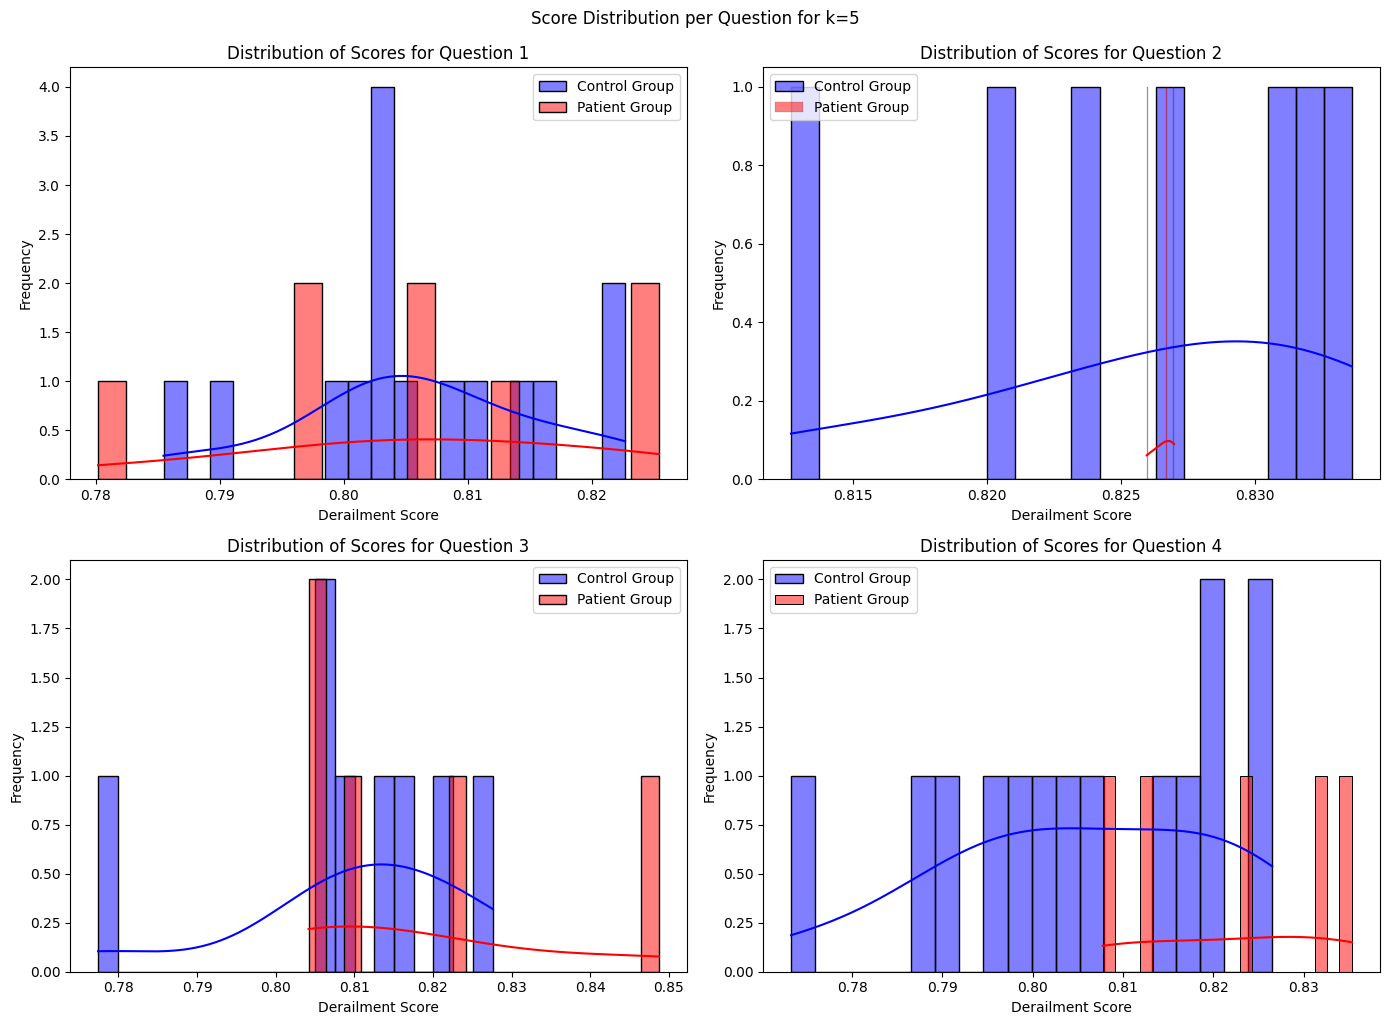

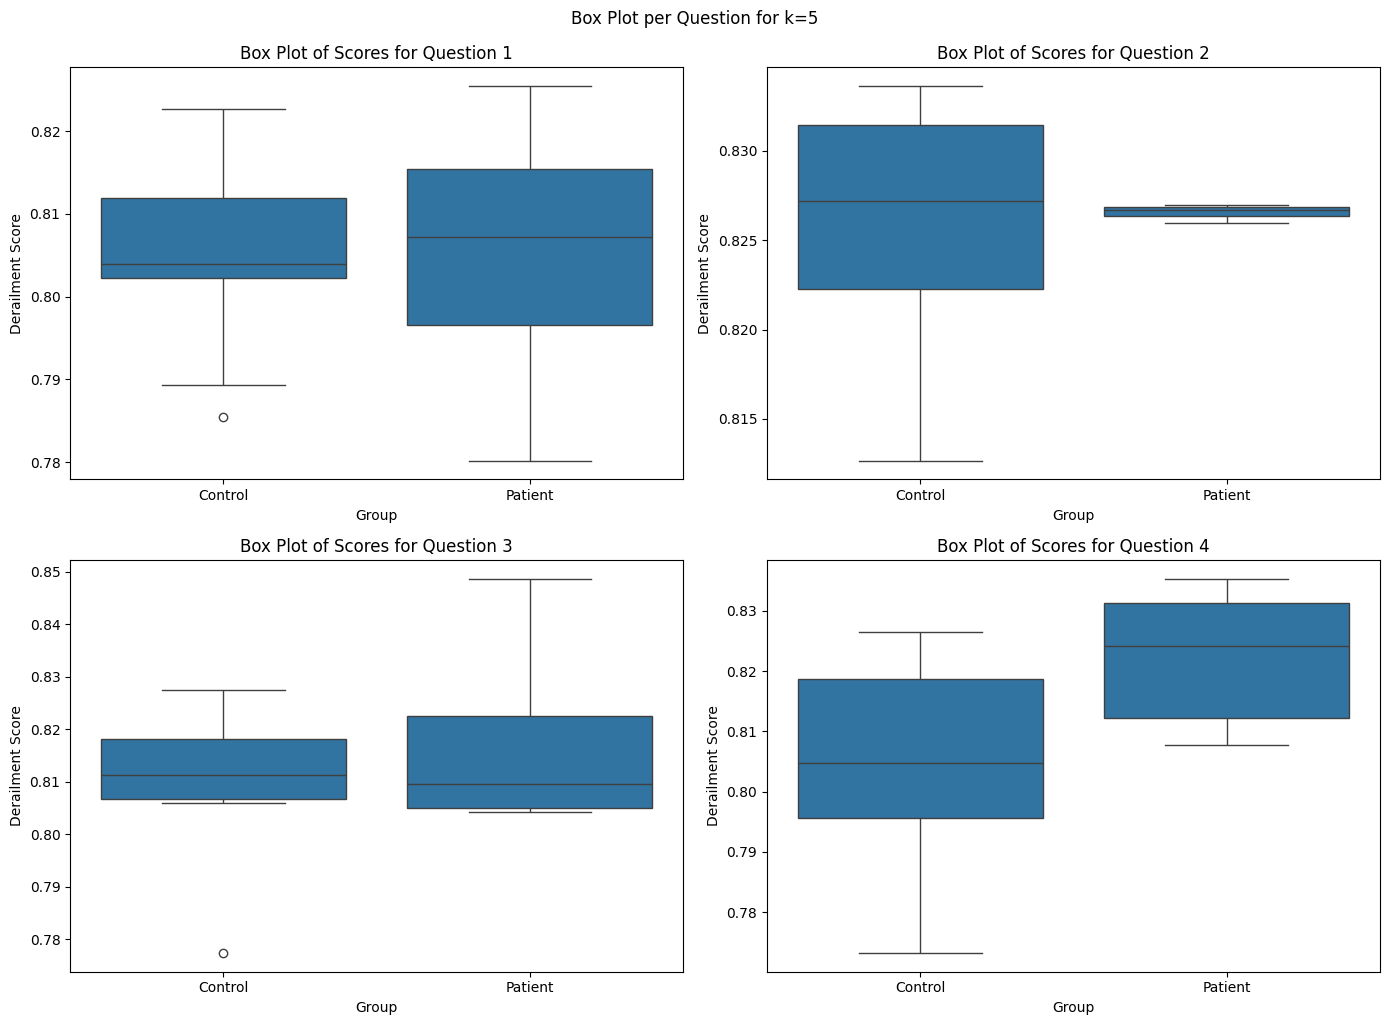

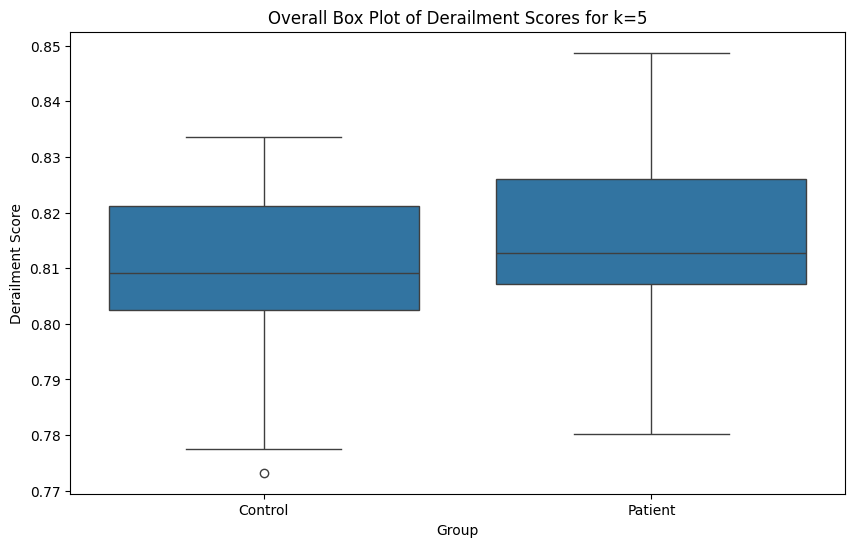

T-Test Results per Question for k=5:
Question 1: t-statistic = -0.04536386776304986, p-value = 0.5178770517559673, control mean = 0.8059061765670776, patient mean = 0.8061469197273254
Question 2: t-statistic = -0.1585829766379054, p-value = 0.5610362105266202, control mean = 0.8258438110351562, patient mean = 0.8265488147735596
Question 3: t-statistic = -0.8691863738138336, p-value = 0.7983439330999202, control mean = 0.8098857402801514, patient mean = 0.8180616497993469
Question 4: t-statistic = -2.115180246590786, p-value = 0.9752587986528191, control mean = 0.805509626865387, patient mean = 0.8221294283866882

Overall T-Test Results for k=5: t-statistic = -1.531060323245146, p-value = 0.9346196011944281, control mean = 0.809675395488739, patient mean = 0.8157036304473877

Welch's Test Results per Question for k=5:
Question 1: t-statistic = -0.04056884116326451, p-value = 0.5158076007285913
Question 2: t-statistic = -0.24948561091986687, p-value = 0.5944386441909124
Question 3: t-sta

In [63]:
full_analysis(control_valid_answers_content_words, patient_valid_answers_content_words, tokenizer, embedding_model, k=5, sliding_window=True)

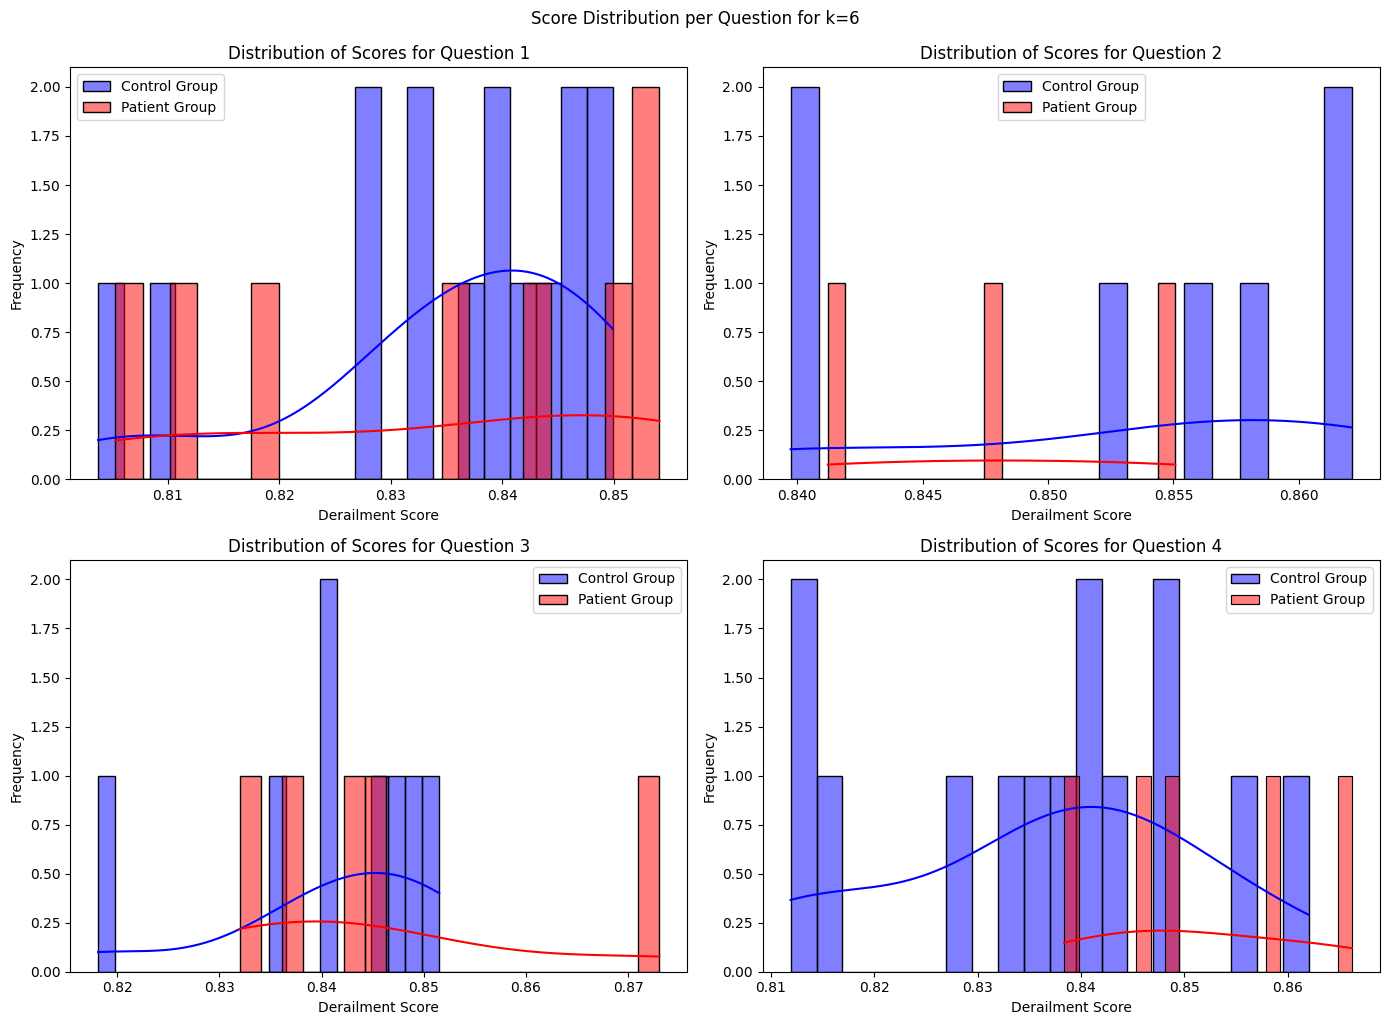

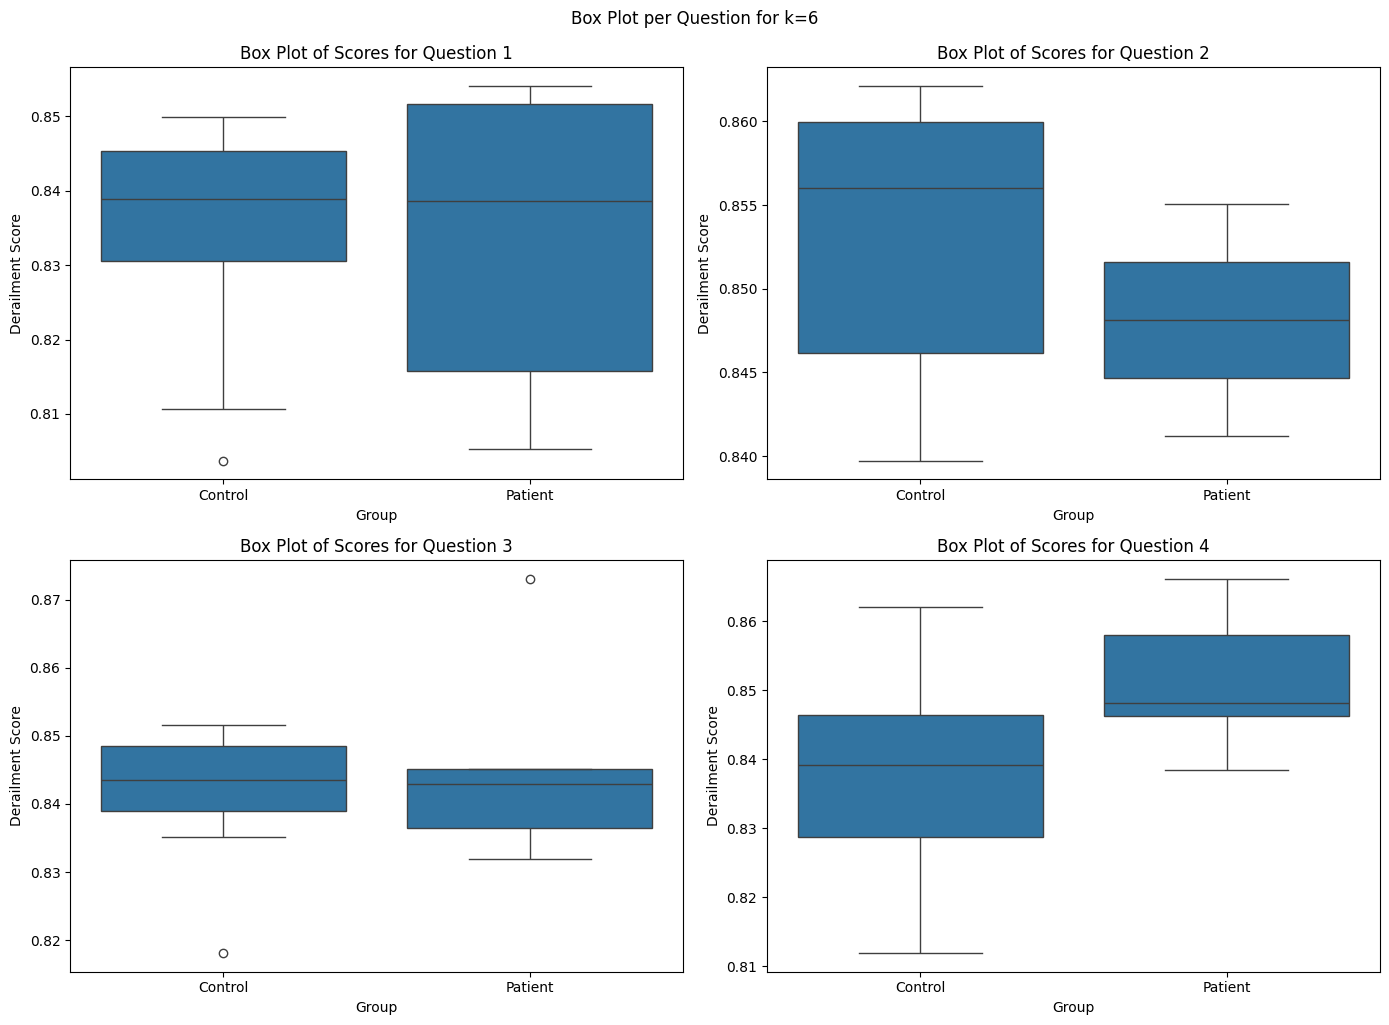

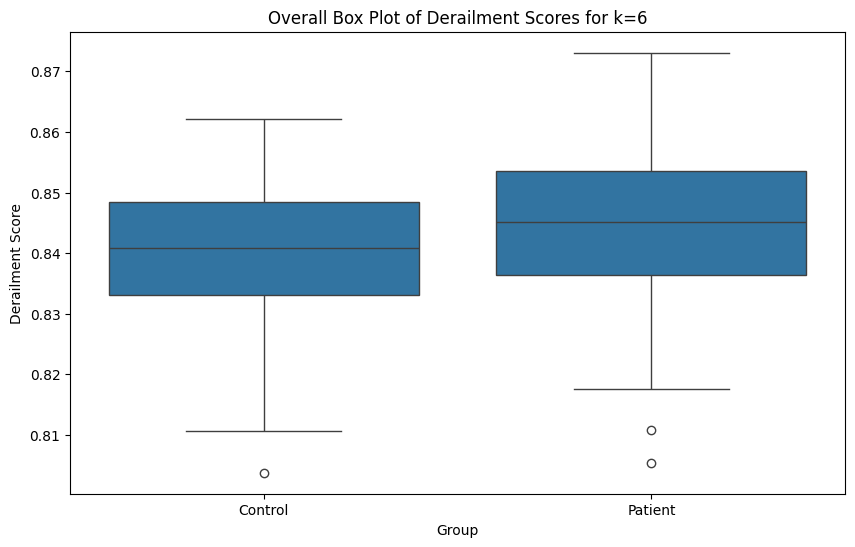

T-Test Results per Question for k=6:
Question 1: t-statistic = 0.24640393164212676, p-value = 0.4038810680686177, control mean = 0.8354004621505737, patient mean = 0.8336817026138306
Question 2: t-statistic = 0.7678648999796901, p-value = 0.23231316075506908, control mean = 0.852870762348175, patient mean = 0.8481371402740479
Question 3: t-statistic = -0.6354698036618338, p-value = 0.7309413815885386, control mean = 0.8412032127380371, patient mean = 0.8459041714668274
Question 4: t-statistic = -1.9872392788734967, p-value = 0.9683734777842508, control mean = 0.836499035358429, patient mean = 0.8514362573623657

Overall T-Test Results for k=6: t-statistic = -0.8291428189451723, p-value = 0.7949229309839011, control mean = 0.8395844101905823, patient mean = 0.8428841829299927

Welch's Test Results per Question for k=6:
Question 1: t-statistic = 0.2186044998675405, p-value = 0.4155696570322611
Question 2: t-statistic = 0.8803413652204707, p-value = 0.20817329776982574
Question 3: t-stati

In [64]:
full_analysis(control_valid_answers_content_words, patient_valid_answers_content_words, tokenizer, embedding_model, k=6, sliding_window=True)

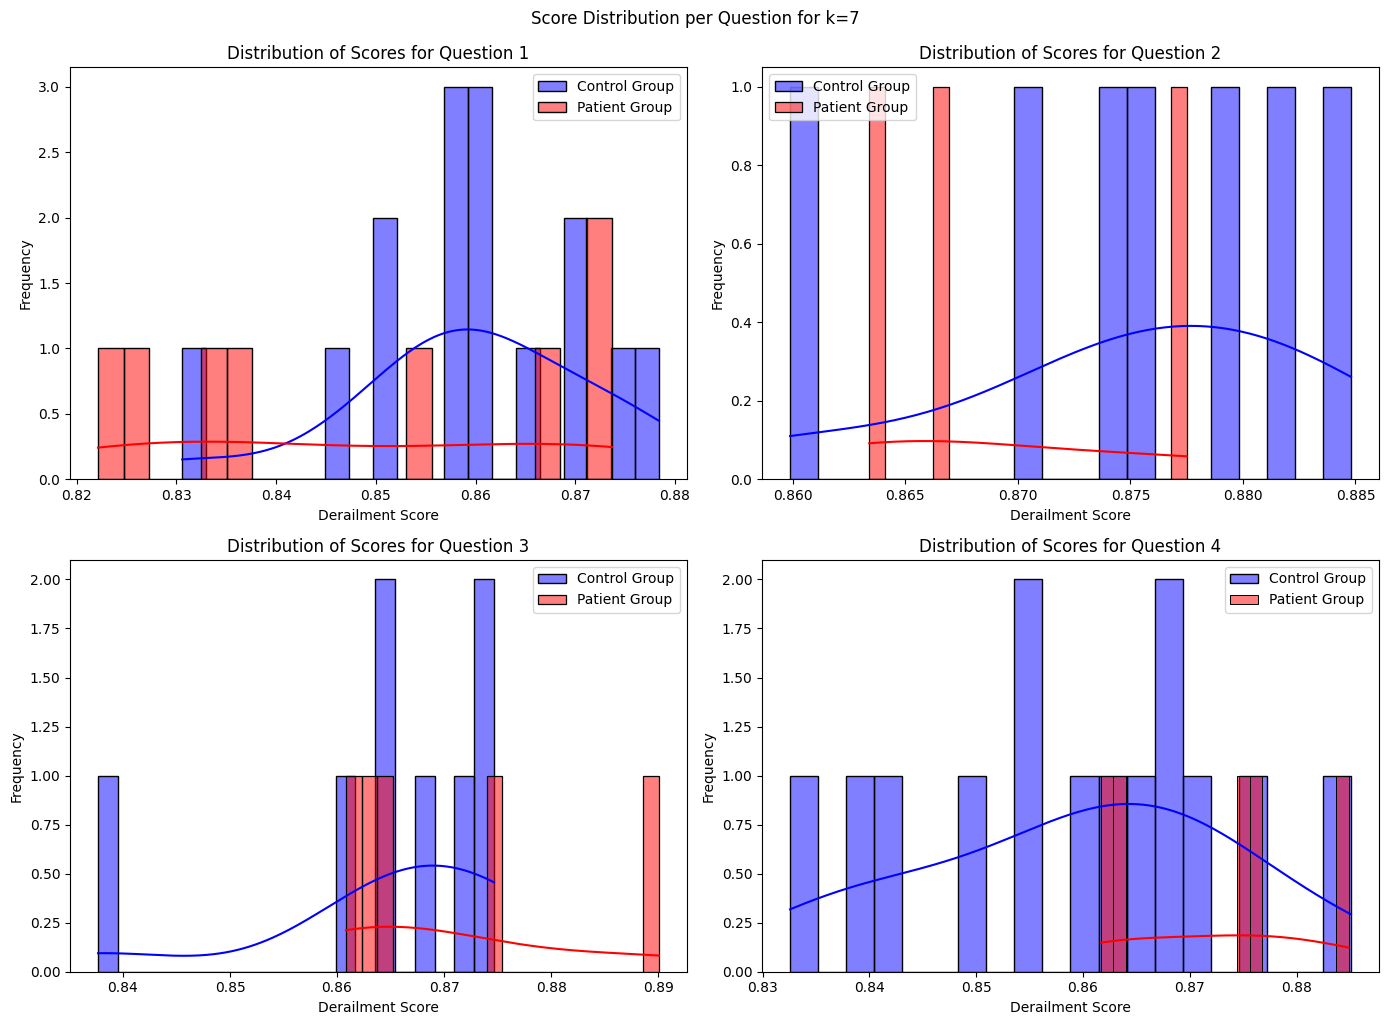

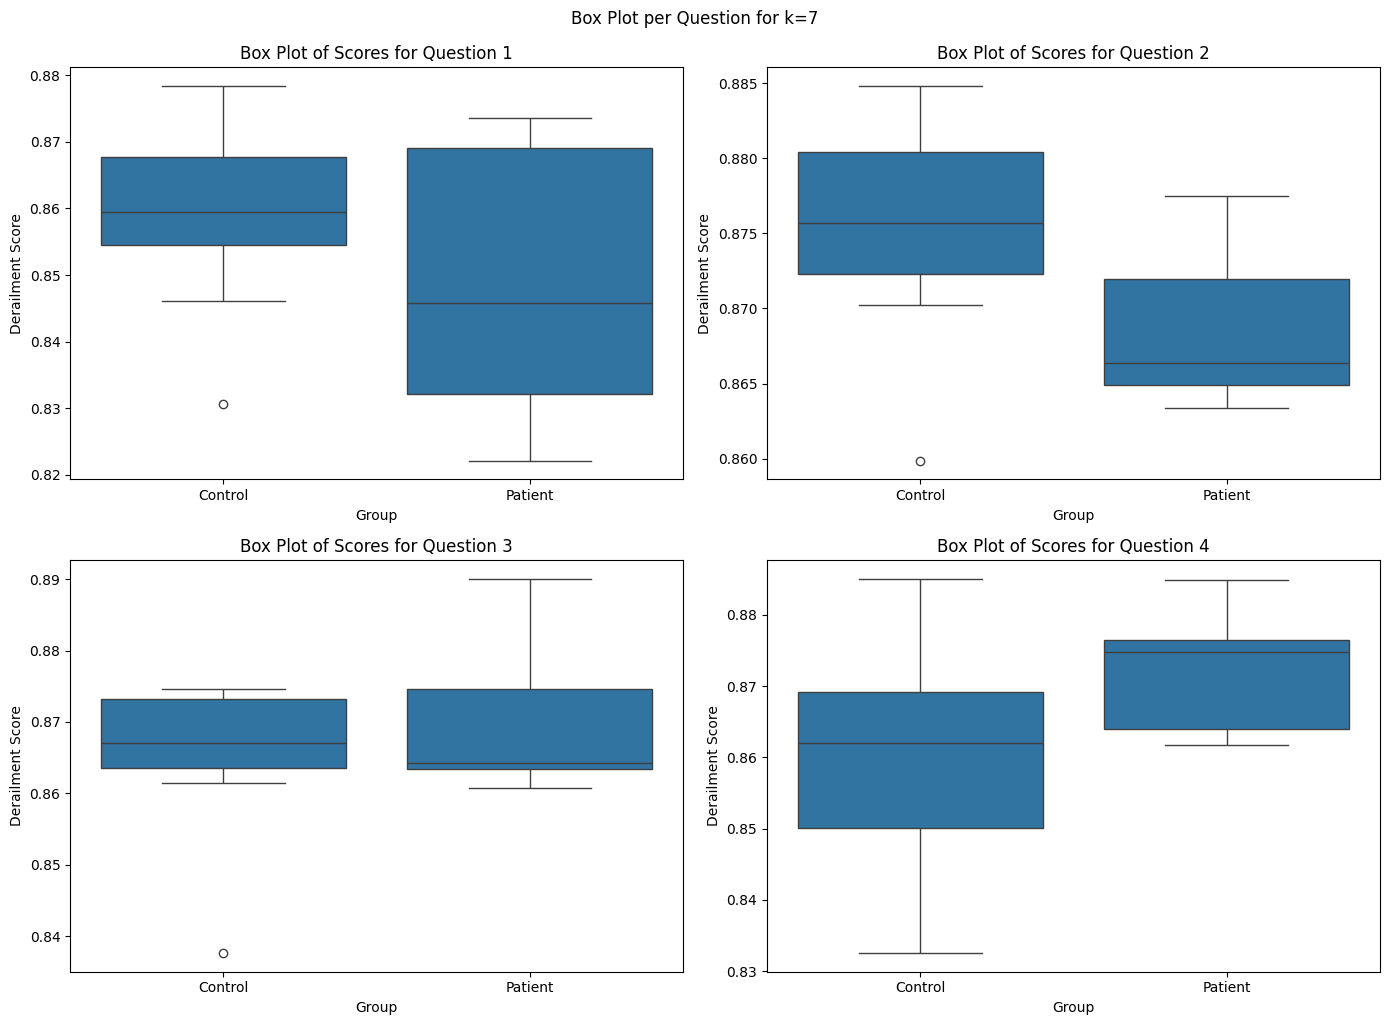

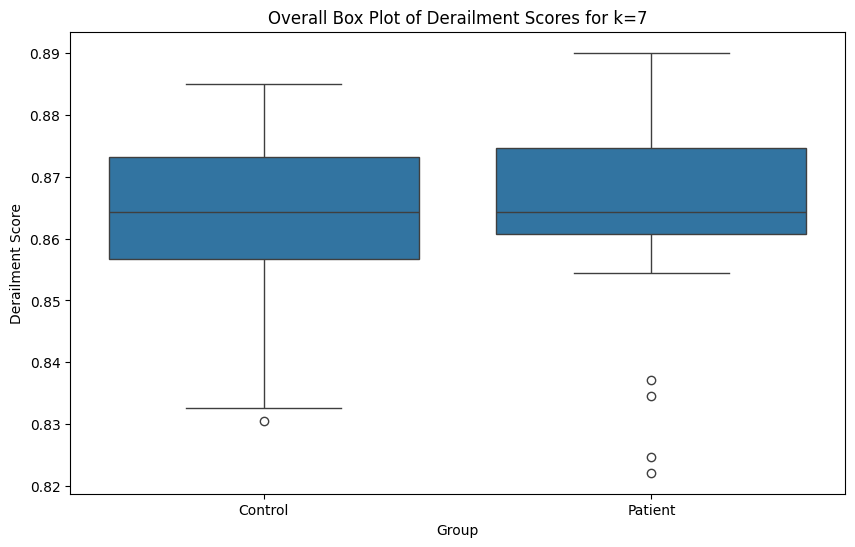

T-Test Results per Question for k=7:
Question 1: t-statistic = 1.6233810173957126, p-value = 0.05971247285021629, control mean = 0.859534502029419, patient mean = 0.8483300805091858
Question 2: t-statistic = 1.0809756229395522, p-value = 0.15560708059053235, control mean = 0.8751043081283569, patient mean = 0.8690959811210632
Question 3: t-statistic = -0.8311845740174476, p-value = 0.788227712911533, control mean = 0.8649278283119202, patient mean = 0.8706423044204712
Question 4: t-statistic = -1.784005478823427, p-value = 0.9538589587787394, control mean = 0.8593538999557495, patient mean = 0.8723691701889038

Overall T-Test Results for k=7: t-statistic = 0.1488554977368408, p-value = 0.4410715610442246, control mean = 0.8629346489906311, patient mean = 0.8623326420783997

Welch's Test Results per Question for k=7:
Question 1: t-statistic = 1.3737850396597866, p-value = 0.1005958624695882
Question 2: t-statistic = 1.1323895856246184, p-value = 0.1585016762650823
Question 3: t-statisti

In [65]:
full_analysis(control_valid_answers_content_words, patient_valid_answers_content_words, tokenizer, embedding_model, k=7, sliding_window=True)

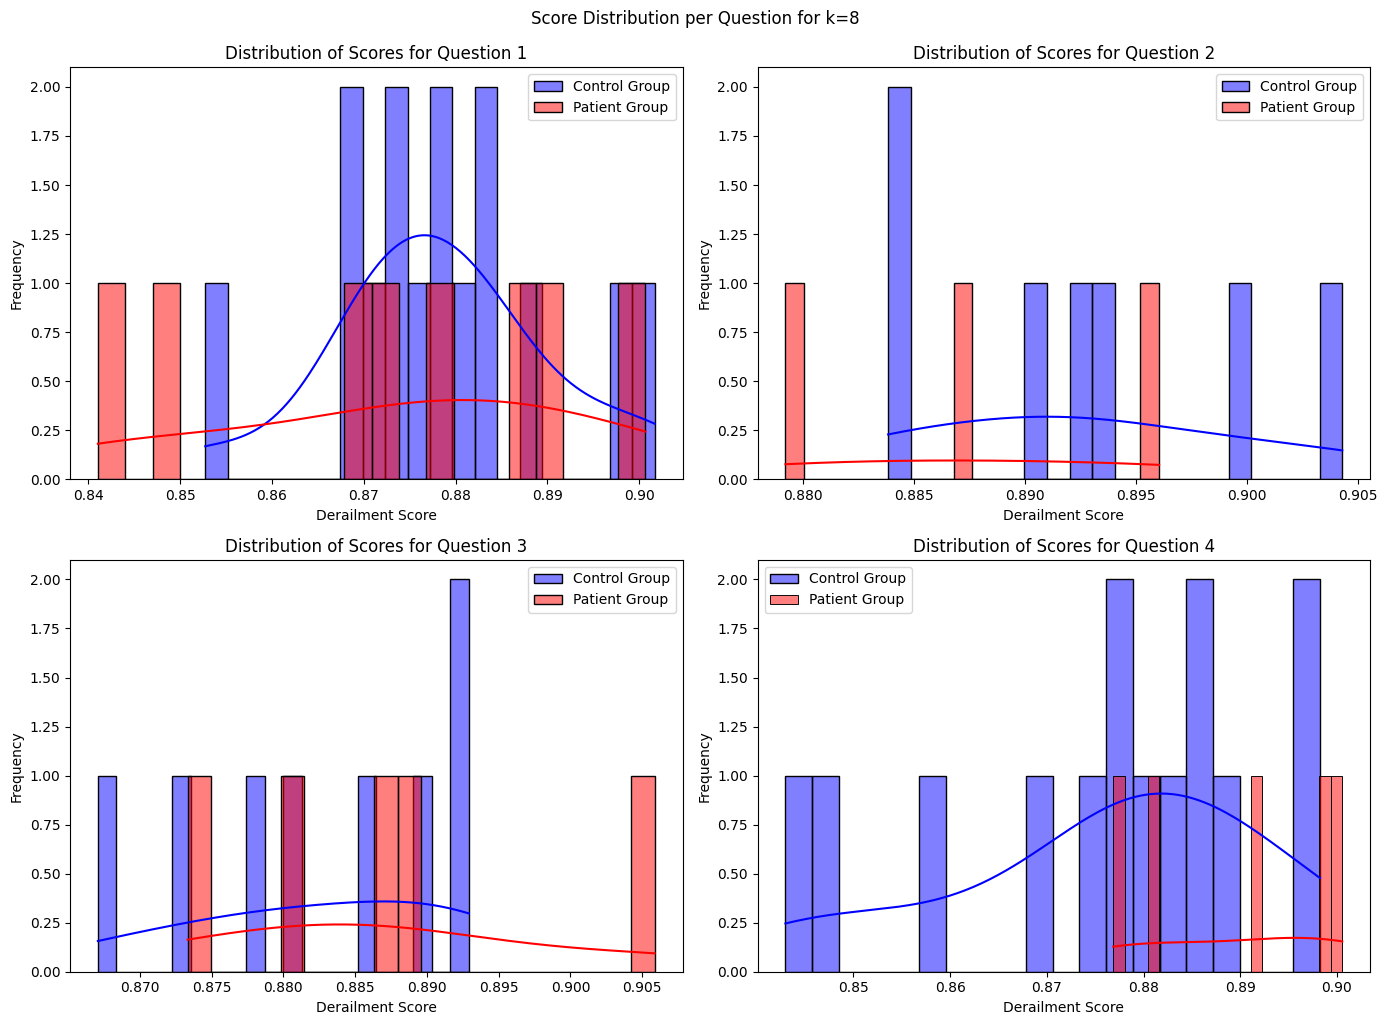

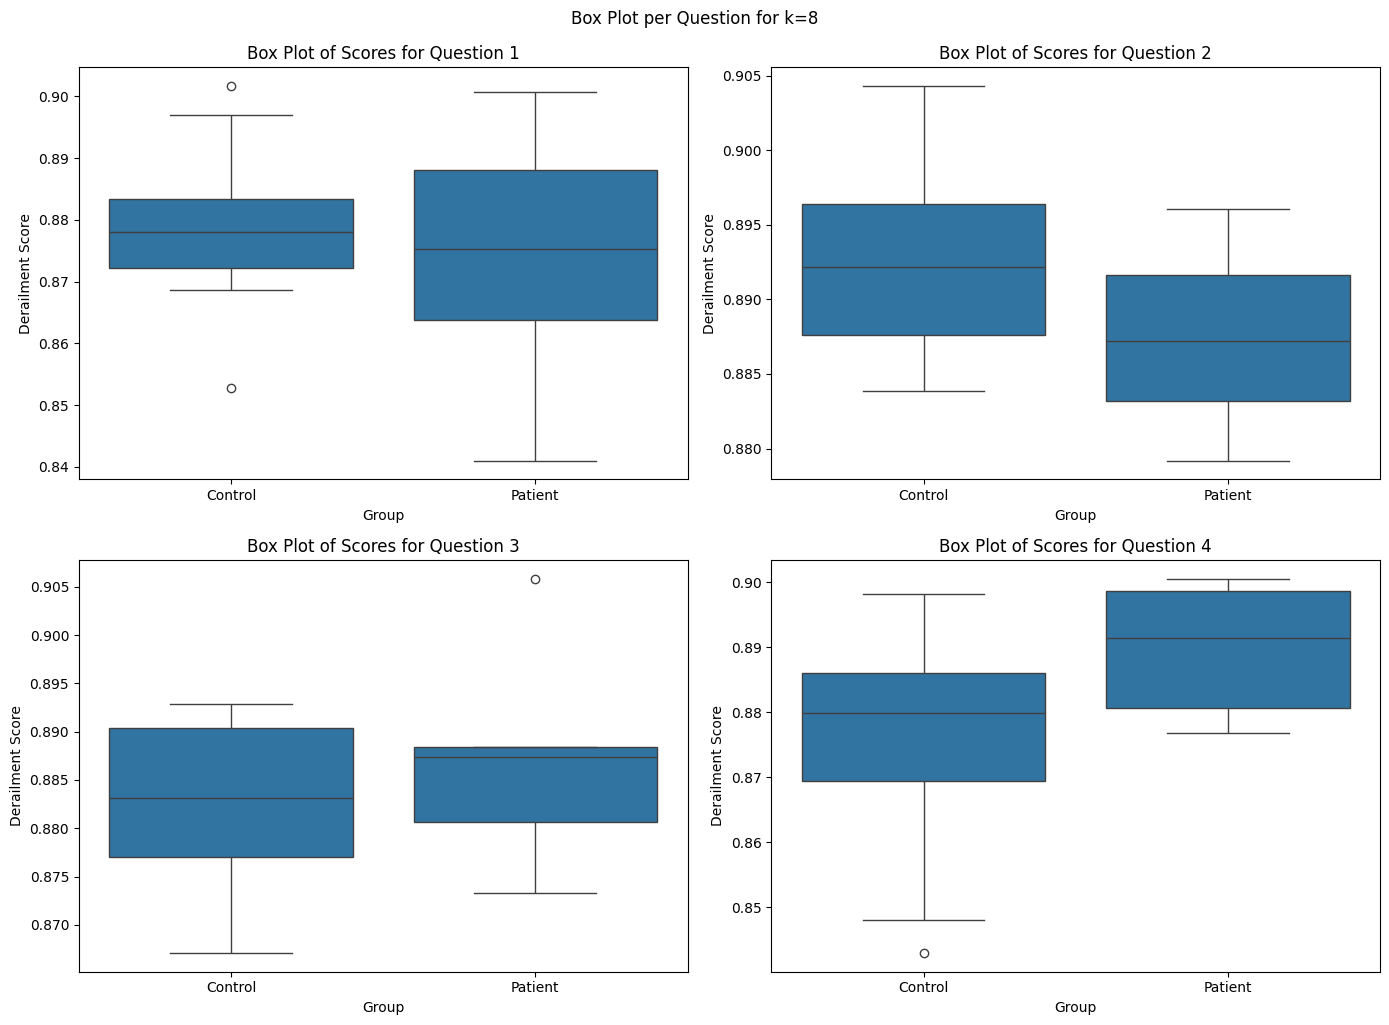

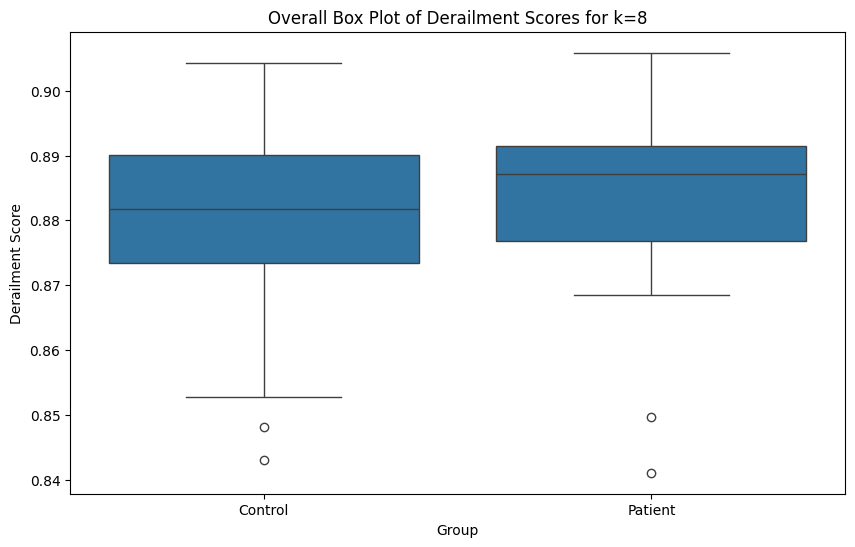

T-Test Results per Question for k=8:
Question 1: t-statistic = 0.747640139180425, p-value = 0.23148389559706217, control mean = 0.8783554434776306, patient mean = 0.8733816146850586
Question 2: t-statistic = 0.96007629073156, p-value = 0.18256557441631244, control mean = 0.8925971984863281, patient mean = 0.8874899744987488
Question 3: t-statistic = -0.7894939828632042, p-value = 0.7767462285810431, control mean = 0.882466733455658, patient mean = 0.8871418833732605
Question 4: t-statistic = -1.669074673242047, p-value = 0.9432935280003103, control mean = 0.876167356967926, patient mean = 0.8896394968032837

Overall T-Test Results for k=8: t-statistic = -0.4897245469728011, p-value = 0.6869850871383498, control mean = 0.8806726336479187, patient mean = 0.882544219493866

Welch's Test Results per Question for k=8:
Question 1: t-statistic = 0.6388809144137085, p-value = 0.2688768109121904
Question 2: t-statistic = 0.9084986852342959, p-value = 0.21137181667803343
Question 3: t-statistic 

In [66]:
full_analysis(control_valid_answers_content_words, patient_valid_answers_content_words, tokenizer, embedding_model, k=8, sliding_window=True)

In [69]:
control_valid_answers_content_words_without_PROPN = get_content_words_answers_without_PROPN(control_valid_answers)
patient_valid_answers_content_words_without_PROPN = get_content_words_answers_without_PROPN(patient_valid_answers)

2024-08-07 23:31:04 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-08-07 23:31:27 INFO: Loading these models for language: he (Hebrew):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

2024-08-07 23:31:27 INFO: Using device: cuda
2024-08-07 23:31:27 INFO: Loading: tokenize
C:\Users\elira\PycharmProjects\NLP_Final_Project\venv\PycharmProjects\lib\site-packages\stanza\models\tokenization\trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See h

**Analysis of answers after extracting only words tagged as content words without considering PROPN tagged words as content words (vanilla metric):**

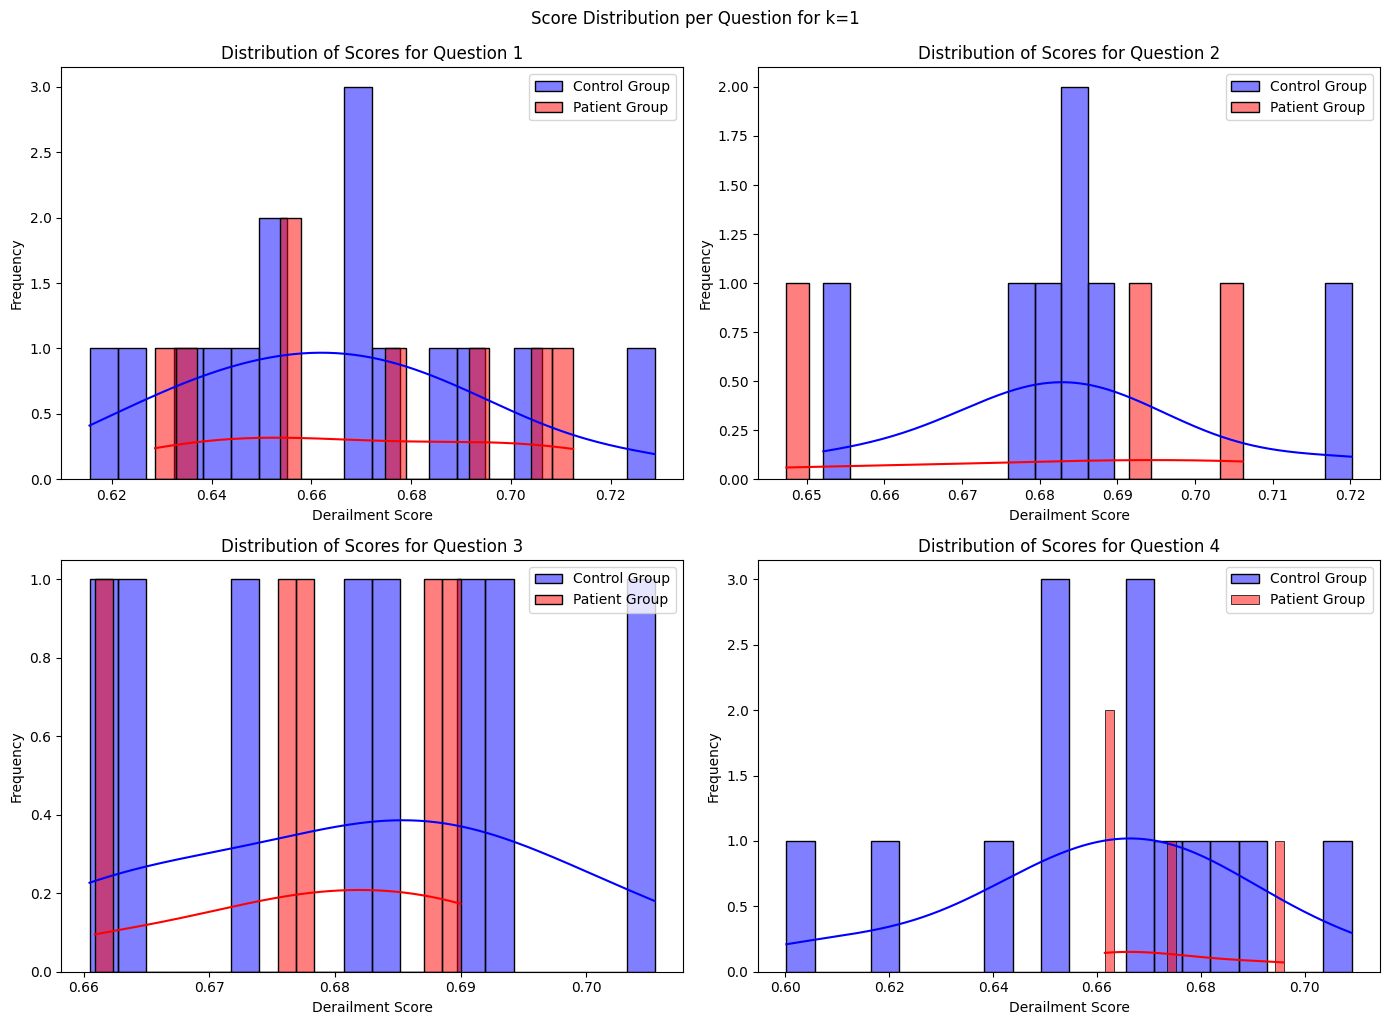

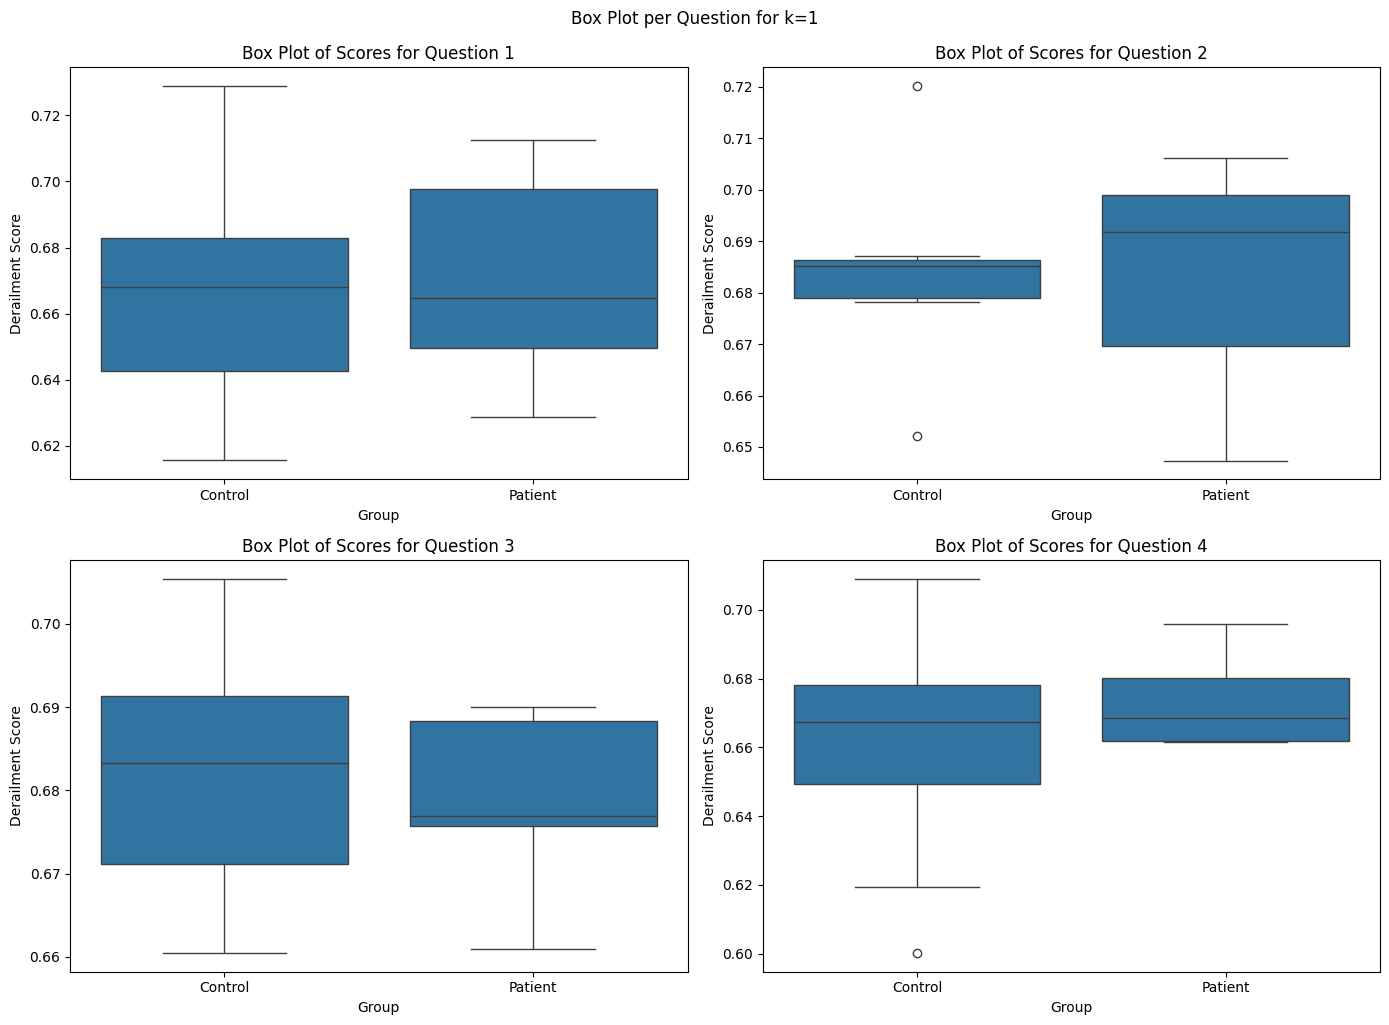

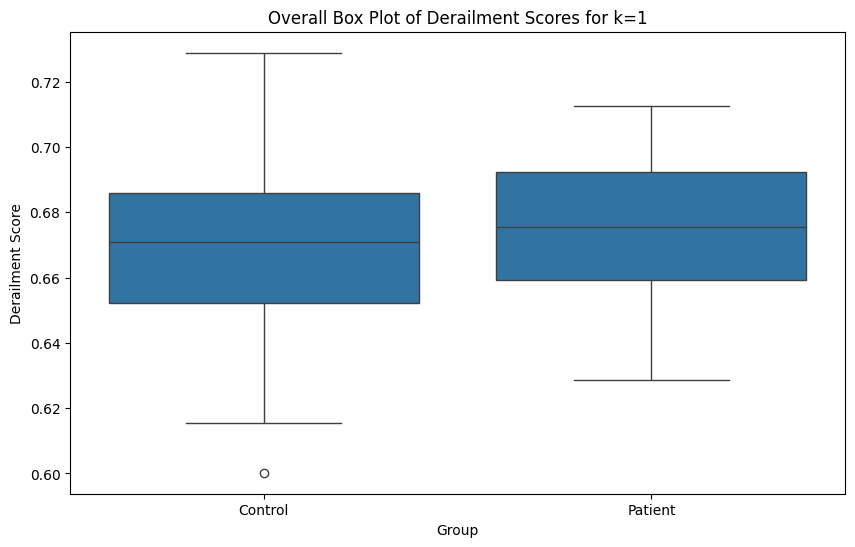

T-Test Results per Question for k=1:
Question 1: t-statistic = -0.4375327756874639, p-value = 0.6669040810900382, control mean = 0.6642917990684509, patient mean = 0.6702190637588501
Question 2: t-statistic = 0.14180350897163935, p-value = 0.4453706129211054, control mean = 0.6839971542358398, patient mean = 0.6817376613616943
Question 3: t-statistic = 0.41568696395343535, p-value = 0.3428164072330212, control mean = 0.6817143559455872, patient mean = 0.678370475769043
Question 4: t-statistic = -0.872062395231085, p-value = 0.8019637655808303, control mean = 0.6604822278022766, patient mean = 0.6736094355583191

Overall T-Test Results for k=1: t-statistic = -0.7484598152405982, p-value = 0.7714935902266223, control mean = 0.6693822741508484, patient mean = 0.6746627688407898

Welch's Test Results per Question for k=1:
Question 1: t-statistic = -0.43114218128892384, p-value = 0.6634950170189697
Question 2: t-statistic = 0.11755176133805809, p-value = 0.45721852197734203
Question 3: t-st

In [72]:
full_analysis(control_valid_answers_content_words, patient_valid_answers_content_words_without_PROPN, tokenizer, embedding_model, k=1, sliding_window=False)

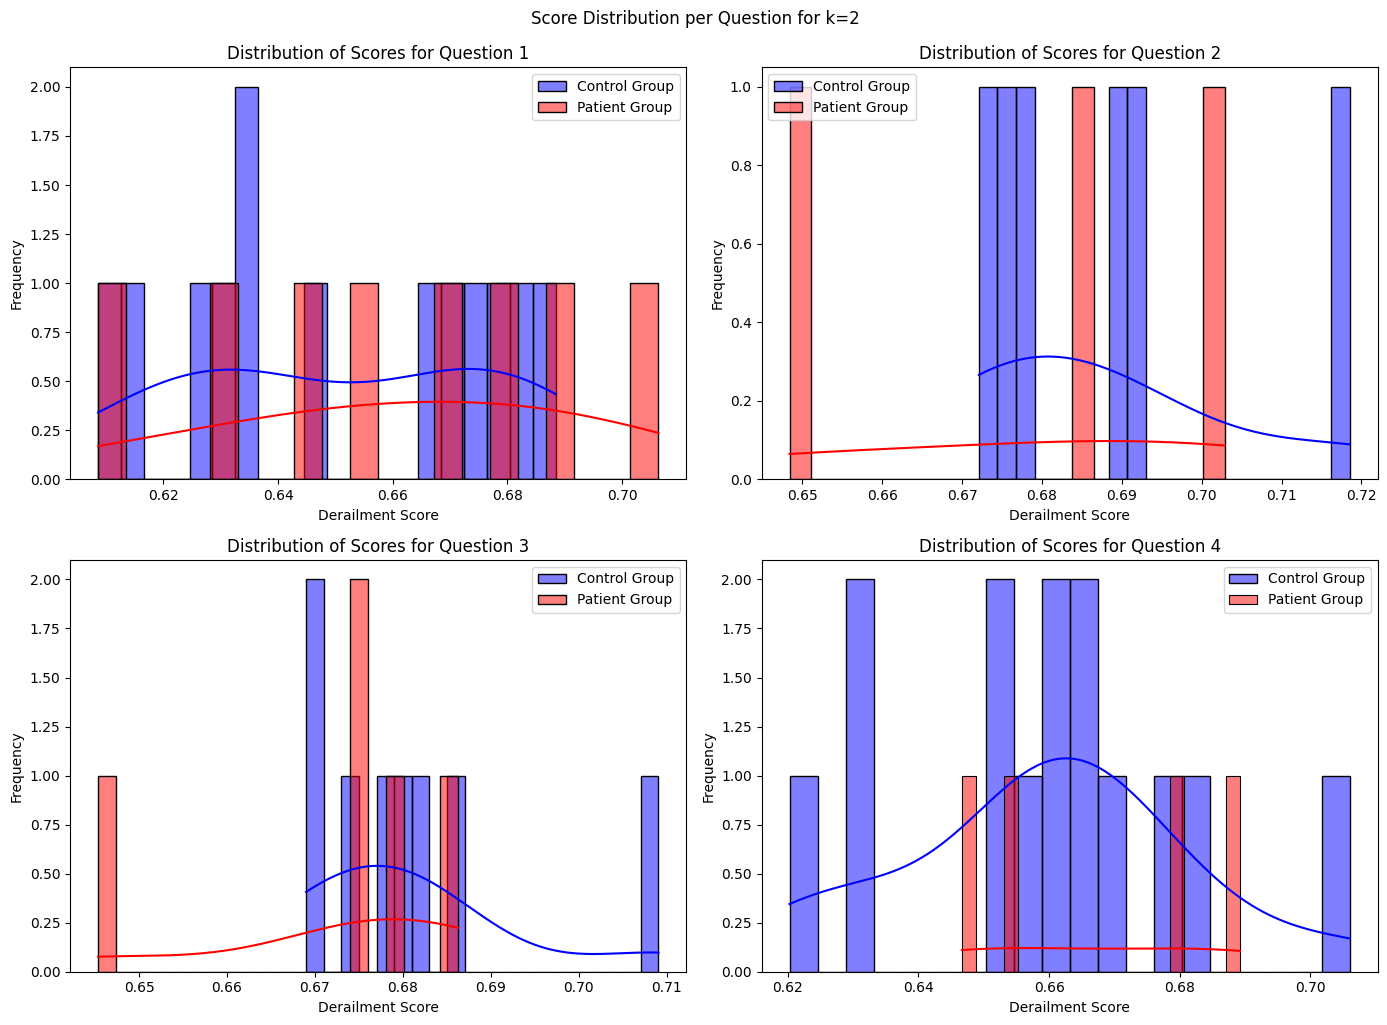

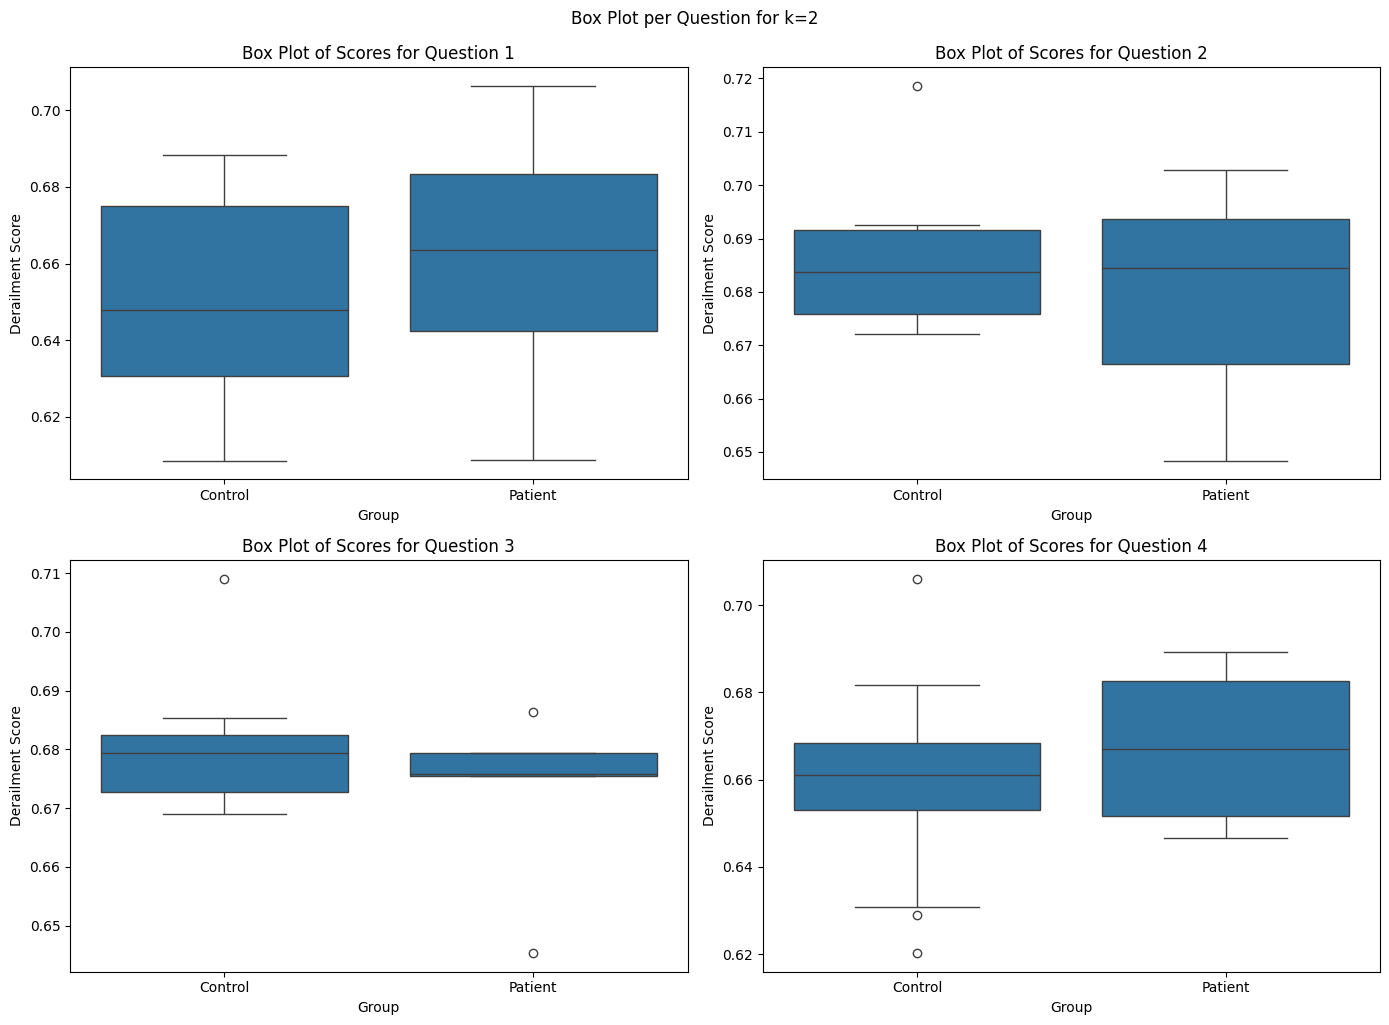

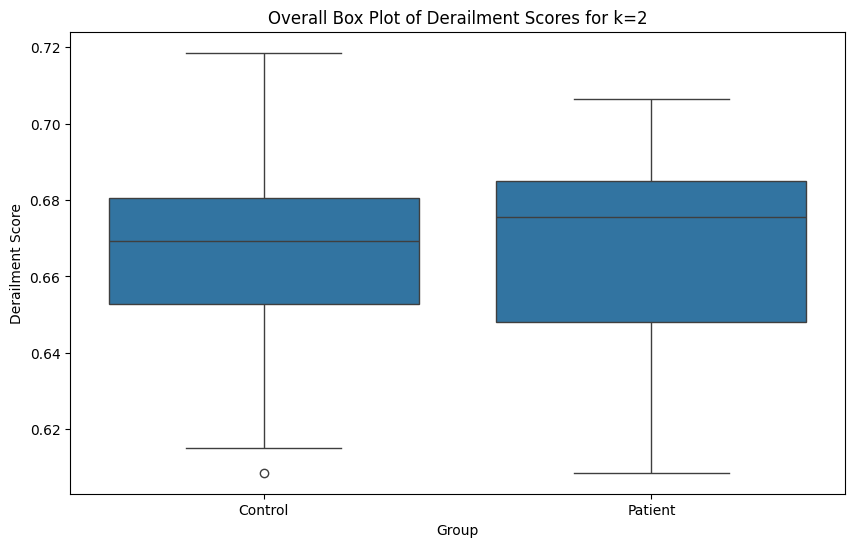

T-Test Results per Question for k=2:
Question 1: t-statistic = -0.8268753892988072, p-value = 0.790714200999991, control mean = 0.6506839394569397, patient mean = 0.6615359783172607
Question 2: t-statistic = 0.6162525680469081, p-value = 0.27861419372998075, control mean = 0.6876257061958313, patient mean = 0.6785943508148193
Question 3: t-statistic = 1.0649117780683954, p-value = 0.15486657559927308, control mean = 0.6809242367744446, patient mean = 0.6724821925163269
Question 4: t-statistic = -0.6530110773103407, p-value = 0.7384887795001499, control mean = 0.6592966914176941, patient mean = 0.6674473285675049

Overall T-Test Results for k=2: t-statistic = -0.4447341796480359, p-value = 0.6709304389215011, control mean = 0.66493159532547, patient mean = 0.6680135726928711

Welch's Test Results per Question for k=2:
Question 1: t-statistic = -0.7942972266047763, p-value = 0.7794180950082392
Question 2: t-statistic = 0.517093386531111, p-value = 0.3215816720475897
Question 3: t-statist

In [73]:
full_analysis(control_valid_answers_content_words_without_PROPN, patient_valid_answers_content_words_without_PROPN, tokenizer, embedding_model, k=2, sliding_window=False)

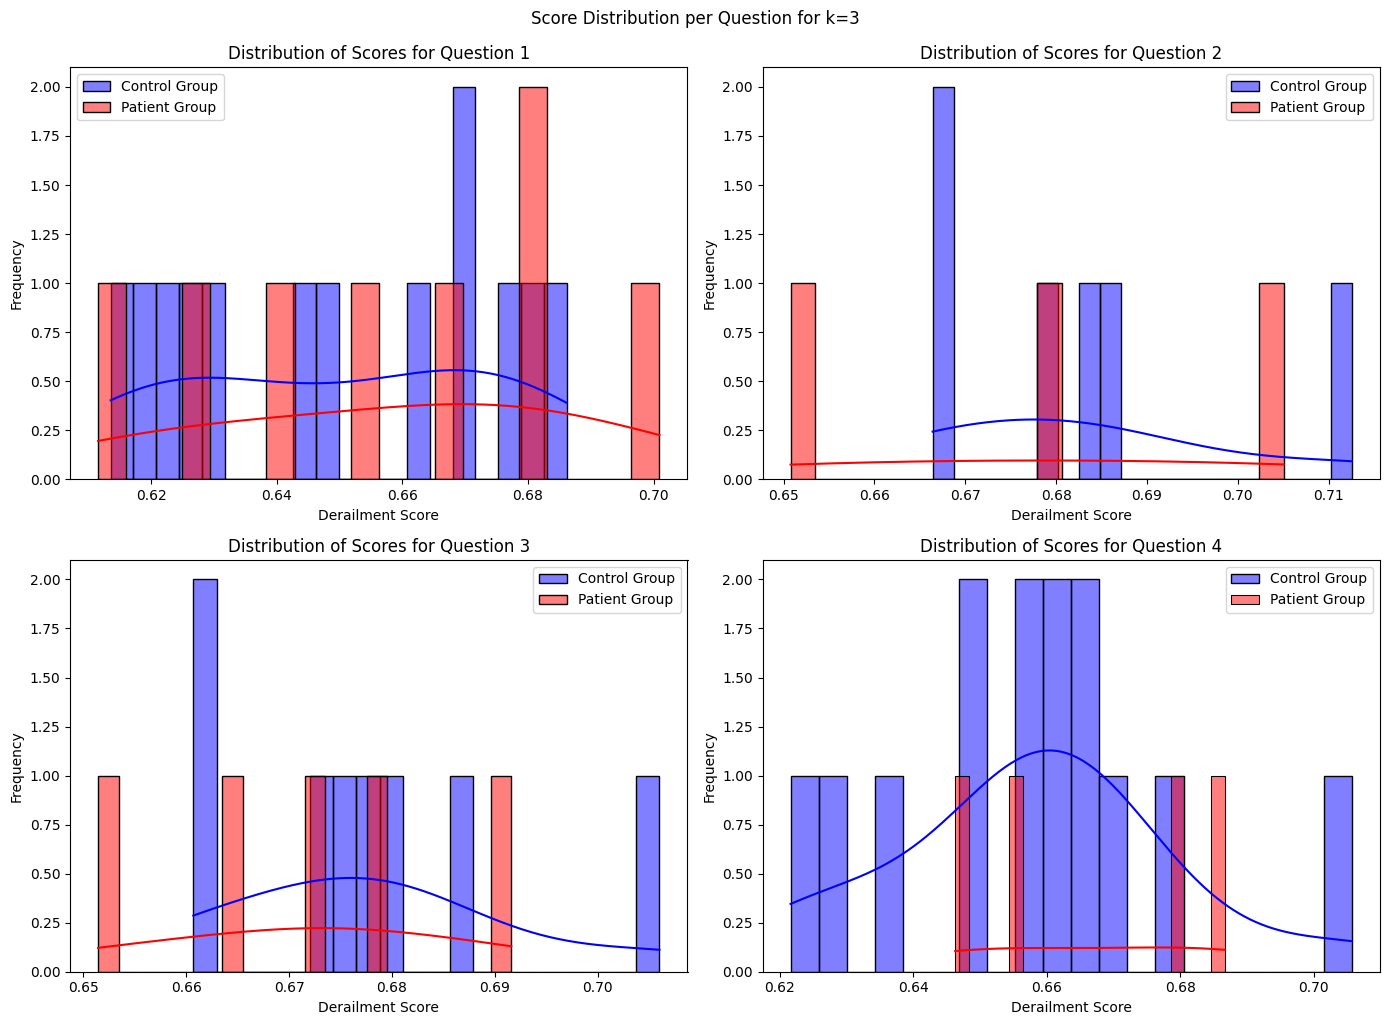

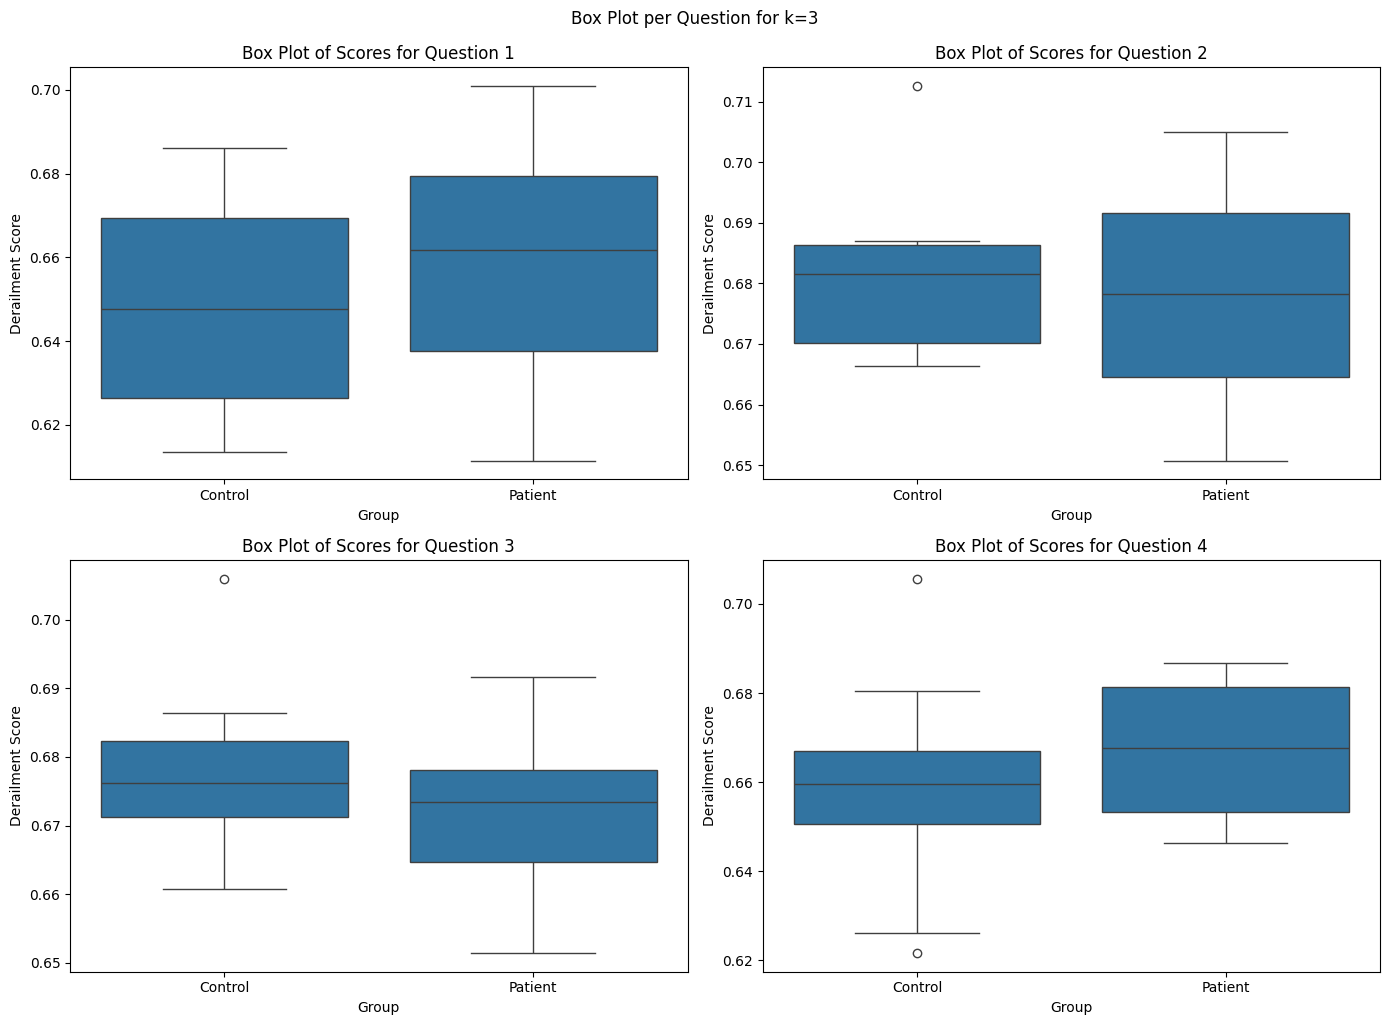

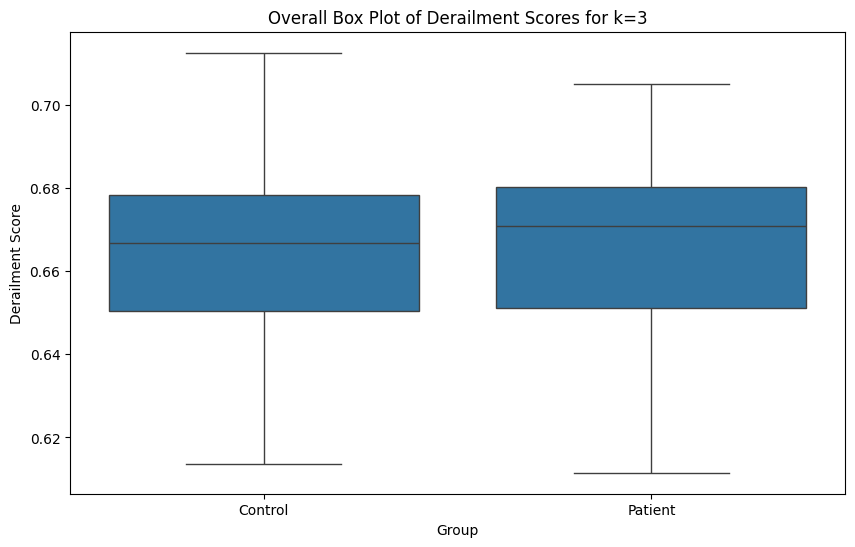

T-Test Results per Question for k=3:
Question 1: t-statistic = -0.6977096370490166, p-value = 0.7530953118241797, control mean = 0.649556577205658, patient mean = 0.658115565776825
Question 2: t-statistic = 0.32922864711386474, p-value = 0.375807205497847, control mean = 0.6827660202980042, patient mean = 0.6780239939689636
Question 3: t-statistic = 0.7301539800142602, p-value = 0.24027872355960678, control mean = 0.6779323816299438, patient mean = 0.6718741059303284
Question 4: t-statistic = -0.7588956985875246, p-value = 0.7705251560296248, control mean = 0.6580133438110352, patient mean = 0.6670558452606201

Overall T-Test Results for k=3: t-statistic = -0.5297638307963853, p-value = 0.7008681699657953, control mean = 0.6628409624099731, patient mean = 0.6663295030593872

Welch's Test Results per Question for k=3:
Question 1: t-statistic = -0.6692218381254931, p-value = 0.742488177831357
Question 2: t-statistic = 0.2768535982801476, p-value = 0.4005006062852049
Question 3: t-statist

In [74]:
full_analysis(control_valid_answers_content_words_without_PROPN, patient_valid_answers_content_words_without_PROPN, tokenizer, embedding_model, k=3, sliding_window=False)

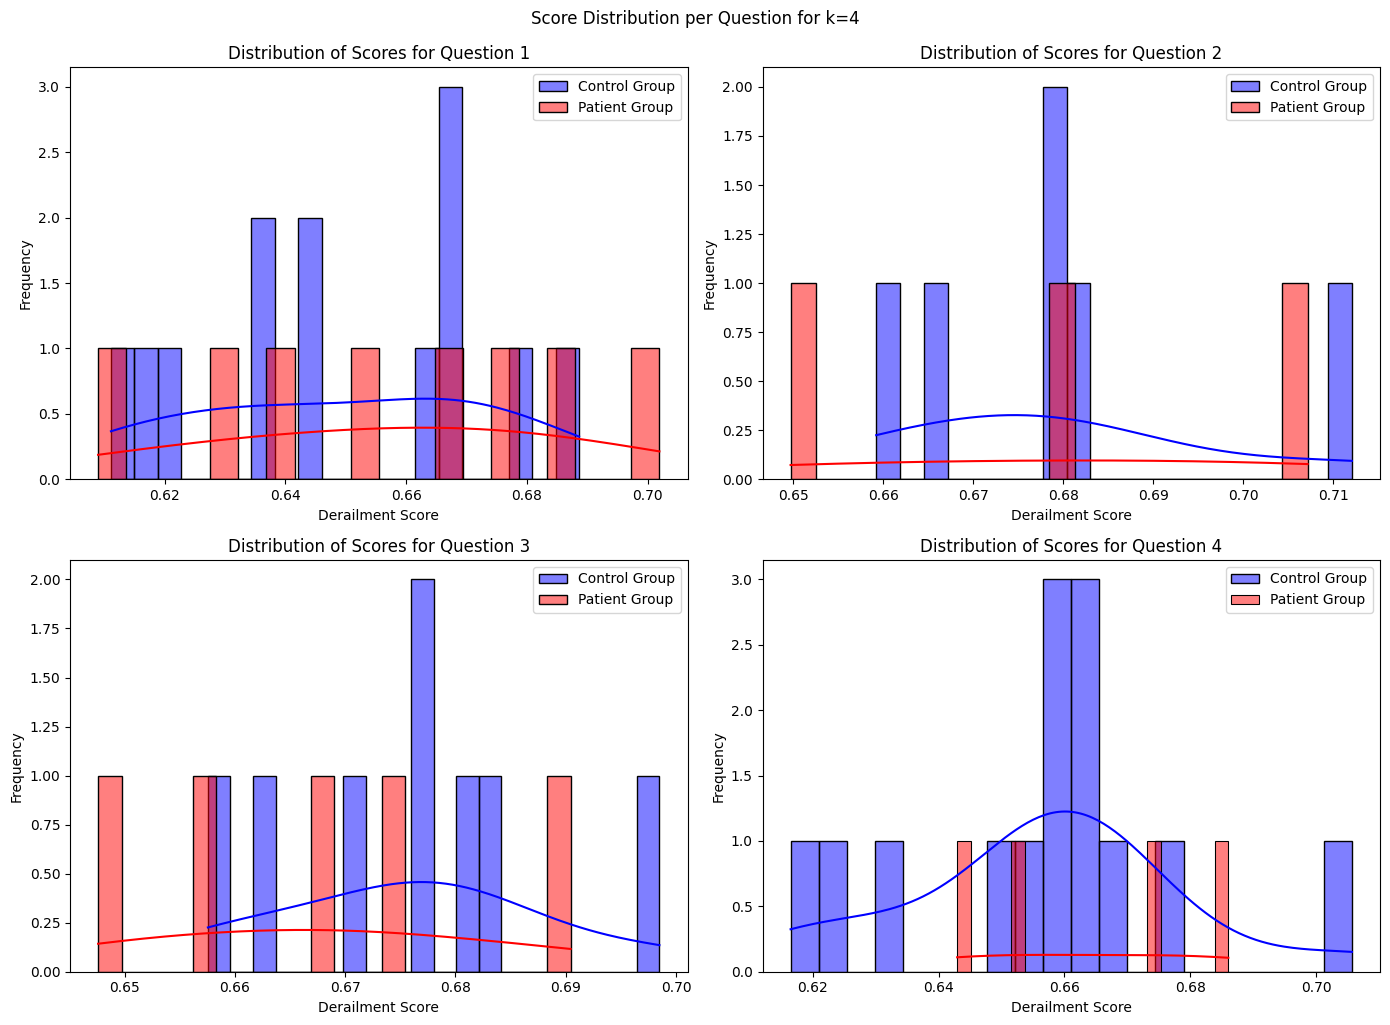

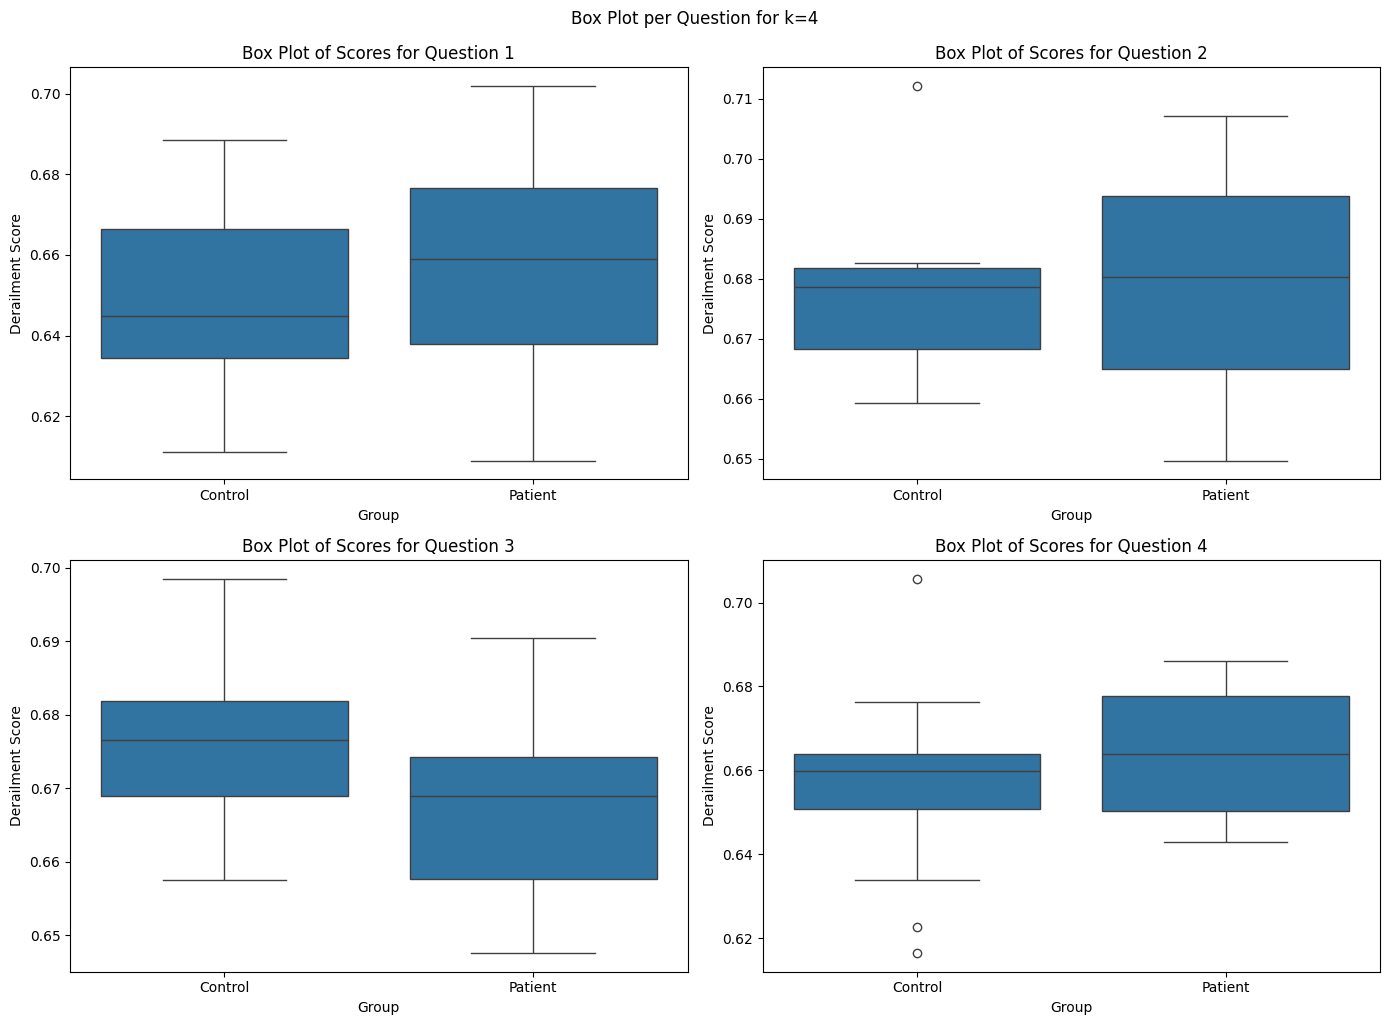

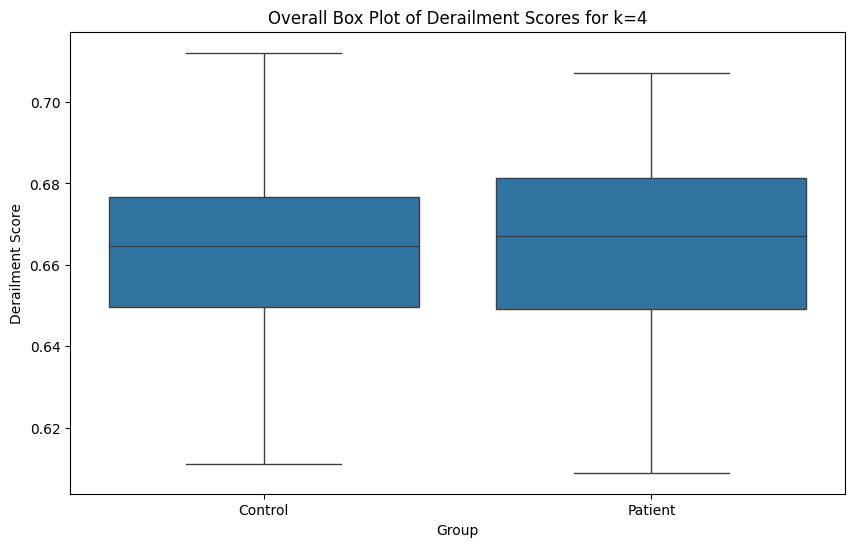

T-Test Results per Question for k=4:
Question 1: t-statistic = -0.6623793433781614, p-value = 0.742158442324805, control mean = 0.648993730545044, patient mean = 0.657081127166748
Question 2: t-statistic = 0.01818627926914379, p-value = 0.49299887901374995, control mean = 0.6793606877326965, patient mean = 0.6790793538093567
Question 3: t-statistic = 0.9993203535151588, p-value = 0.16955765670105888, control mean = 0.6758669018745422, patient mean = 0.6677691340446472
Question 4: t-statistic = -0.6261916553251105, p-value = 0.7299896865865922, control mean = 0.6564608812332153, patient mean = 0.6641815304756165

Overall T-Test Results for k=4: t-statistic = -0.49332919641540784, p-value = 0.6881943279258076, control mean = 0.6612310409545898, patient mean = 0.6644729375839233

Welch's Test Results per Question for k=4:
Question 1: t-statistic = -0.6309211704672658, p-value = 0.7303795229152303
Question 2: t-statistic = 0.015435072211166431, p-value = 0.494349657776495
Question 3: t-sta

In [75]:
full_analysis(control_valid_answers_content_words_without_PROPN, patient_valid_answers_content_words_without_PROPN, tokenizer, embedding_model, k=4, sliding_window=False)

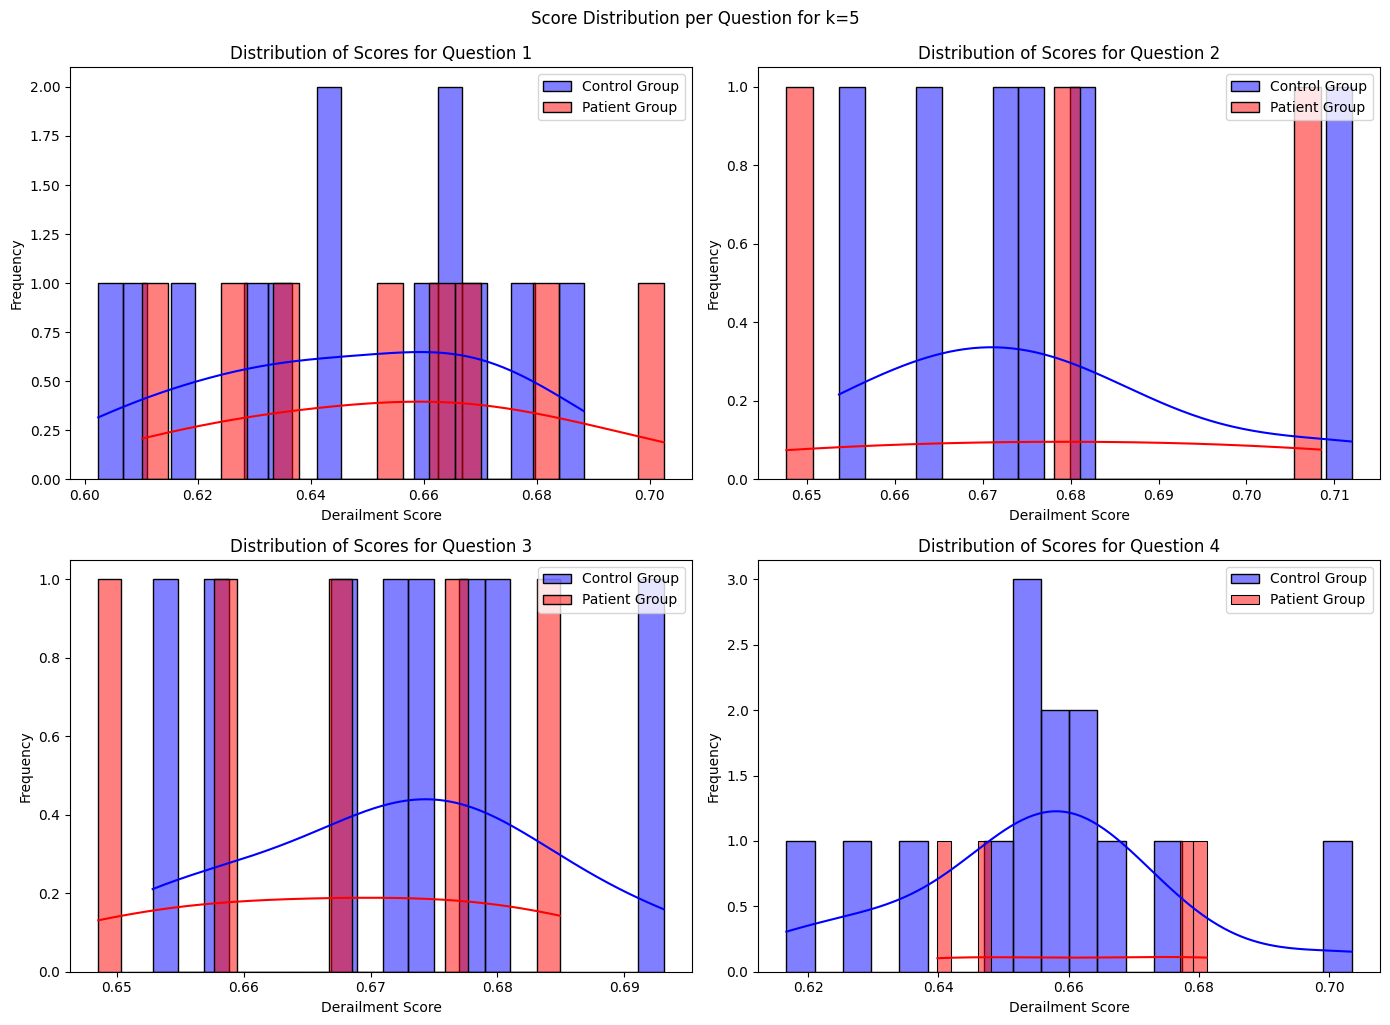

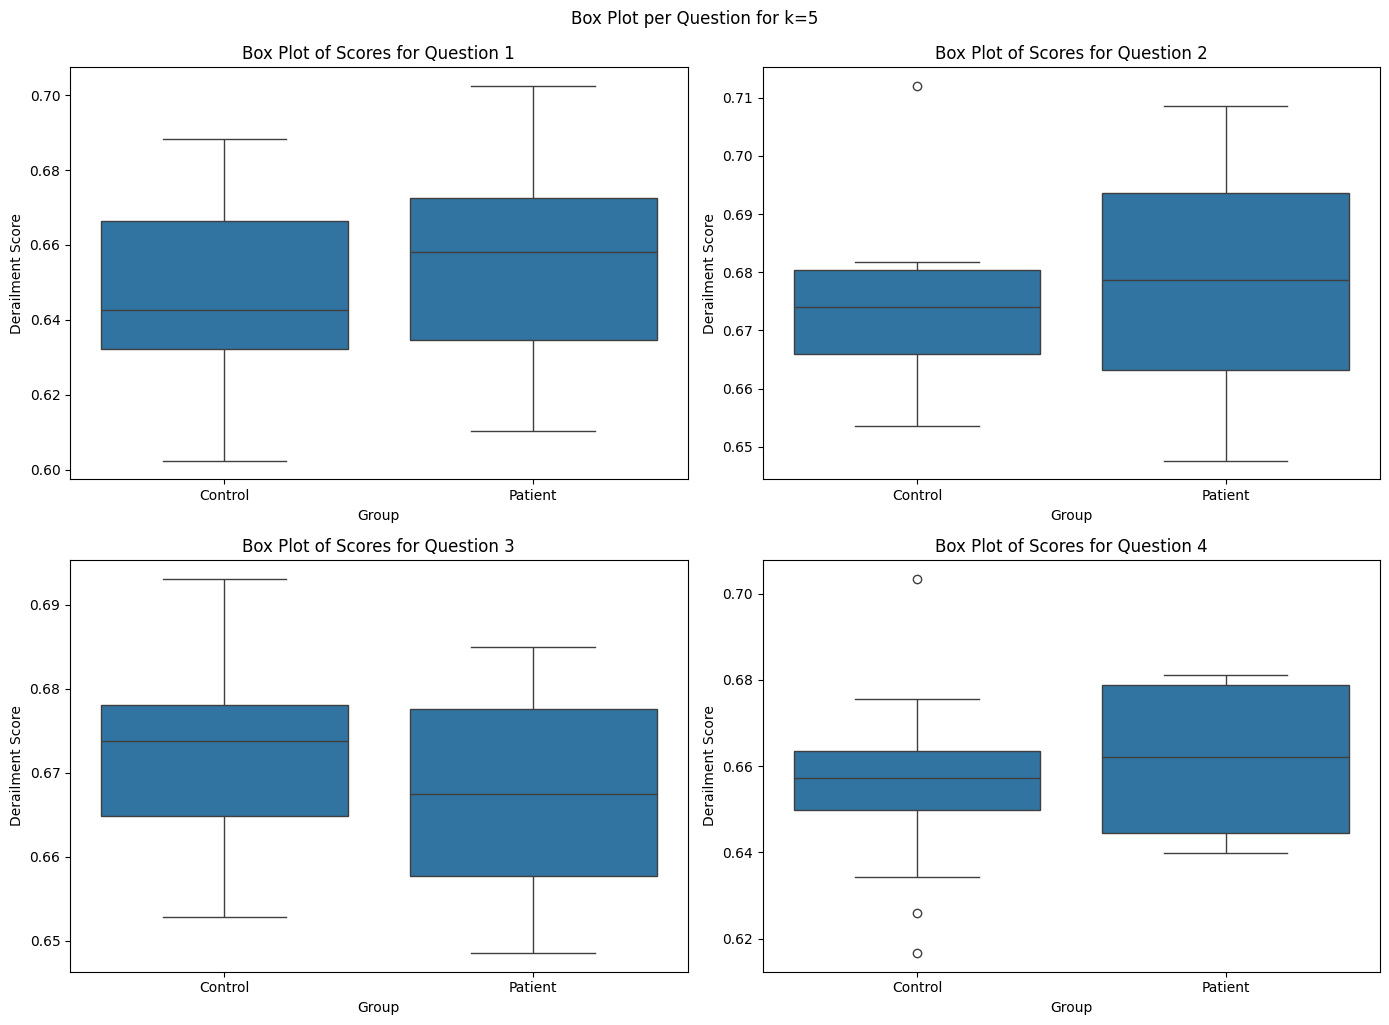

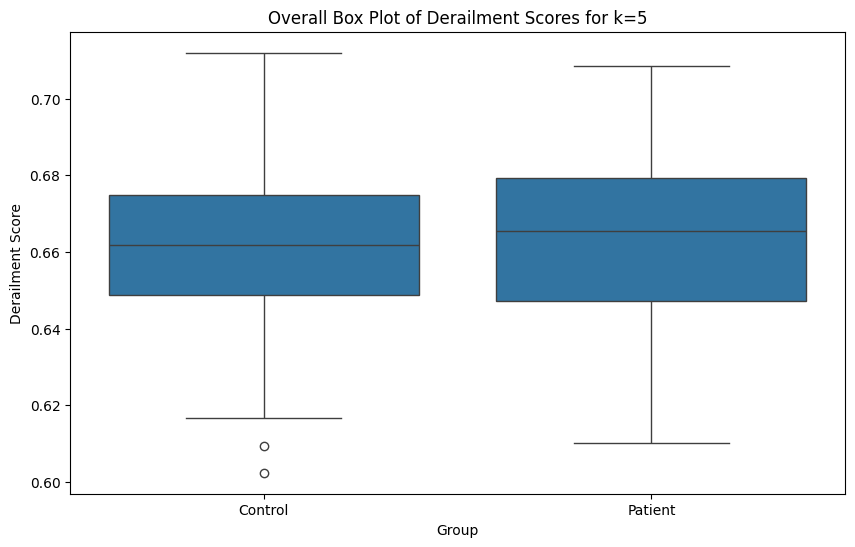

T-Test Results per Question for k=5:
Question 1: t-statistic = -0.7098492783040199, p-value = 0.7567905164491149, control mean = 0.6465739607810974, patient mean = 0.6555446982383728
Question 2: t-statistic = -0.10287300722504565, p-value = 0.5395255734529937, control mean = 0.6765598654747009, patient mean = 0.6782631278038025
Question 3: t-statistic = 0.6110452888490889, p-value = 0.2767932851214685, control mean = 0.6719909906387329, patient mean = 0.6672619581222534
Question 4: t-statistic = -0.4916272315435929, p-value = 0.6851704710532636, control mean = 0.6554132699966431, patient mean = 0.6613209843635559

Overall T-Test Results for k=5: t-statistic = -0.6193172857531508, p-value = 0.7309541918570898, control mean = 0.658939778804779, patient mean = 0.6630370616912842

Welch's Test Results per Question for k=5:
Question 1: t-statistic = -0.6895418768038605, p-value = 0.7489633777147697
Question 2: t-statistic = -0.08800975973084064, p-value = 0.5322028900202709
Question 3: t-st

In [76]:
full_analysis(control_valid_answers_content_words_without_PROPN, patient_valid_answers_content_words_without_PROPN, tokenizer, embedding_model, k=5, sliding_window=False)

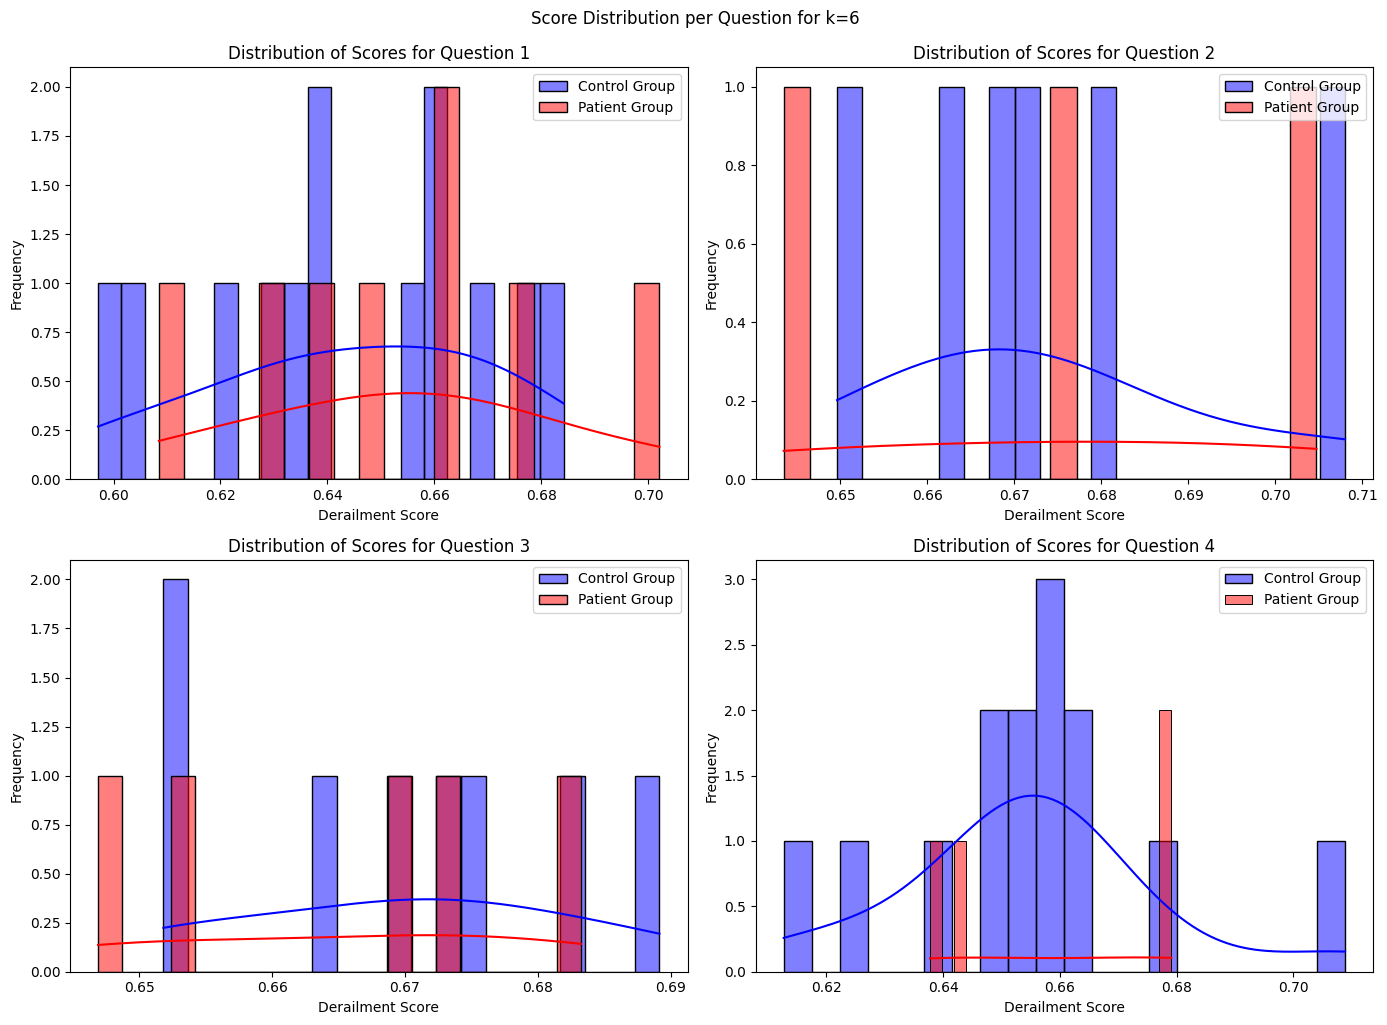

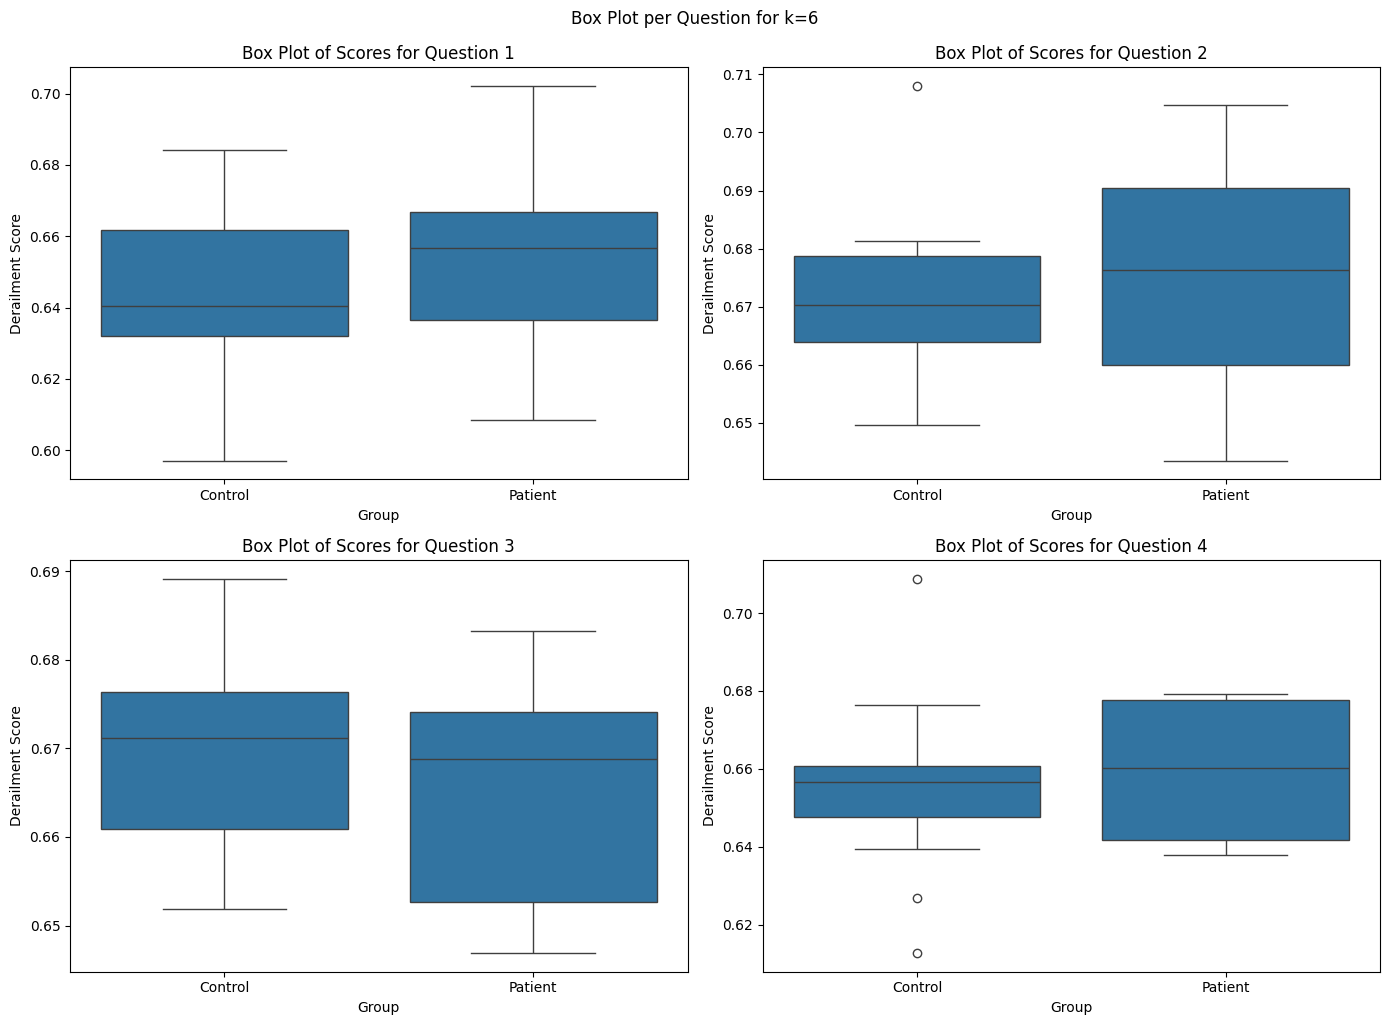

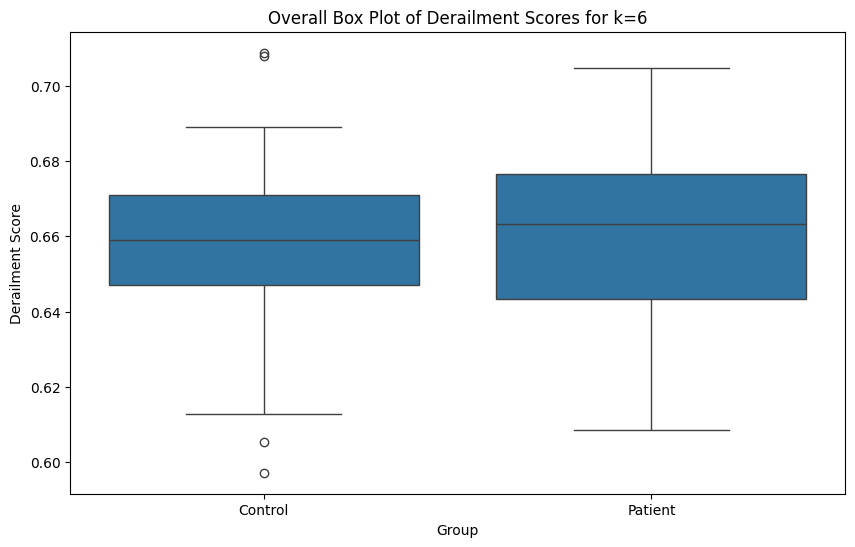

T-Test Results per Question for k=6:
Question 1: t-statistic = -0.754821799919753, p-value = 0.7701946928867809, control mean = 0.6444279551506042, patient mean = 0.6538574695587158
Question 2: t-statistic = -0.0742795173213645, p-value = 0.5285669608606285, control mean = 0.6736013889312744, patient mean = 0.674833357334137
Question 3: t-statistic = 0.5716802840904263, p-value = 0.2895164215628674, control mean = 0.6696517467498779, patient mean = 0.6651229858398438
Question 4: t-statistic = -0.35897432430938475, p-value = 0.6378462500051045, control mean = 0.6547523140907288, patient mean = 0.6592650413513184

Overall T-Test Results for k=6: t-statistic = -0.568343544770129, p-value = 0.7140206923730051, control mean = 0.6571443676948547, patient mean = 0.6609017252922058

Welch's Test Results per Question for k=6:
Question 1: t-statistic = -0.7396852187424005, p-value = 0.7641466194663238
Question 2: t-statistic = -0.06330718413898503, p-value = 0.5231701311570194
Question 3: t-stat

In [77]:
full_analysis(control_valid_answers_content_words_without_PROPN, patient_valid_answers_content_words_without_PROPN, tokenizer, embedding_model, k=6, sliding_window=False)

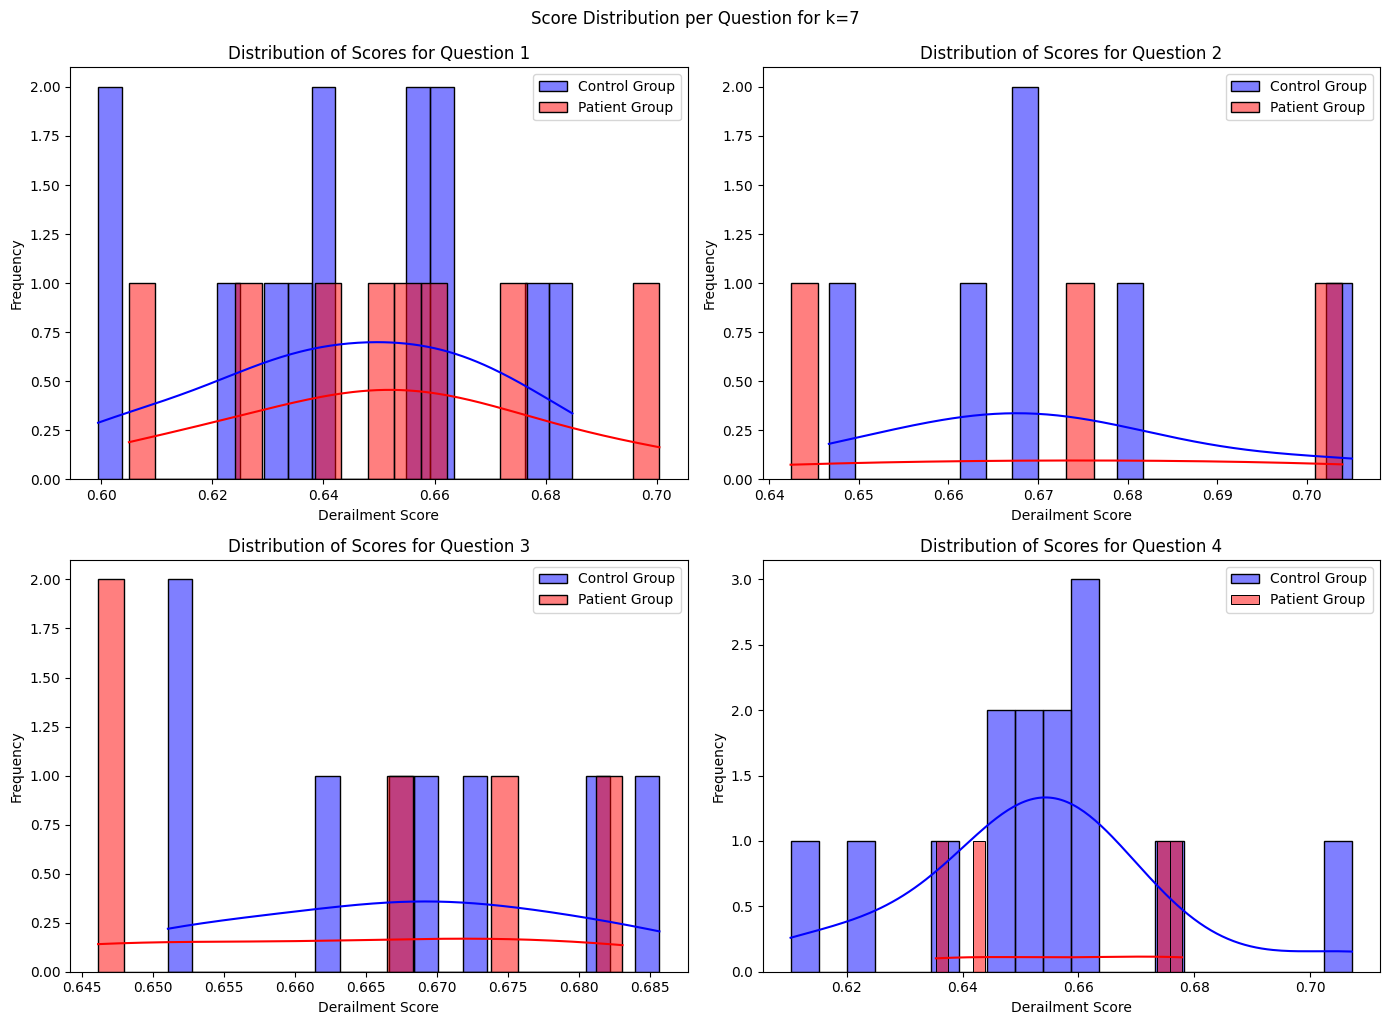

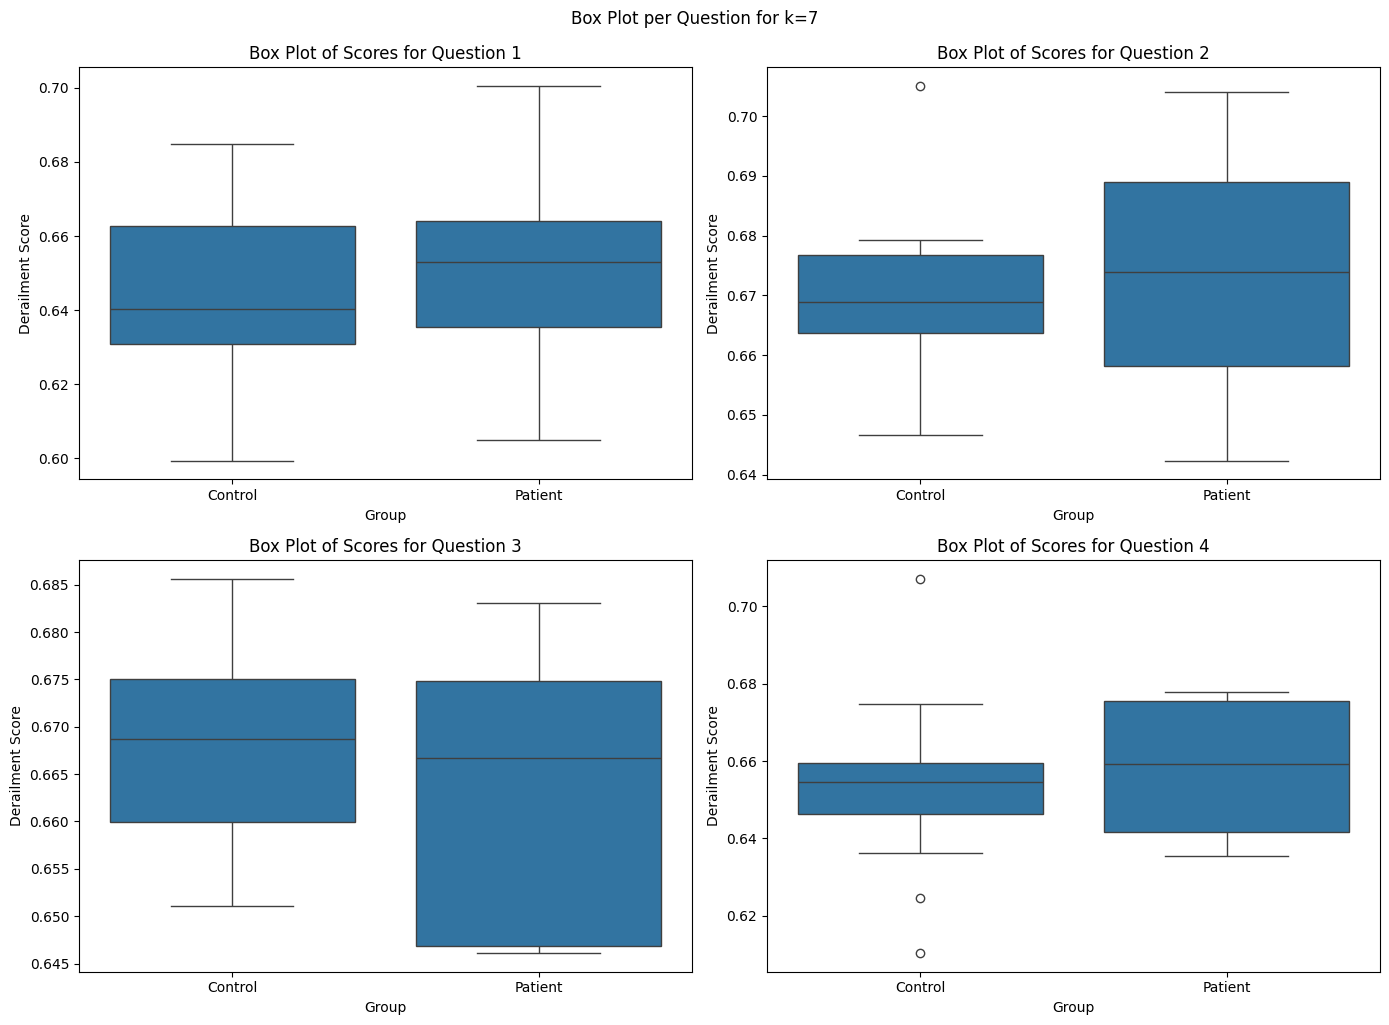

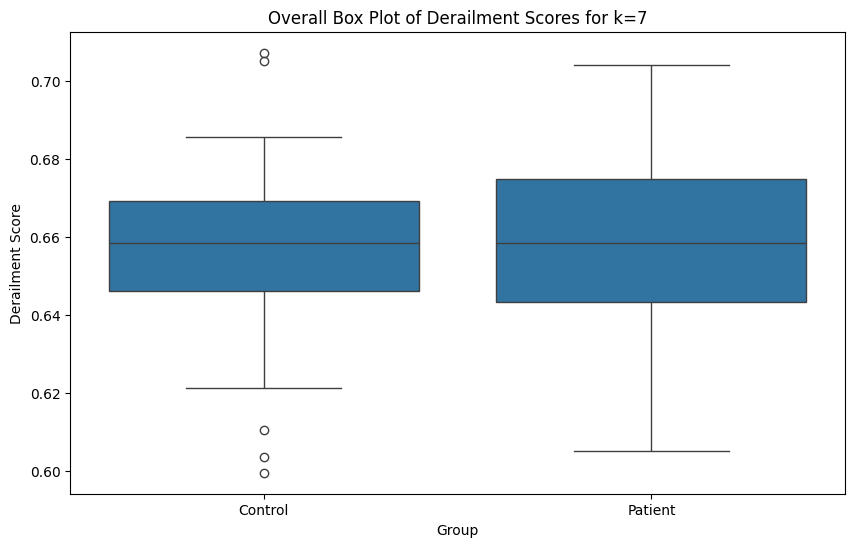

T-Test Results per Question for k=7:
Question 1: t-statistic = -0.6094044083554601, p-value = 0.7252624579835789, control mean = 0.6438376903533936, patient mean = 0.6513555645942688
Question 2: t-statistic = -0.09806581974787452, p-value = 0.5376854860881993, control mean = 0.67180997133255, patient mean = 0.6734263300895691
Question 3: t-statistic = 0.5481025673616858, p-value = 0.2972847505963599, control mean = 0.6679204702377319, patient mean = 0.6635215878486633
Question 4: t-statistic = -0.37344231221705126, p-value = 0.64313948239427, control mean = 0.6531619429588318, patient mean = 0.657891571521759

Overall T-Test Results for k=7: t-statistic = -0.4877096525296716, p-value = 0.6862185168974888, control mean = 0.6558141708374023, patient mean = 0.6590148210525513

Welch's Test Results per Question for k=7:
Question 1: t-statistic = -0.5916934128249228, p-value = 0.7181134965754217
Question 2: t-statistic = -0.08292303226208322, p-value = 0.5302934283580353
Question 3: t-stati

In [78]:
full_analysis(control_valid_answers_content_words_without_PROPN, patient_valid_answers_content_words_without_PROPN, tokenizer, embedding_model, k=7, sliding_window=False)

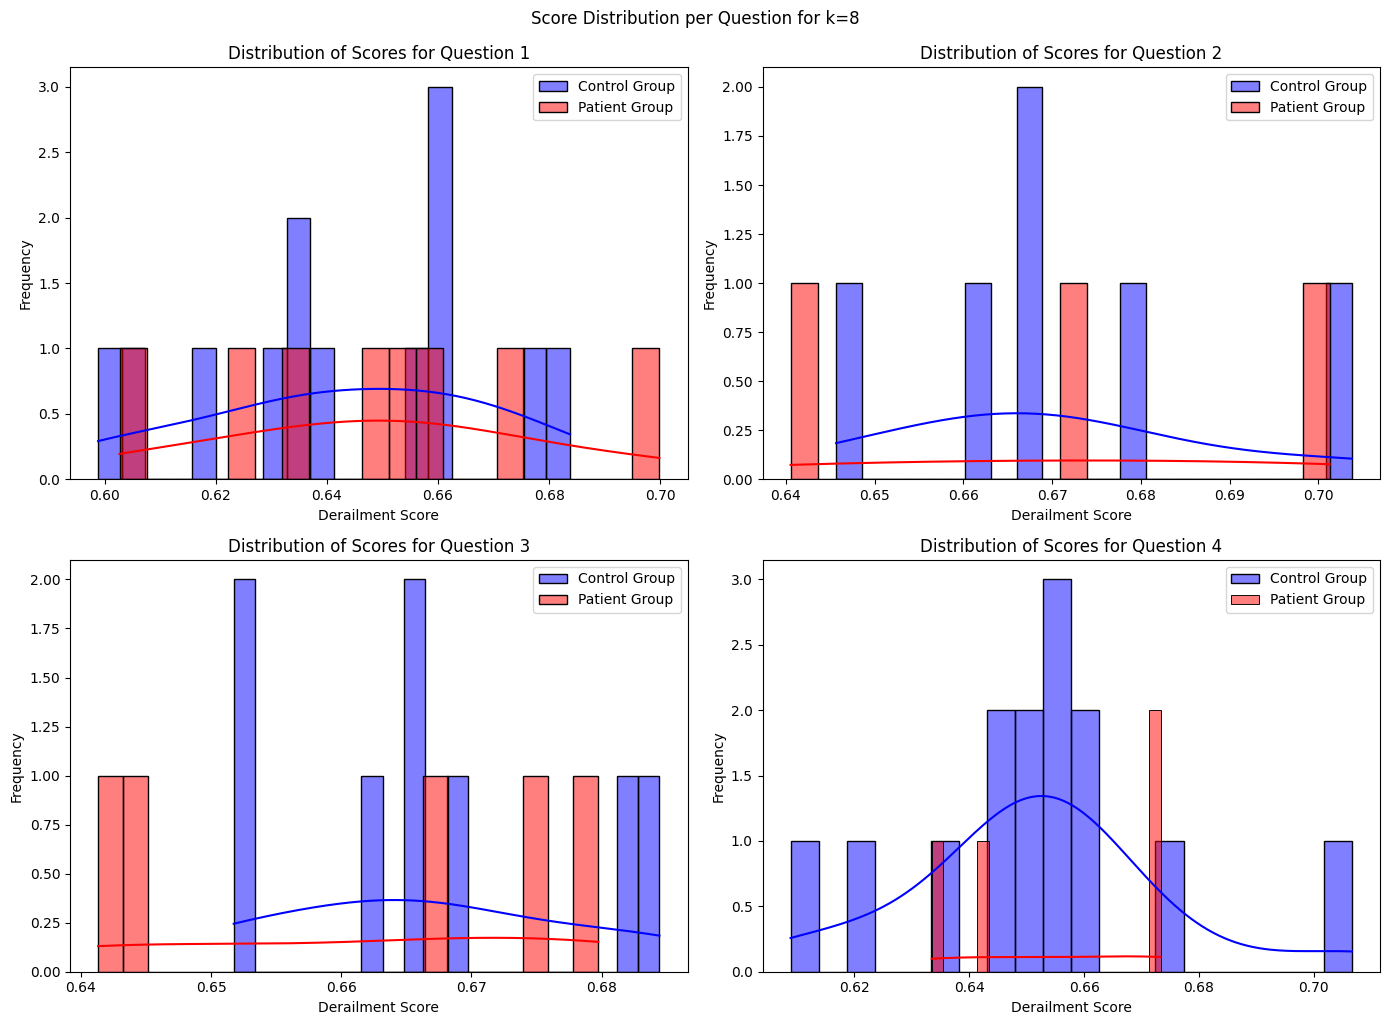

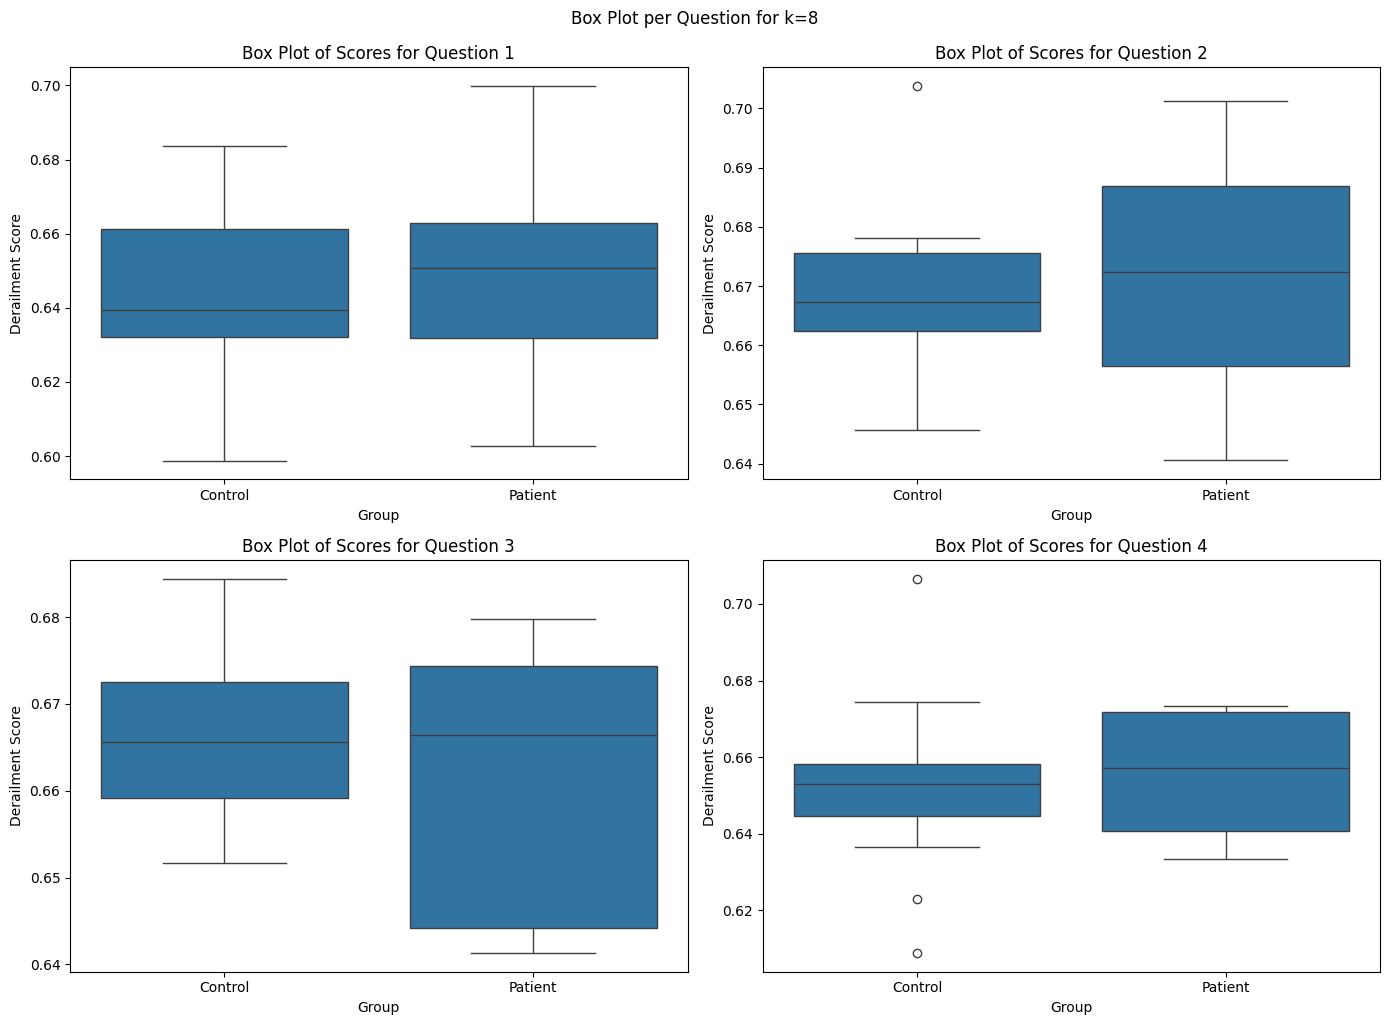

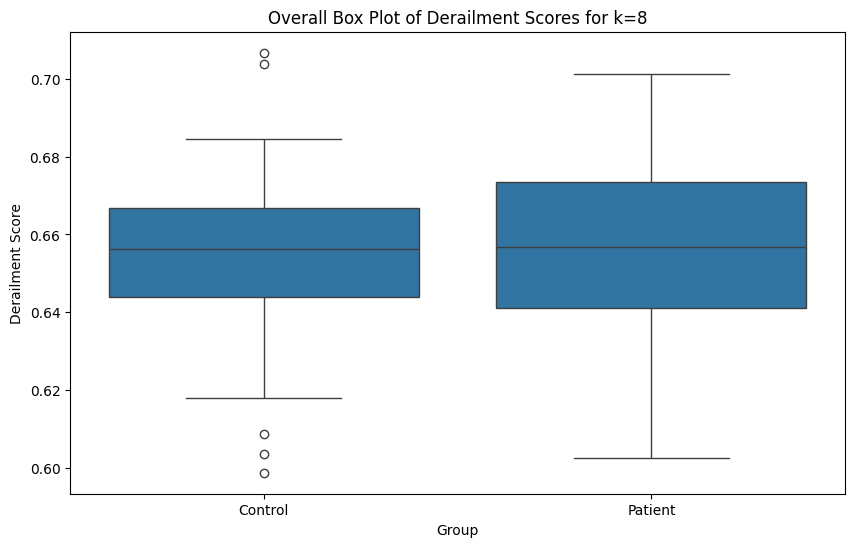

T-Test Results per Question for k=8:
Question 1: t-statistic = -0.5074457630978644, p-value = 0.6911591481348228, control mean = 0.6431607007980347, patient mean = 0.6494809985160828
Question 2: t-statistic = -0.05527924950268701, p-value = 0.5212696592293397, control mean = 0.6704851984977722, patient mean = 0.6713888049125671
Question 3: t-statistic = 0.6499306988022359, p-value = 0.26453809109051707, control mean = 0.6664872169494629, patient mean = 0.6612066030502319
Question 4: t-statistic = -0.2667681831763375, p-value = 0.6034723447549422, control mean = 0.6519328355789185, patient mean = 0.6552920341491699

Overall T-Test Results for k=8: t-statistic = -0.3286638156612979, p-value = 0.6282132333036177, control mean = 0.6547062397003174, patient mean = 0.6568607687950134

Welch's Test Results per Question for k=8:
Question 1: t-statistic = -0.49002924237327483, p-value = 0.6839638488893003
Question 2: t-statistic = -0.046923421571331274, p-value = 0.5171701270989841
Question 3: 

In [79]:
full_analysis(control_valid_answers_content_words_without_PROPN, patient_valid_answers_content_words_without_PROPN, tokenizer, embedding_model, k=8, sliding_window=False)

**Analysis of answers after extracting only words tagged as content words without considering PROPN tagged words as content words (with sliding window):**

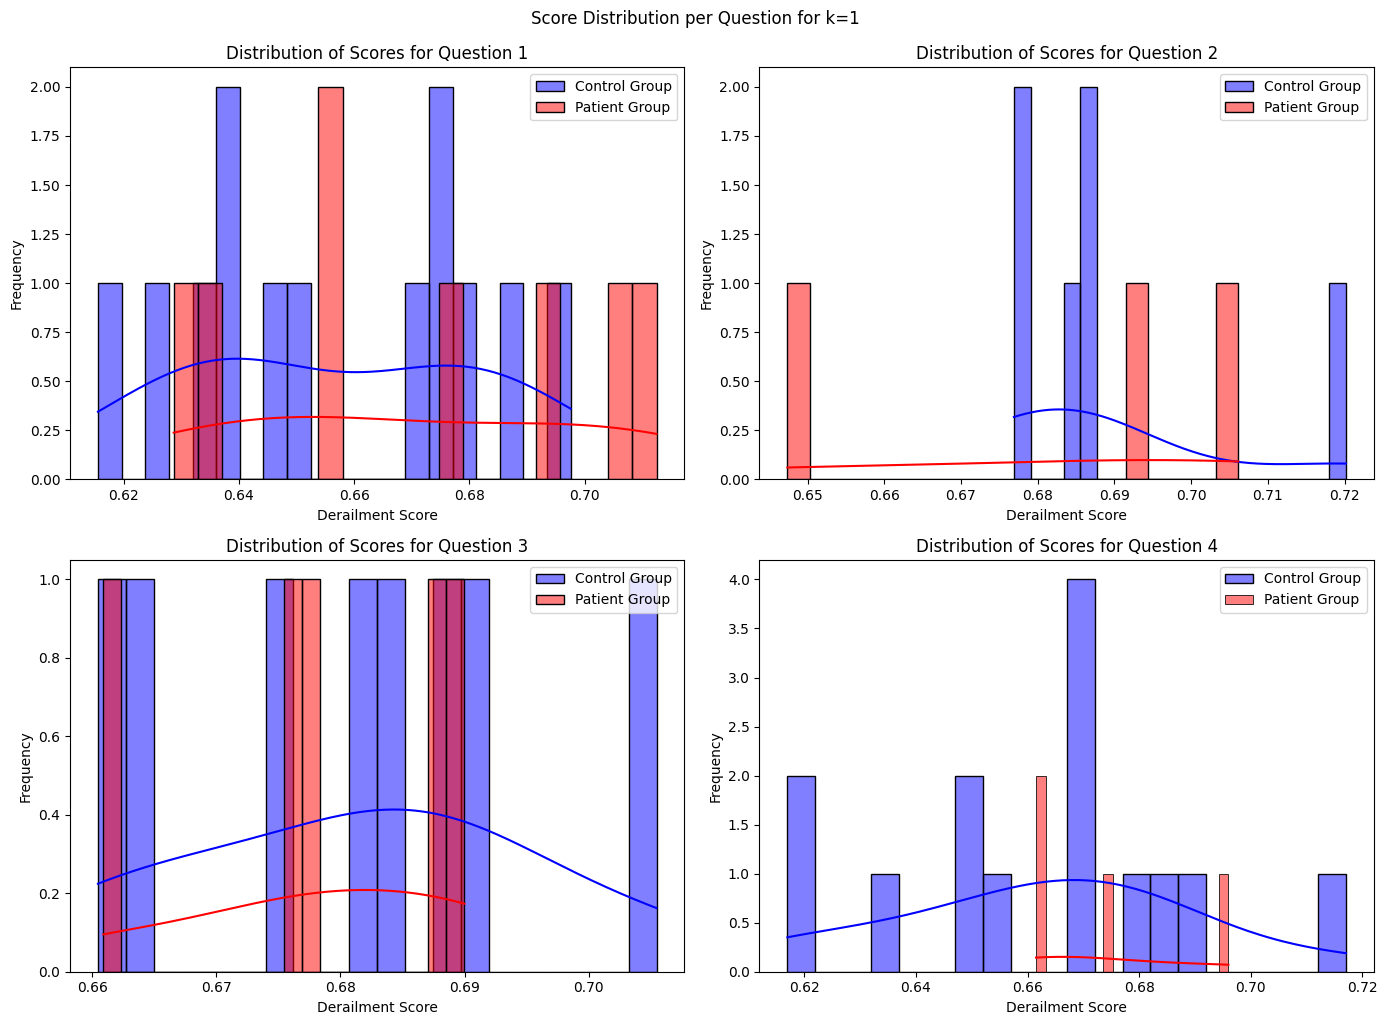

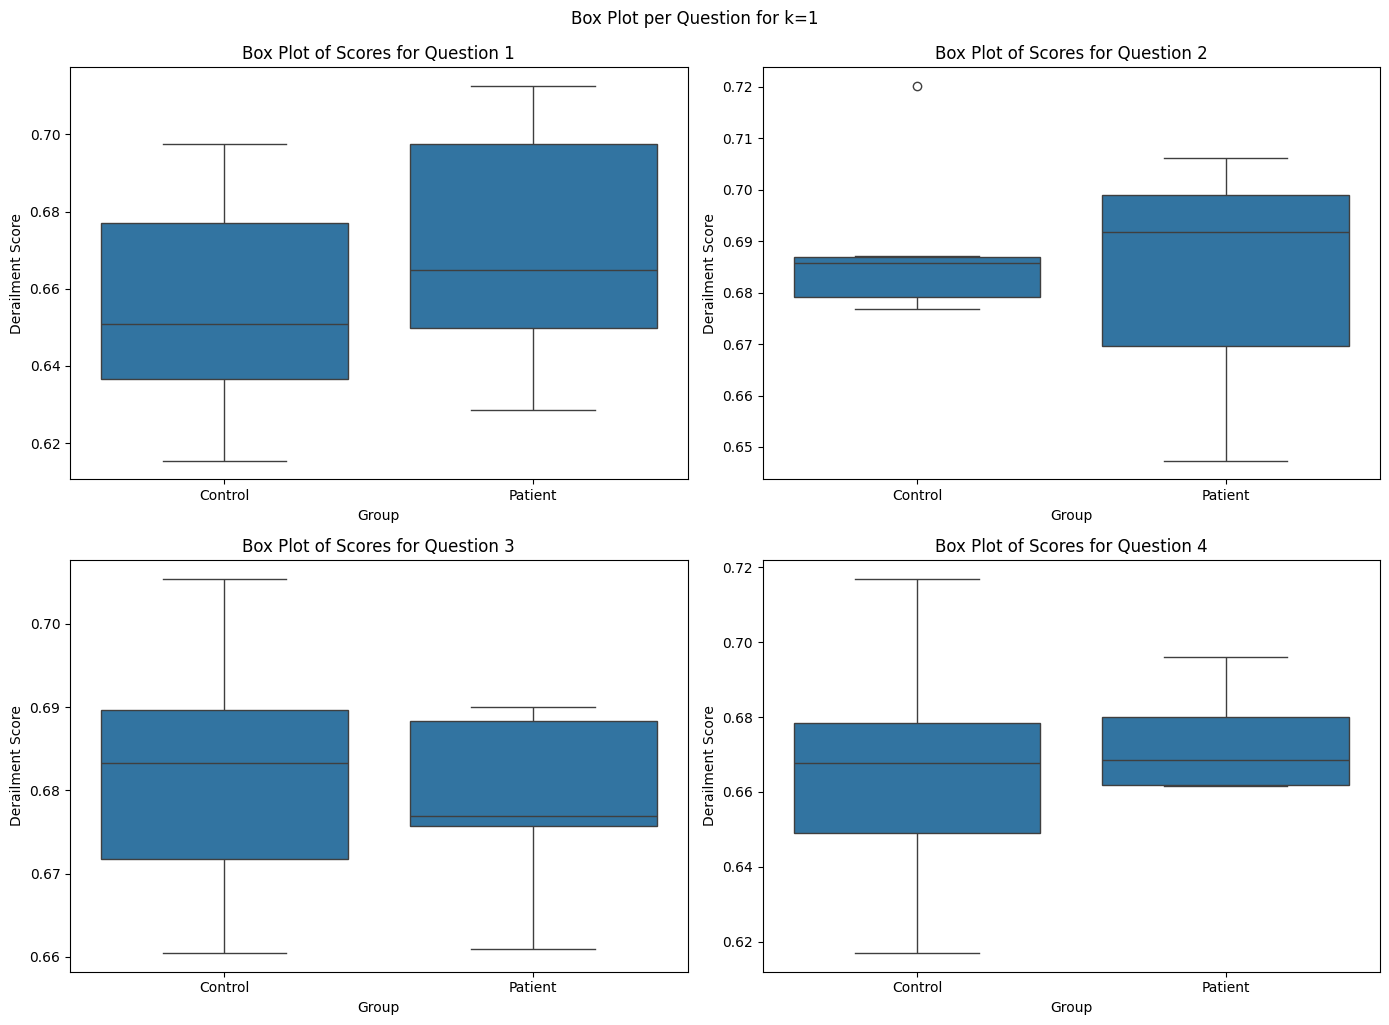

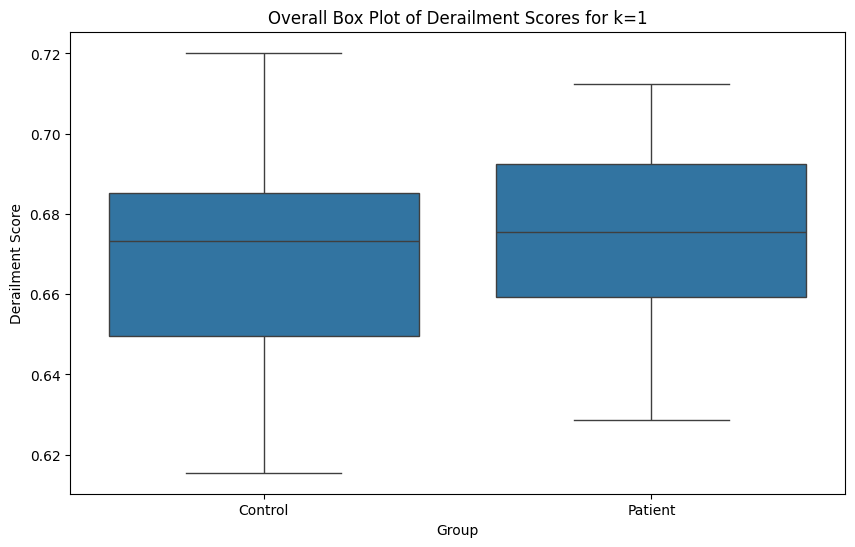

T-Test Results per Question for k=1:
Question 1: t-statistic = -1.059310008256755, p-value = 0.8486298017763593, control mean = 0.6566404104232788, patient mean = 0.6702190637588501
Question 2: t-statistic = 0.47402076307955904, p-value = 0.3249570988844571, control mean = 0.6888539791107178, patient mean = 0.6817376613616943
Question 3: t-statistic = 0.4003836951233325, p-value = 0.3482700811476309, control mean = 0.68149733543396, patient mean = 0.678370475769043
Question 4: t-statistic = -0.7508701588345472, p-value = 0.7681840839294036, control mean = 0.6625893712043762, patient mean = 0.6736094355583191

Overall T-Test Results for k=1: t-statistic = -0.9292487538642905, p-value = 0.8217267043139507, control mean = 0.6682360768318176, patient mean = 0.6746627688407898

Welch's Test Results per Question for k=1:
Question 1: t-statistic = -1.0103477705881878, p-value = 0.8344785307746821
Question 2: t-statistic = 0.37757917644575223, p-value = 0.36738999453829757
Question 3: t-statis

In [80]:
full_analysis(control_valid_answers_content_words_without_PROPN, patient_valid_answers_content_words_without_PROPN, tokenizer, embedding_model, k=1, sliding_window=True)

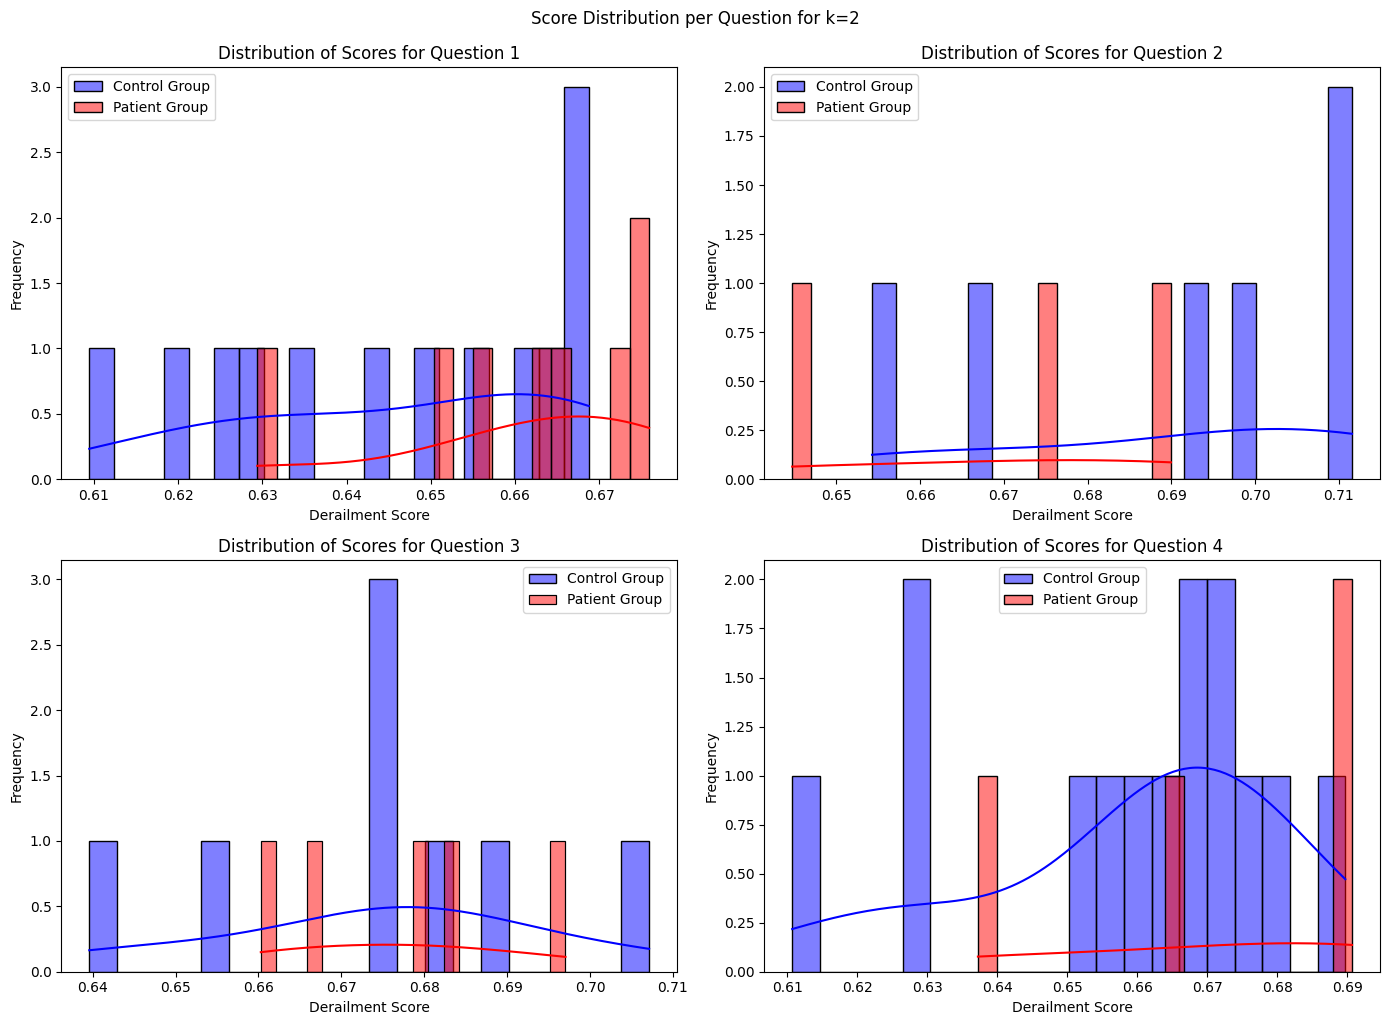

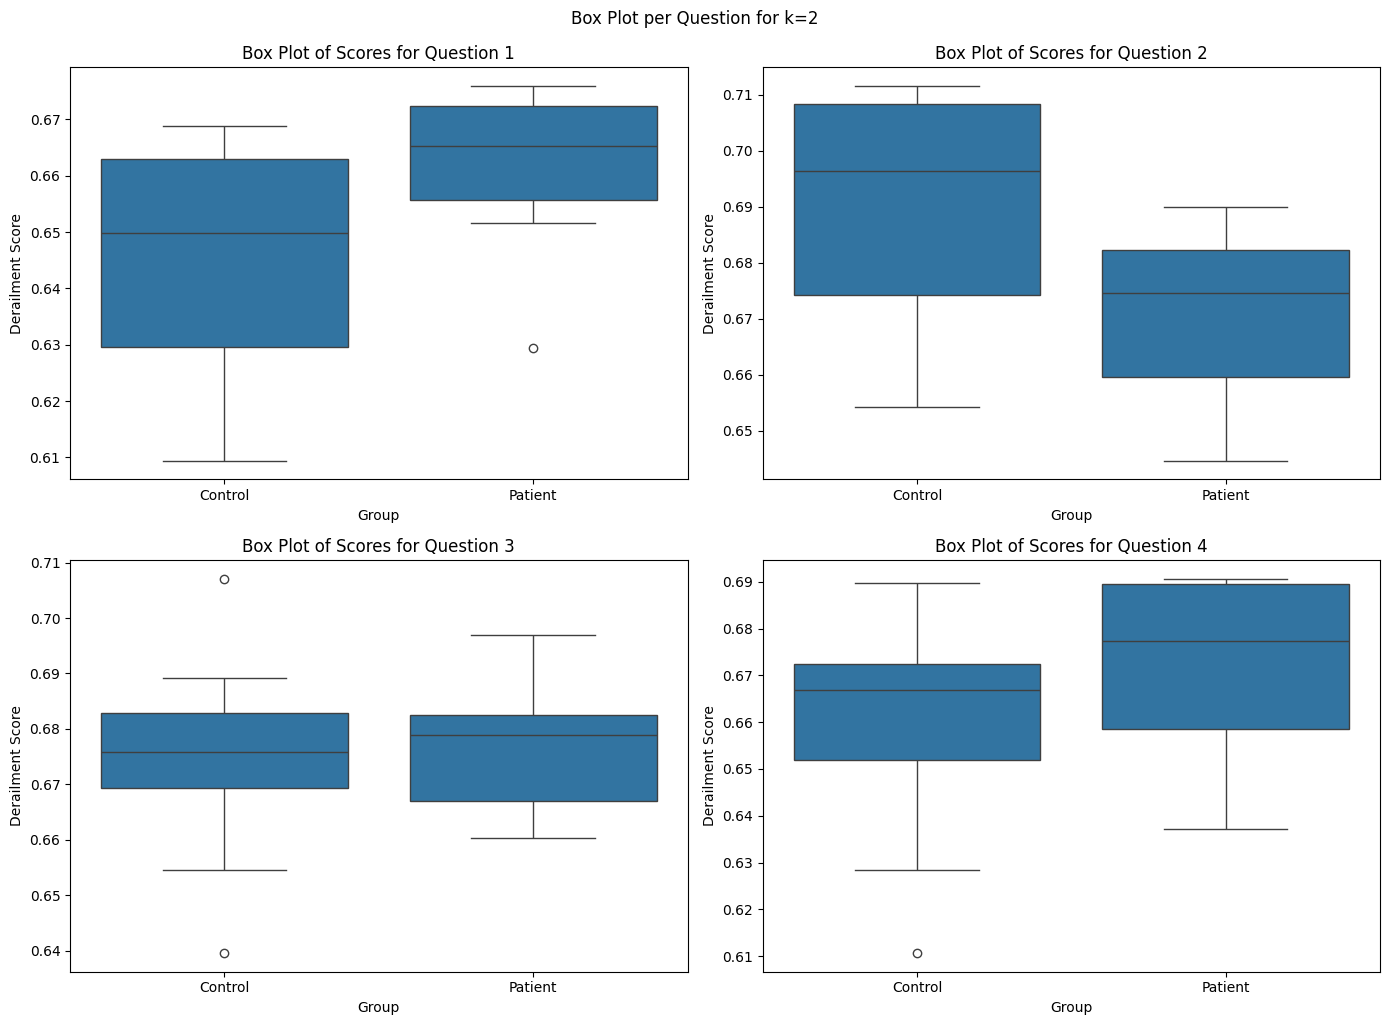

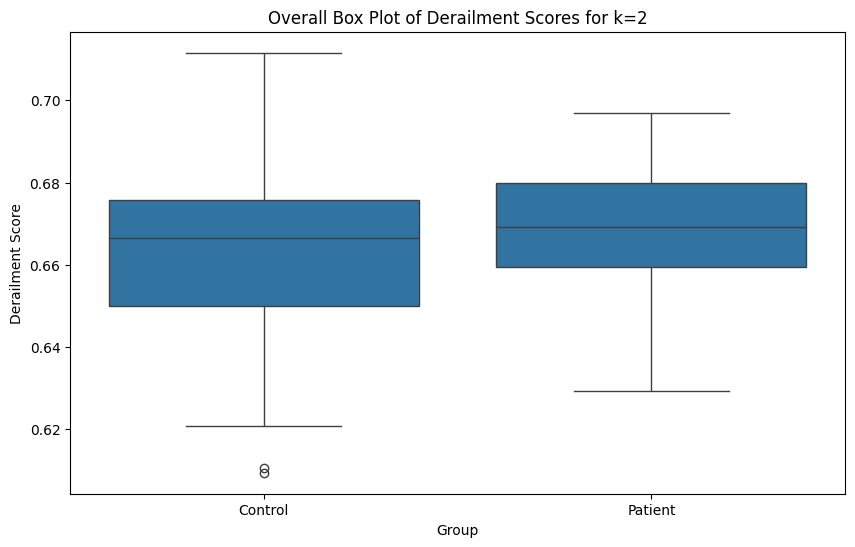

T-Test Results per Question for k=2:
Question 1: t-statistic = -1.8593719154598087, p-value = 0.9607341471948813, control mean = 0.6459529399871826, patient mean = 0.6613330245018005
Question 2: t-statistic = 1.1985919162793321, p-value = 0.1348426824876399, control mean = 0.6896434426307678, patient mean = 0.669776439666748
Question 3: t-statistic = -0.23769290109241392, p-value = 0.5917557437750463, control mean = 0.6746353507041931, patient mean = 0.6771392822265625
Question 4: t-statistic = -0.8991496188573177, p-value = 0.8090470455021568, control mean = 0.6589774489402771, patient mean = 0.6706140041351318

Overall T-Test Results for k=2: t-statistic = -0.9396755507634285, p-value = 0.8243923513648788, control mean = 0.6623906493186951, patient mean = 0.6684073209762573

Welch's Test Results per Question for k=2:
Question 1: t-statistic = -1.9816880116457738, p-value = 0.9684328919621683
Question 2: t-statistic = 1.2103944990998072, p-value = 0.14493944119390706
Question 3: t-sta

In [81]:
full_analysis(control_valid_answers_content_words_without_PROPN, patient_valid_answers_content_words_without_PROPN, tokenizer, embedding_model, k=2, sliding_window=True)

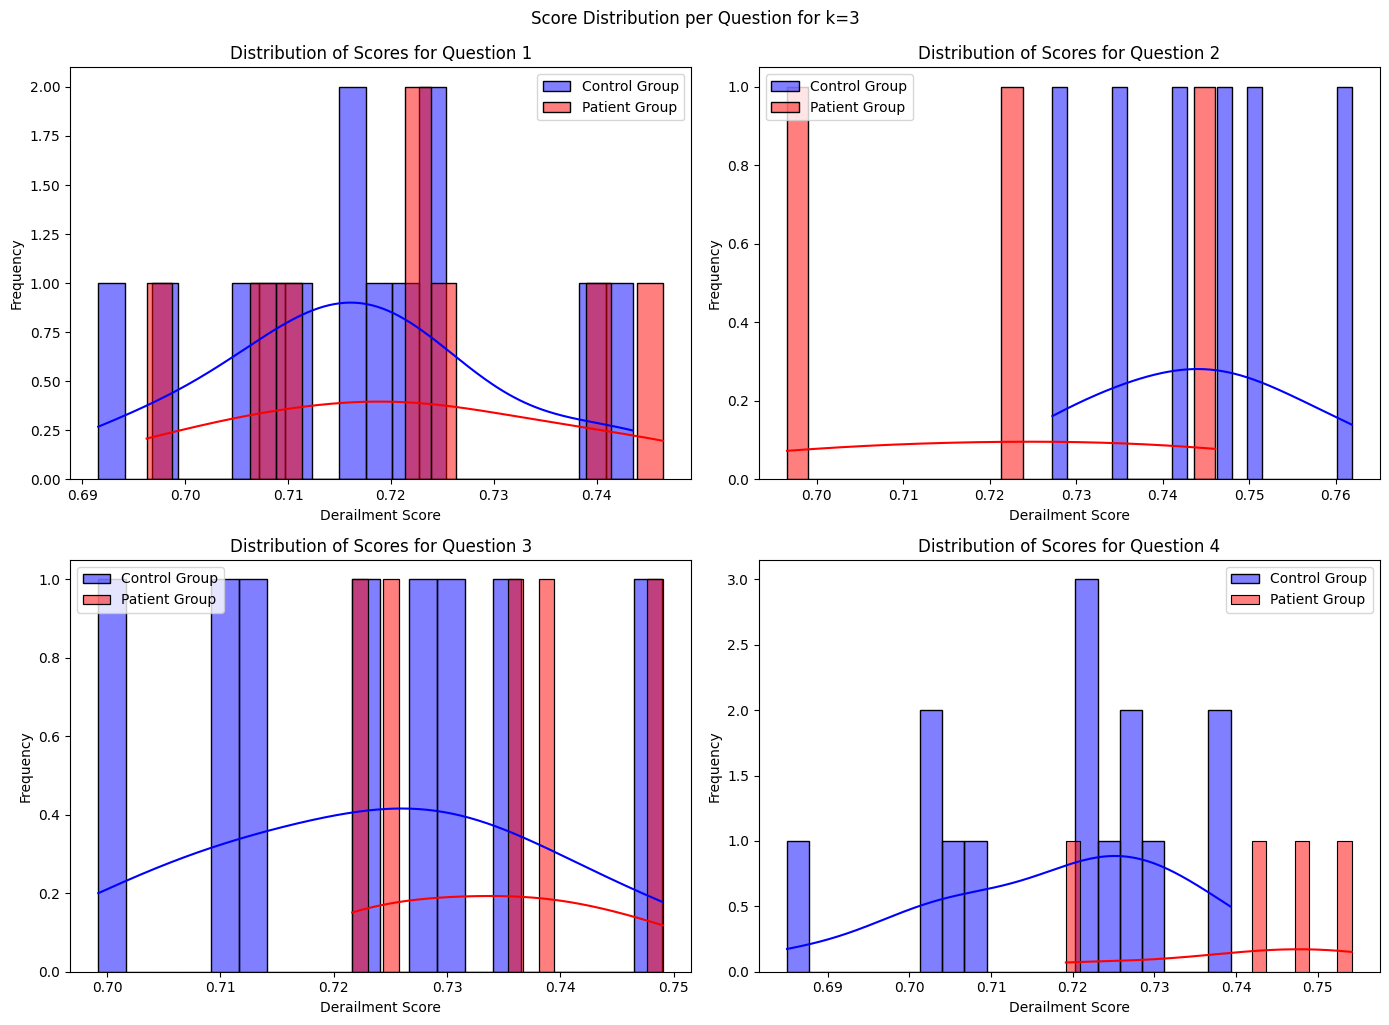

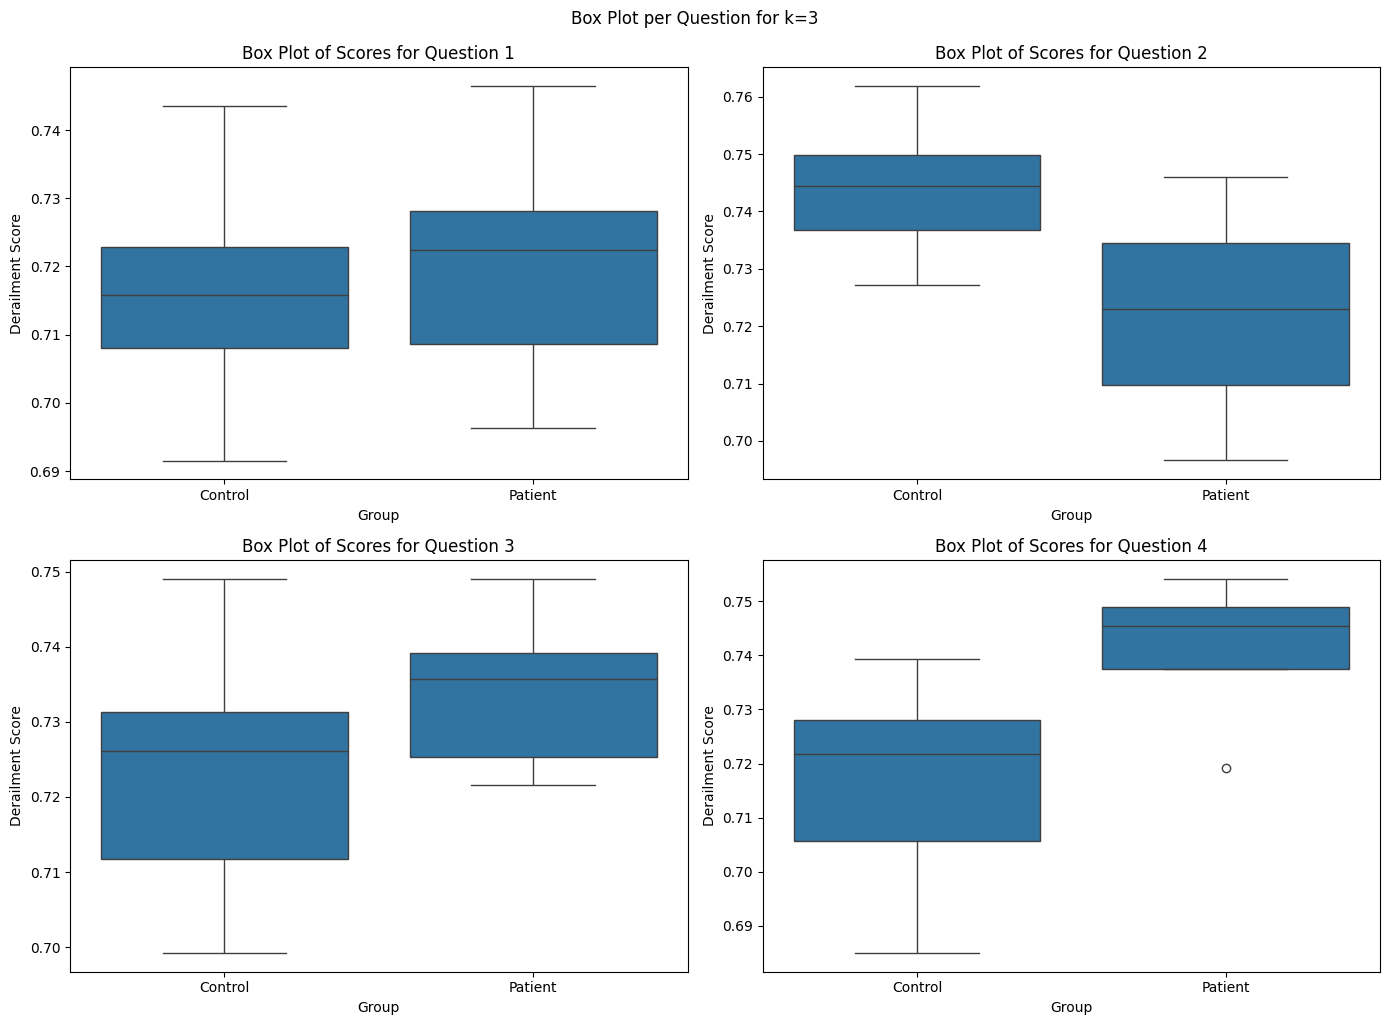

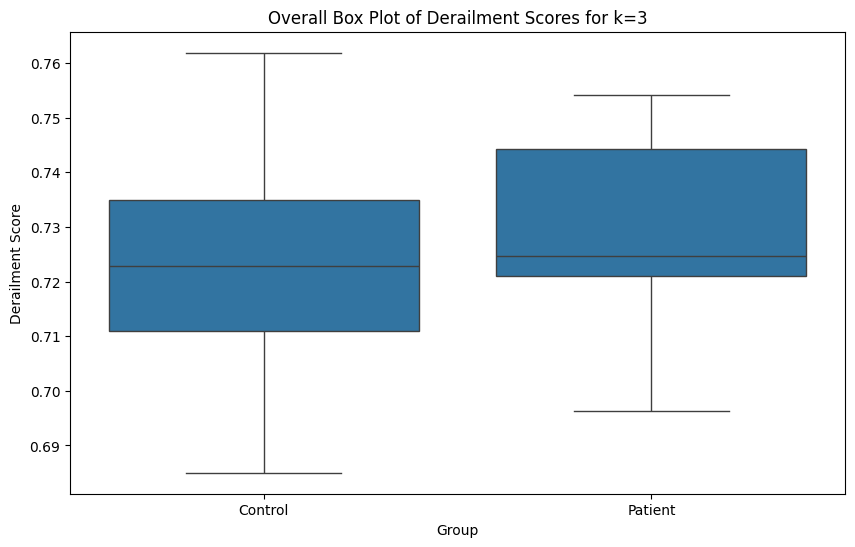

T-Test Results per Question for k=3:
Question 1: t-statistic = -0.627278424894641, p-value = 0.7310286571423967, control mean = 0.7166494131088257, patient mean = 0.7209717035293579
Question 2: t-statistic = 1.8580454557437731, p-value = 0.05275689477503697, control mean = 0.7439469695091248, patient mean = 0.721912145614624
Question 3: t-statistic = -1.2860779052831173, p-value = 0.8875863320065438, control mean = 0.7236979007720947, patient mean = 0.7341766357421875
Question 4: t-statistic = -2.6101801862865788, p-value = 0.9905275894997853, control mean = 0.7181477546691895, patient mean = 0.7410528063774109

Overall T-Test Results for k=3: t-statistic = -1.2604046368626216, p-value = 0.8937572171858885, control mean = 0.7225311398506165, patient mean = 0.7284301519393921

Welch's Test Results per Question for k=3:
Question 1: t-statistic = -0.6046757082537418, p-value = 0.722201052639828
Question 2: t-statistic = 1.455129277148675, p-value = 0.1293758487323122
Question 3: t-statist

In [82]:
full_analysis(control_valid_answers_content_words_without_PROPN, patient_valid_answers_content_words_without_PROPN, tokenizer, embedding_model, k=3, sliding_window=True)

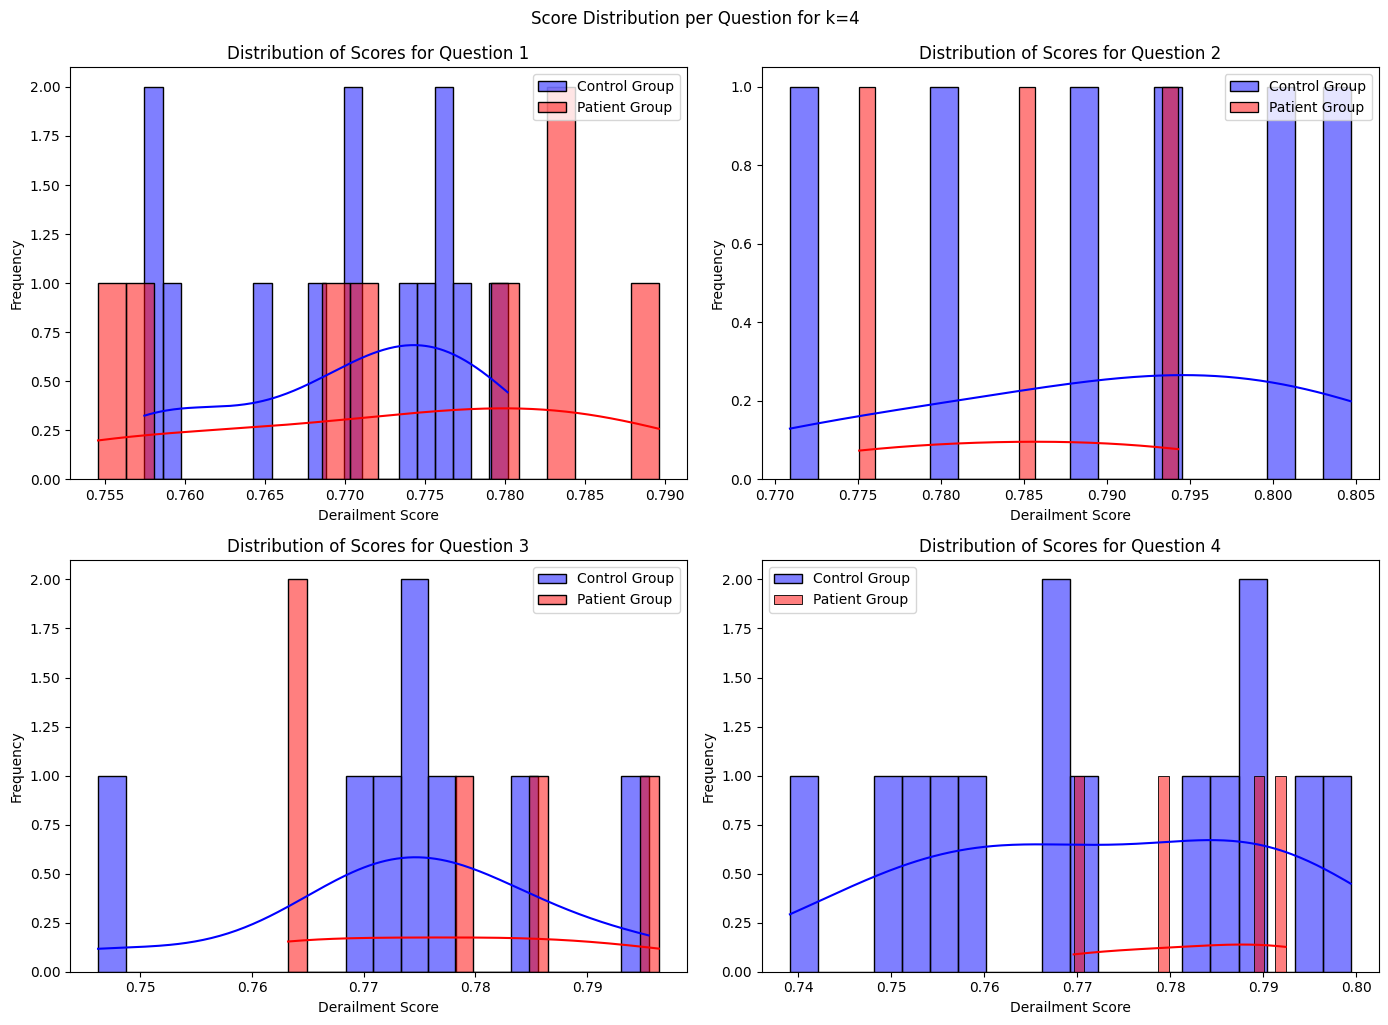

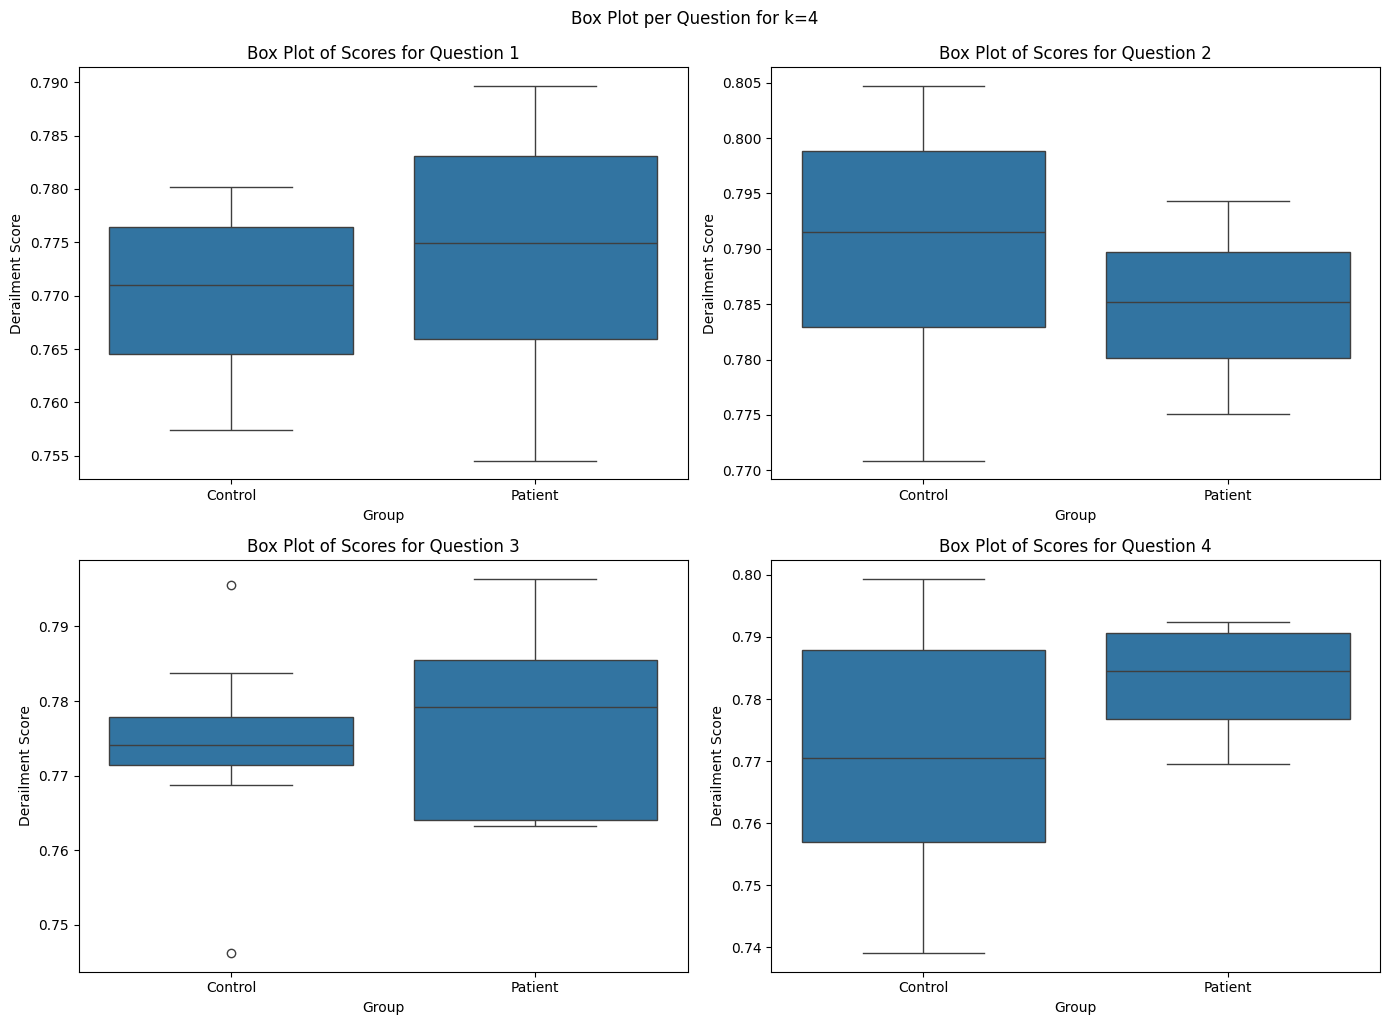

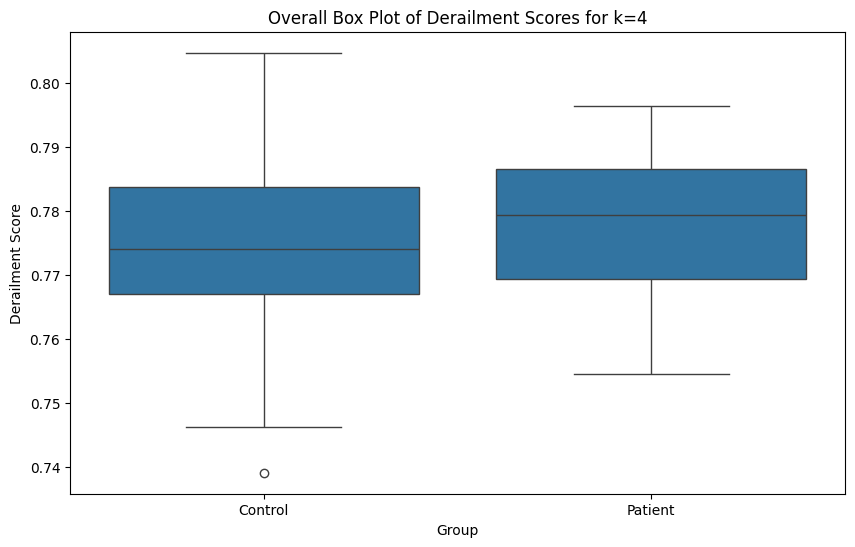

T-Test Results per Question for k=4:
Question 1: t-statistic = -0.7561715397498558, p-value = 0.7705899721825966, control mean = 0.769908607006073, patient mean = 0.7732944488525391
Question 2: t-statistic = 0.6144003291825229, p-value = 0.2791918081991708, control mean = 0.7899818420410156, patient mean = 0.7848493456840515
Question 3: t-statistic = -0.4839740732910252, p-value = 0.6810521555886824, control mean = 0.7738087177276611, patient mean = 0.7776881456375122
Question 4: t-statistic = -1.0885113805570352, p-value = 0.8537528695244617, control mean = 0.7719222903251648, patient mean = 0.7827796936035156

Overall T-Test Results for k=4: t-statistic = -0.9503109264327958, p-value = 0.8270844953229357, control mean = 0.7742948532104492, patient mean = 0.7780231833457947

Welch's Test Results per Question for k=4:
Question 1: t-statistic = -0.674166546005116, p-value = 0.7424700169760905
Question 2: t-statistic = 0.6782472505191843, p-value = 0.2629855080956892
Question 3: t-statis

In [83]:
full_analysis(control_valid_answers_content_words_without_PROPN, patient_valid_answers_content_words_without_PROPN, tokenizer, embedding_model, k=4, sliding_window=True)

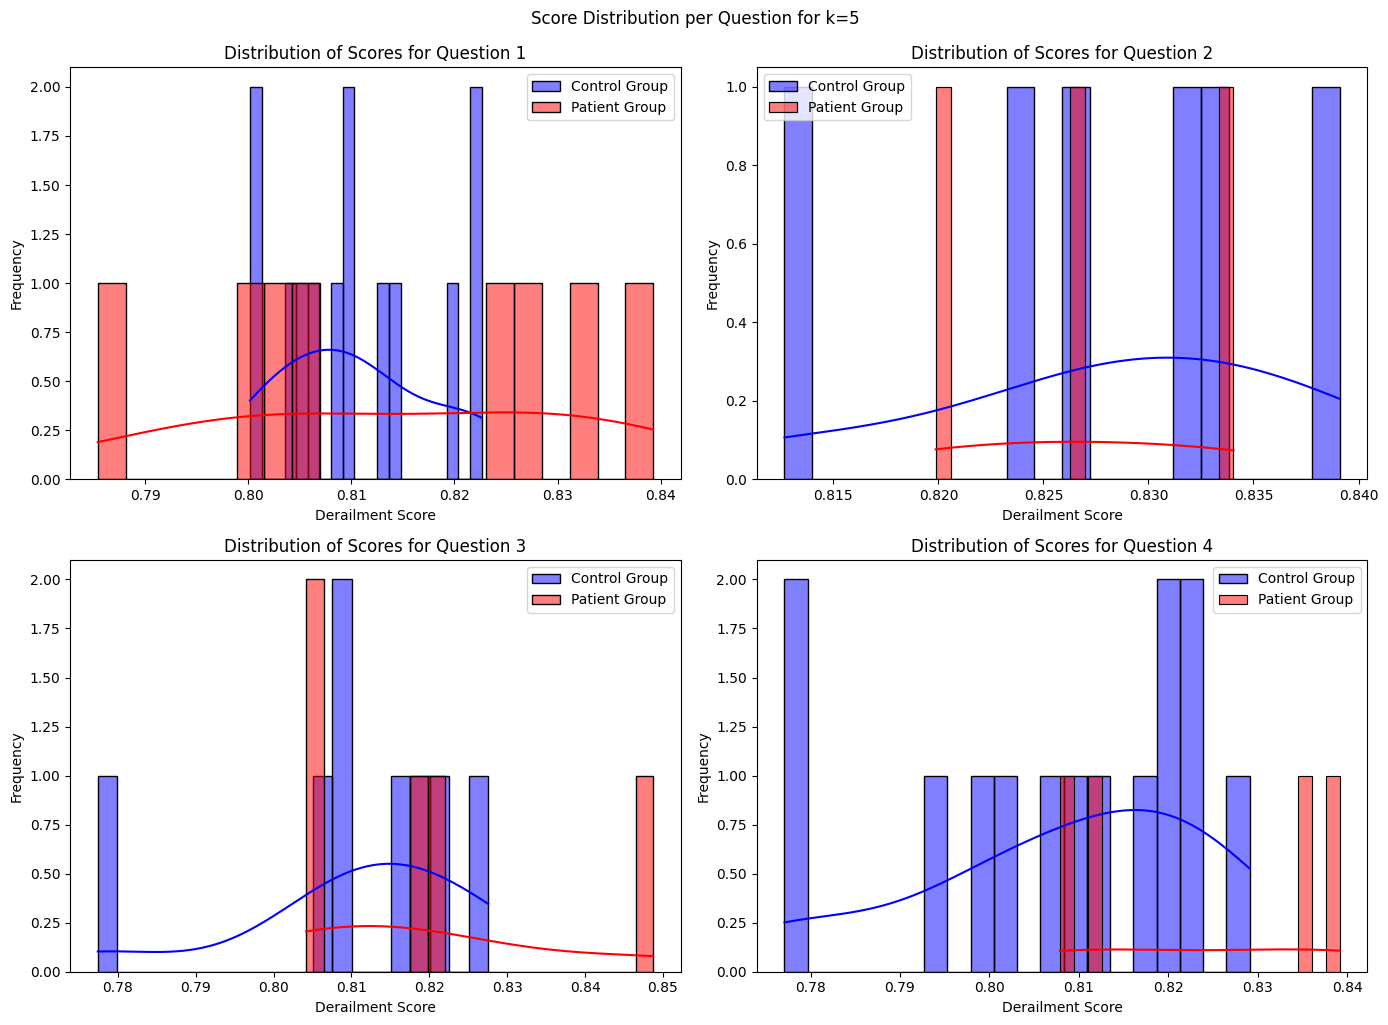

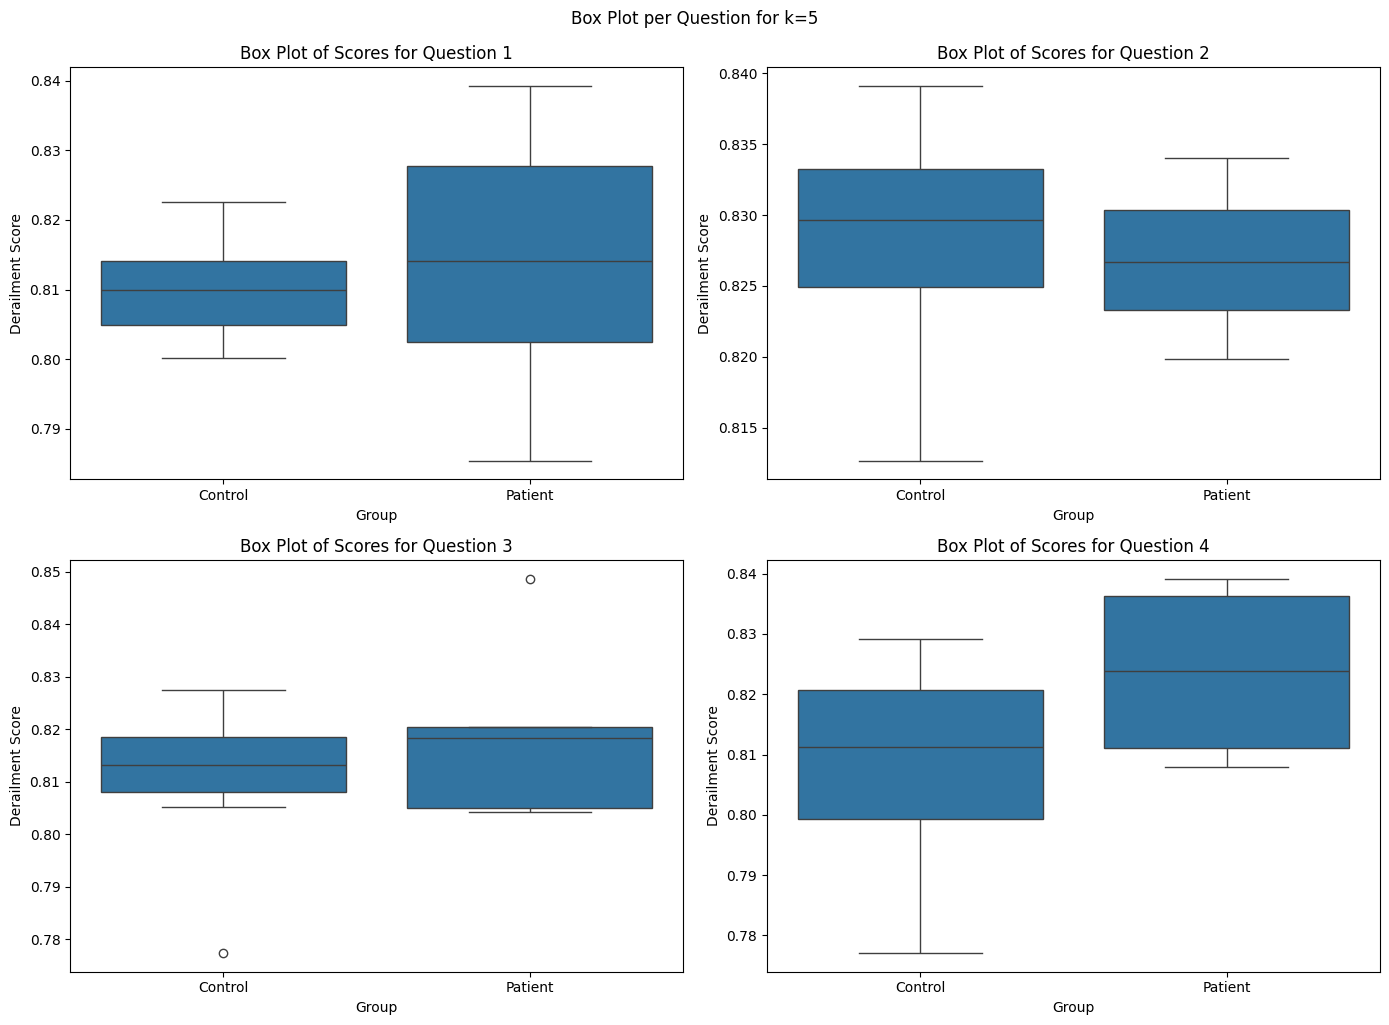

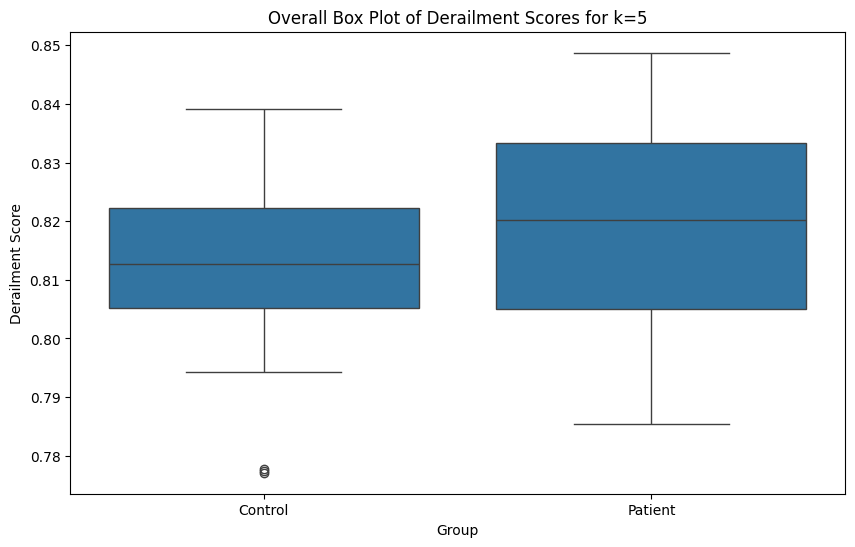

T-Test Results per Question for k=5:
Question 1: t-statistic = -0.6603194802321777, p-value = 0.7415124985765451, control mean = 0.8105069398880005, patient mean = 0.8143270611763
Question 2: t-statistic = 0.2080199849622572, p-value = 0.4205681127517772, control mean = 0.8281448483467102, patient mean = 0.8268733024597168
Question 3: t-statistic = -0.9445687040290884, p-value = 0.8174176928821444, control mean = 0.8105677962303162, patient mean = 0.8193563222885132
Question 4: t-statistic = -1.6978131044484268, p-value = 0.9455480657369562, control mean = 0.8079472184181213, patient mean = 0.8236591815948486

Overall T-Test Results for k=5: t-statistic = -1.745413982475213, p-value = 0.9569405301669639, control mean = 0.8122259974479675, patient mean = 0.8193327188491821

Welch's Test Results per Question for k=5:
Question 1: t-statistic = -0.549878277819818, p-value = 0.701681981710196
Question 2: t-statistic = 0.2289386348965887, p-value = 0.4137601490306976
Question 3: t-statistic 

In [84]:
full_analysis(control_valid_answers_content_words_without_PROPN, patient_valid_answers_content_words_without_PROPN, tokenizer, embedding_model, k=5, sliding_window=True)

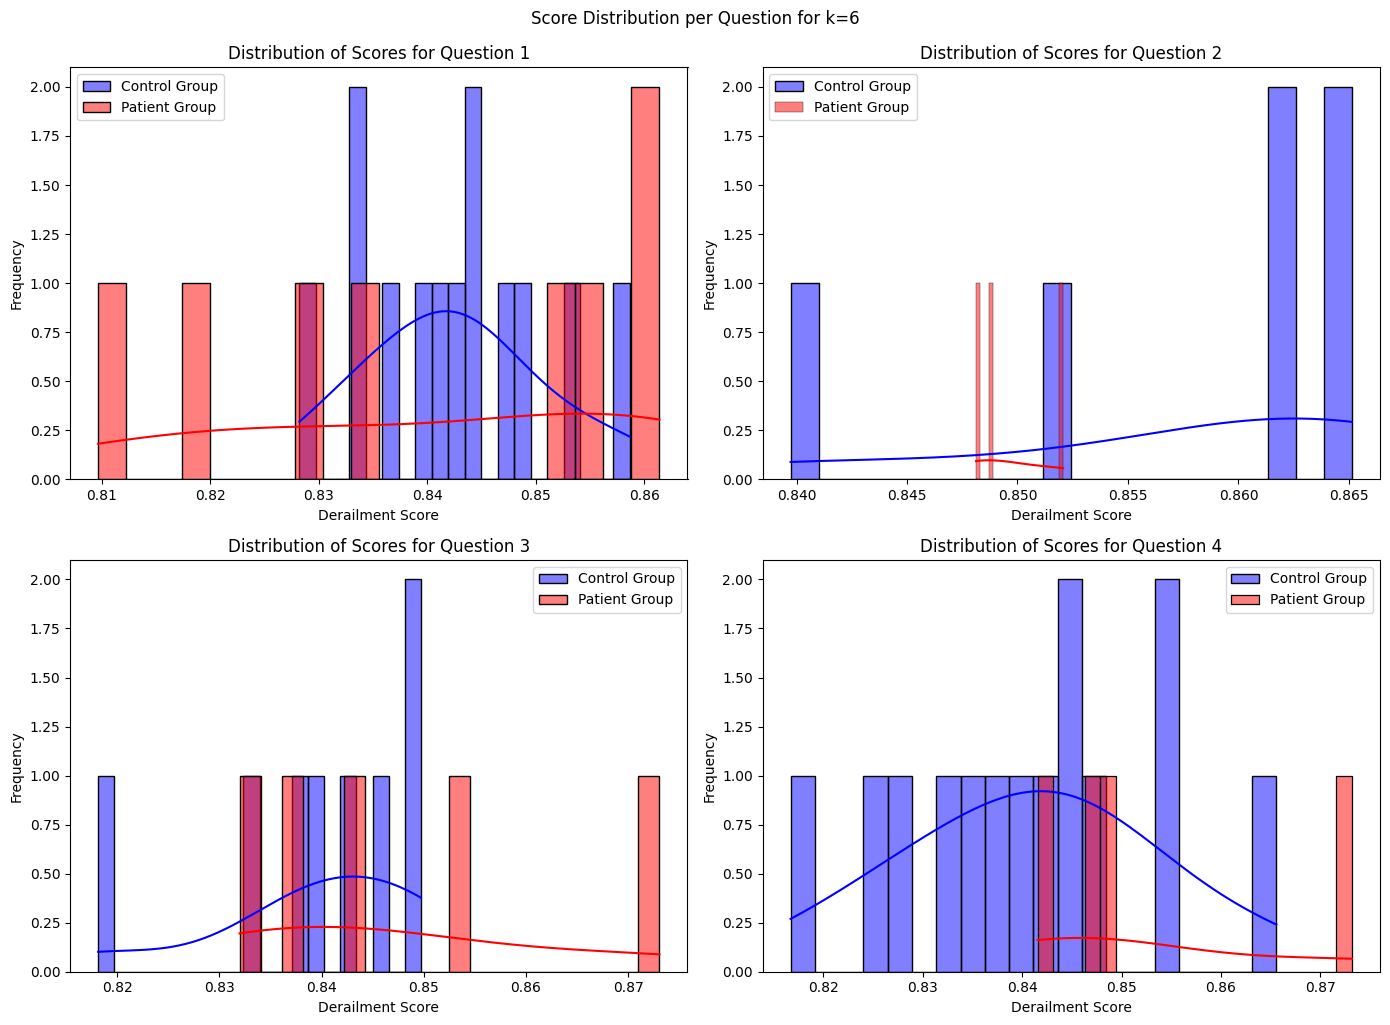

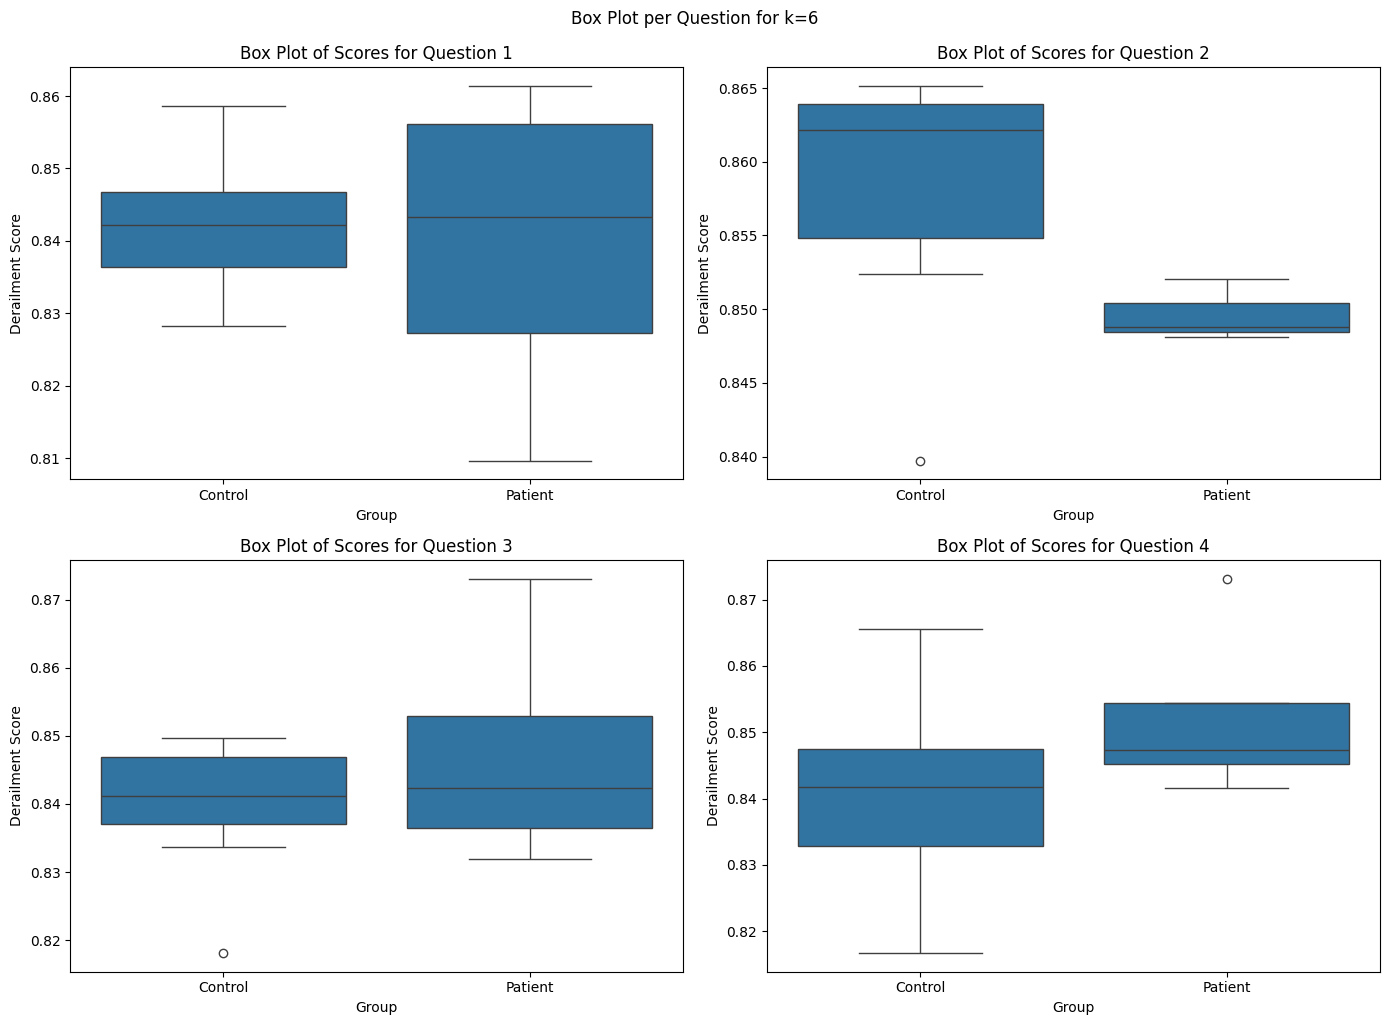

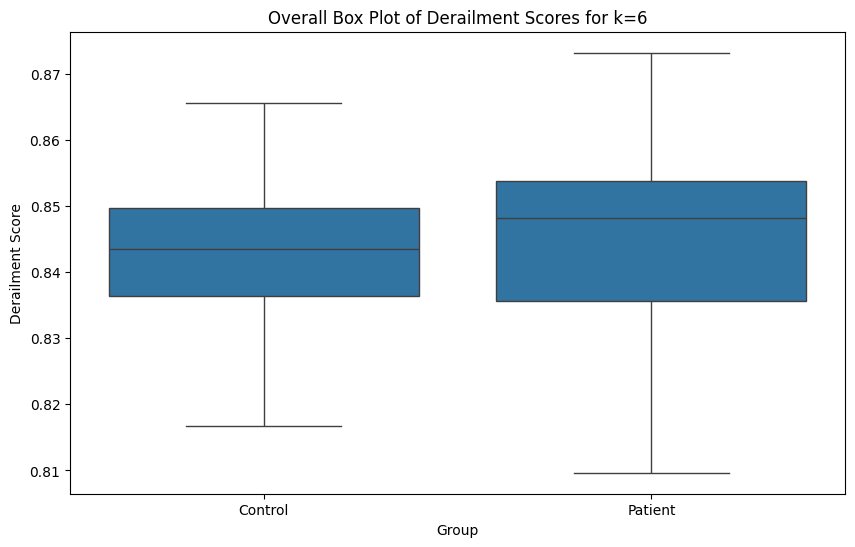

T-Test Results per Question for k=6:
Question 1: t-statistic = 0.35378388613524725, p-value = 0.36369818187409575, control mean = 0.8423404693603516, patient mean = 0.8401456475257874
Question 2: t-statistic = 1.3389594720554752, p-value = 0.11121468097650841, control mean = 0.8576672673225403, patient mean = 0.8496577143669128
Question 3: t-statistic = -1.0453167119520643, p-value = 0.8408480331592926, control mean = 0.8396695852279663, patient mean = 0.8473350405693054
Question 4: t-statistic = -1.5279015580896413, p-value = 0.9269682620450995, control mean = 0.8408320546150208, patient mean = 0.8523256182670593

Overall T-Test Results for k=6: t-statistic = -0.6154582409077949, p-value = 0.7296904803528242, control mean = 0.8435472846031189, patient mean = 0.845805823802948

Welch's Test Results per Question for k=6:
Question 1: t-statistic = 0.2954804261003292, p-value = 0.38735190649480844
Question 2: t-statistic = 1.8939475640064305, p-value = 0.05426106331608302
Question 3: t-st

In [85]:
full_analysis(control_valid_answers_content_words_without_PROPN, patient_valid_answers_content_words_without_PROPN, tokenizer, embedding_model, k=6, sliding_window=True)

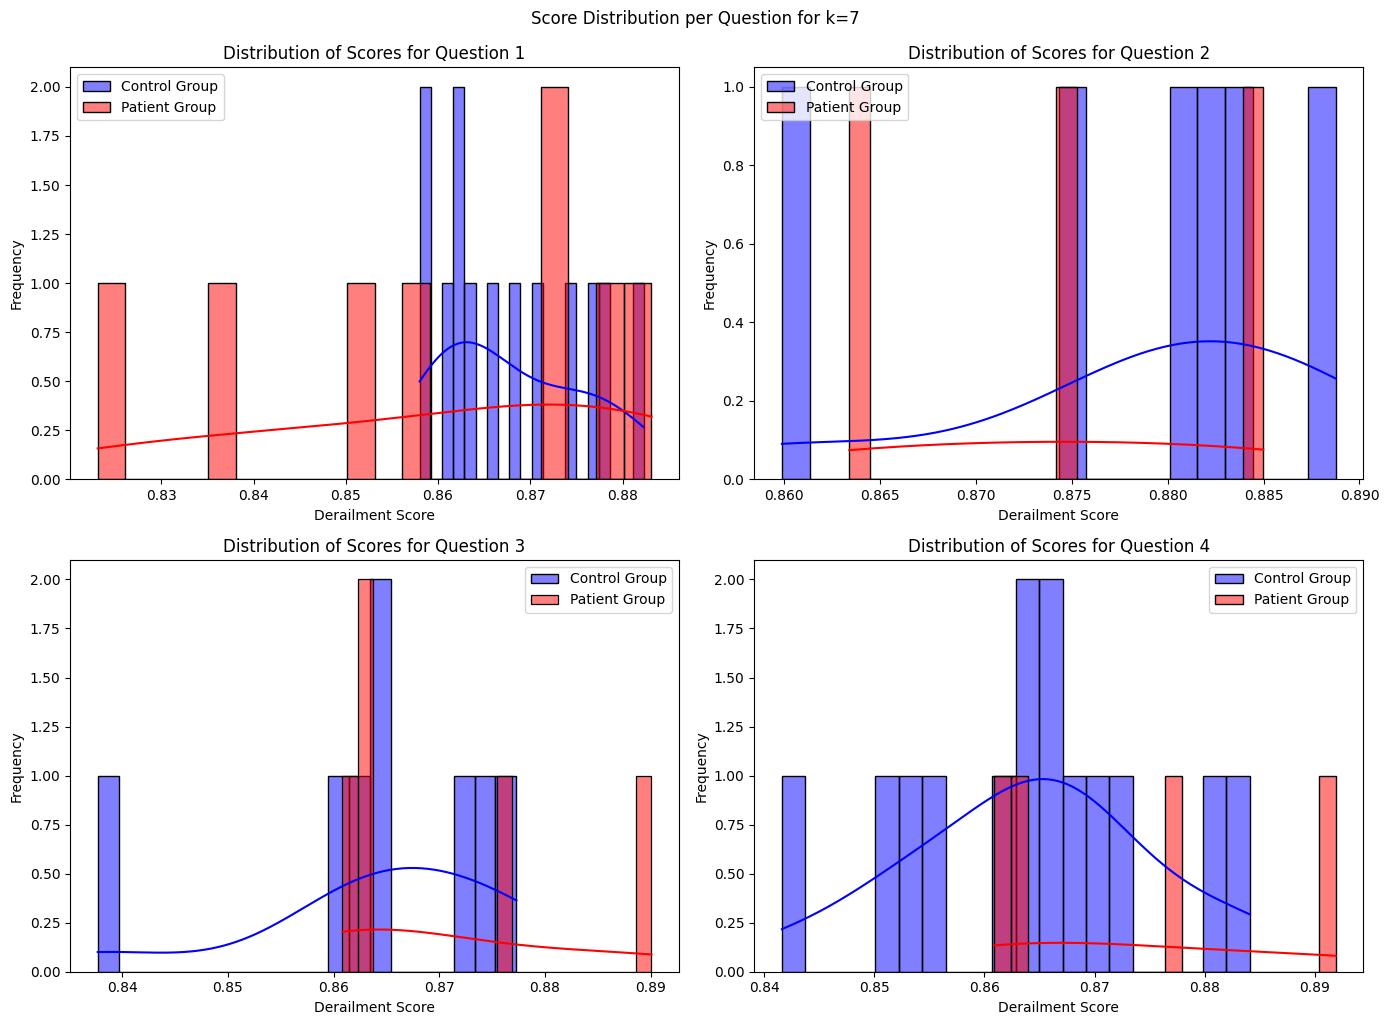

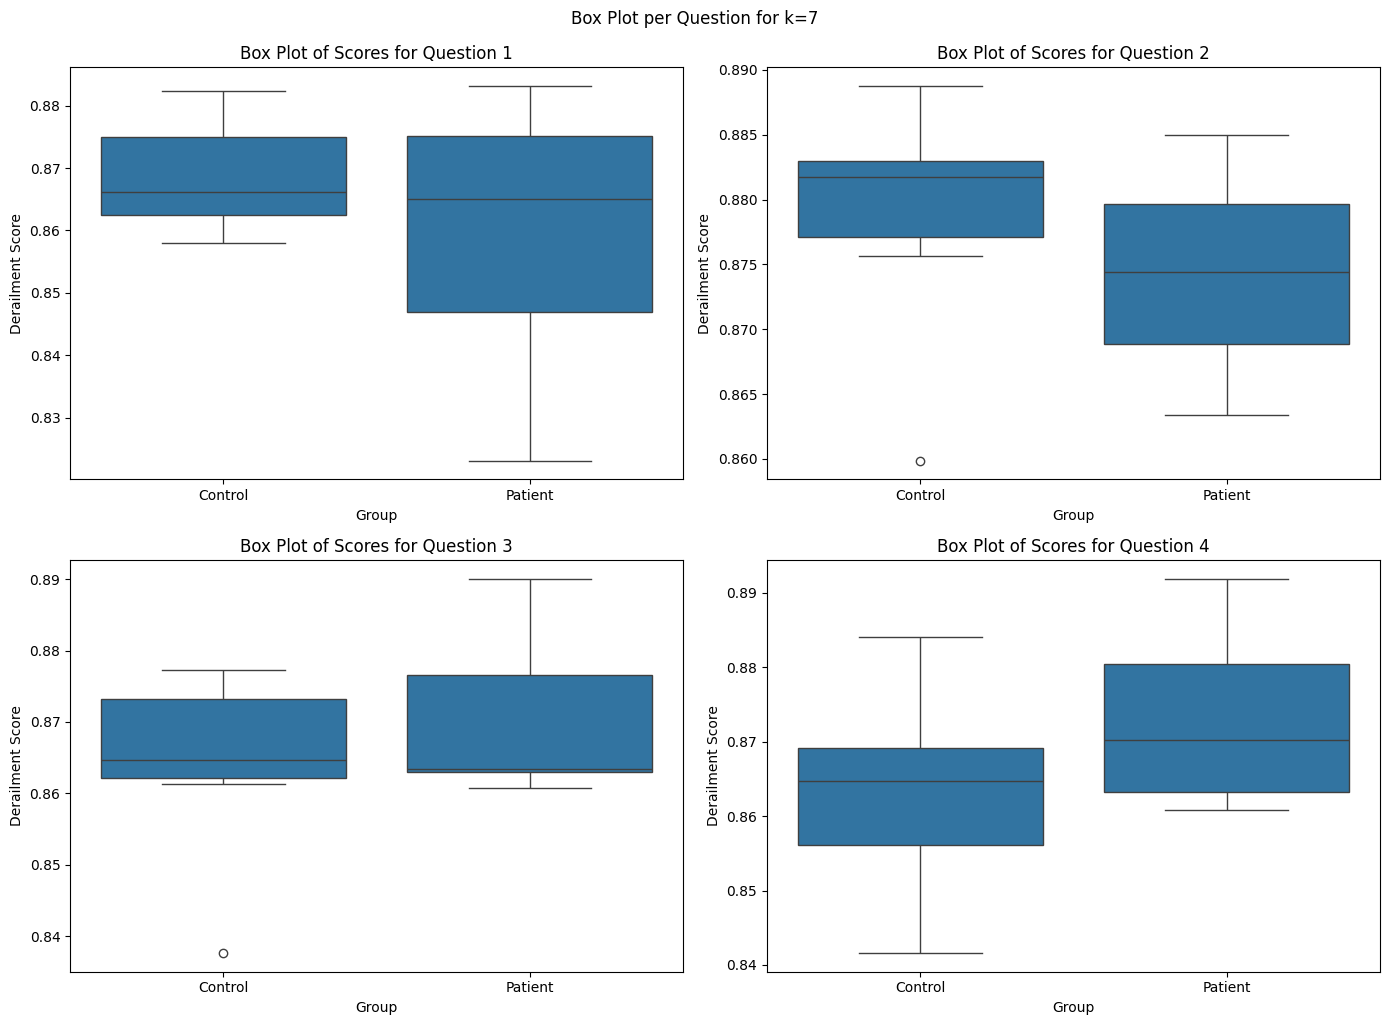

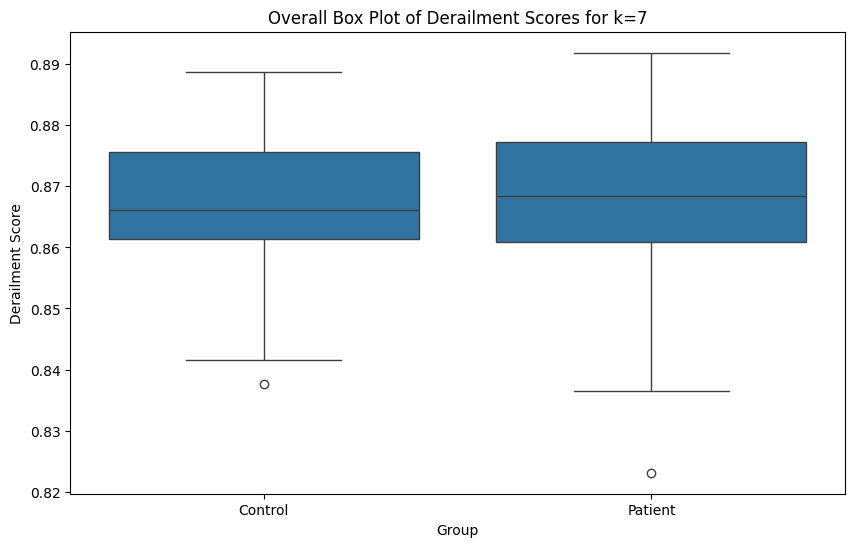

T-Test Results per Question for k=7:
Question 1: t-statistic = 1.3065393393716551, p-value = 0.10348210214923827, control mean = 0.8680877685546875, patient mean = 0.8595283031463623
Question 2: t-statistic = 0.5863416048381661, p-value = 0.28802844303762487, control mean = 0.8785142302513123, patient mean = 0.8742590546607971
Question 3: t-statistic = -0.9017100318802077, p-value = 0.8067355734589017, control mean = 0.8644304275512695, patient mean = 0.8707923889160156
Question 4: t-statistic = -1.3695615728895298, p-value = 0.9051297535820545, control mean = 0.8640508651733398, patient mean = 0.8732978701591492

Overall T-Test Results for k=7: t-statistic = 0.05855768474464103, p-value = 0.4767511499117171, control mean = 0.8675214052200317, patient mean = 0.8673079609870911

Welch's Test Results per Question for k=7:
Question 1: t-statistic = 1.0741104318855987, p-value = 0.15674258770477797
Question 2: t-statistic = 0.5703483984719597, p-value = 0.3001582277275451
Question 3: t-sta

In [86]:
full_analysis(control_valid_answers_content_words_without_PROPN, patient_valid_answers_content_words_without_PROPN, tokenizer, embedding_model, k=7, sliding_window=True)

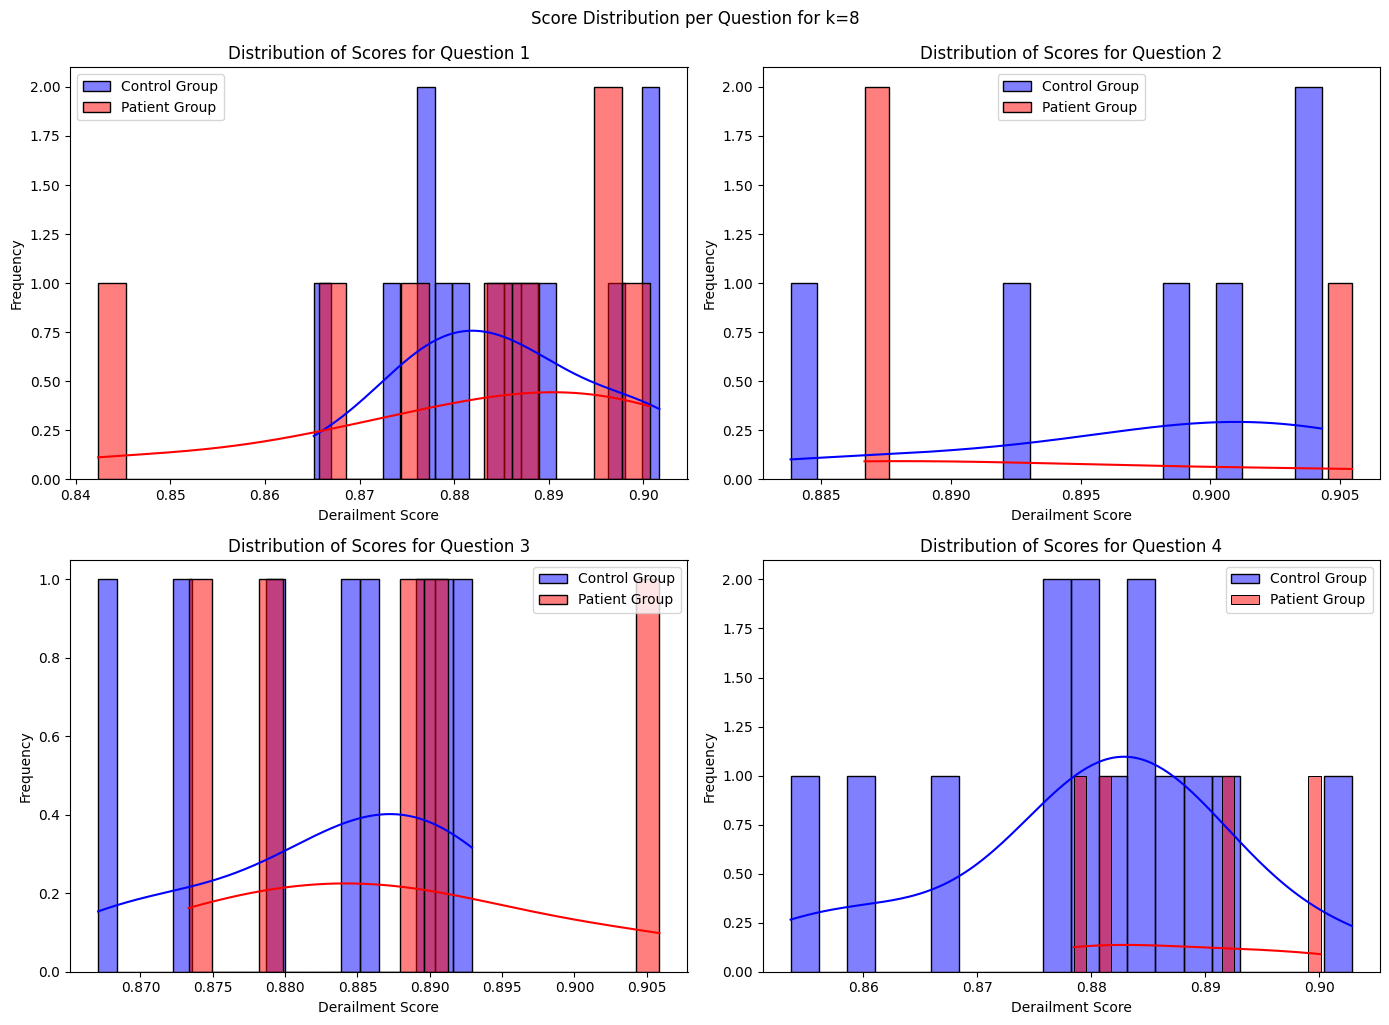

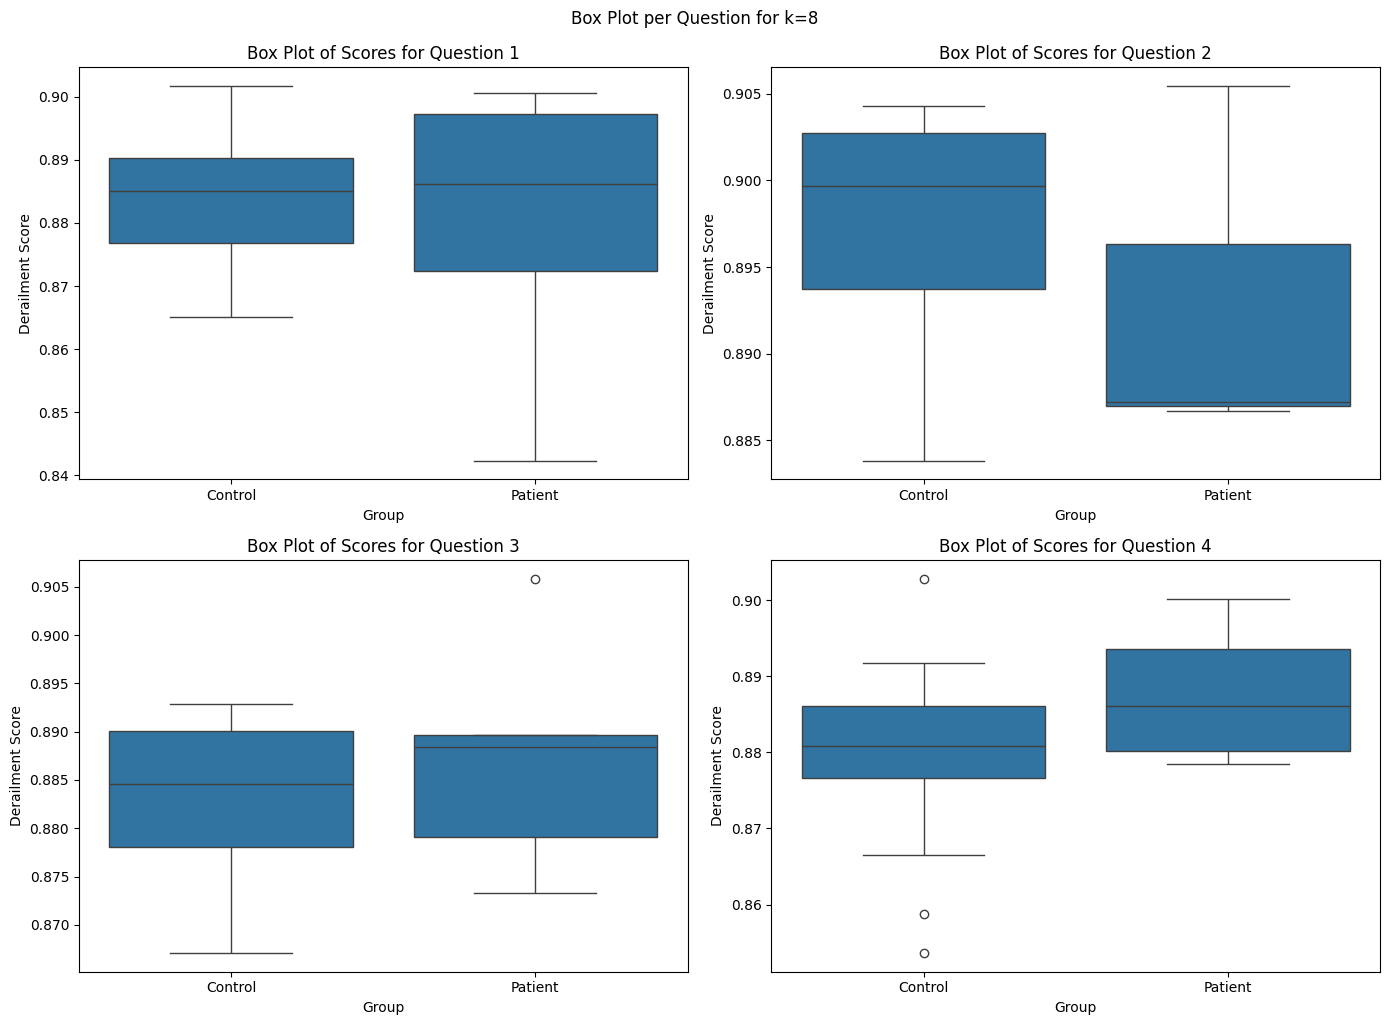

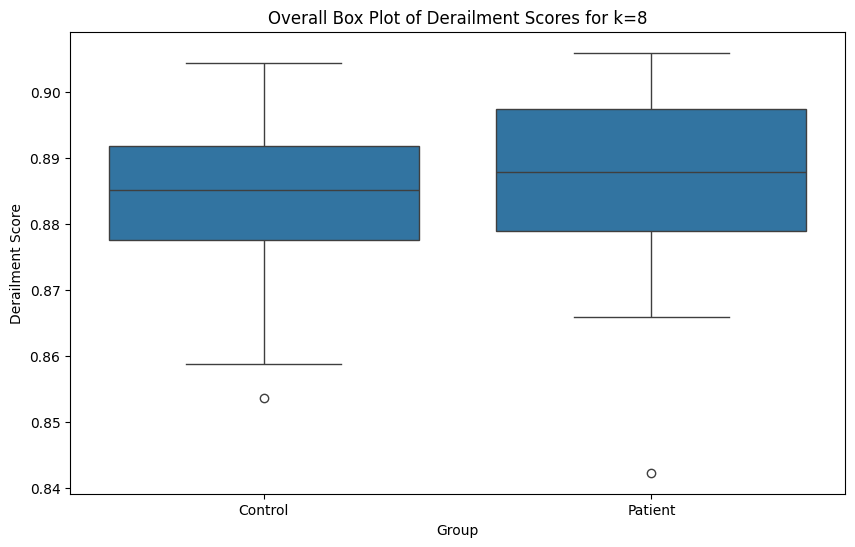

T-Test Results per Question for k=8:
Question 1: t-statistic = 0.5297137922234084, p-value = 0.3012229605817644, control mean = 0.884833574295044, patient mean = 0.8812993764877319
Question 2: t-statistic = 0.6531858619976781, p-value = 0.2672471116948717, control mean = 0.8971604704856873, patient mean = 0.8931183218955994
Question 3: t-statistic = -0.7507714201429444, p-value = 0.7657265999965159, control mean = 0.8828125, patient mean = 0.8872877955436707
Question 4: t-statistic = -1.1442189956599467, p-value = 0.8653186346181354, control mean = 0.8795960545539856, patient mean = 0.8876750469207764

Overall T-Test Results for k=8: t-statistic = -0.3898737059552653, p-value = 0.6509830770487331, control mean = 0.8844546675682068, patient mean = 0.8858445286750793

Welch's Test Results per Question for k=8:
Question 1: t-statistic = 0.46267659346257894, p-value = 0.3269149685293187
Question 2: t-statistic = 0.5814749271039323, p-value = 0.300067178130276
Question 3: t-statistic = -0.6

In [87]:
full_analysis(control_valid_answers_content_words_without_PROPN, patient_valid_answers_content_words_without_PROPN, tokenizer, embedding_model, k=8, sliding_window=True)